In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [46]:
us_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

confirmed_df = pd.read_csv(us_confirmed_url)
deaths_df = pd.read_csv(us_deaths_url)

In [47]:
print(confirmed_df.shape)
confirmed_df.head()

(3261, 126)


UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  \
0 -14.2710 -170.1320  ...      0       0       0       0        0        0   
1  13.4443  144.7937  ...    149     149     151     151      151      151   
2  15.0979  145.6739  ...     15      15      15      16       16       19   
3  18.2208  -66.5901  ...   1968    2031    2156    2173     2198     2256   
4  18.3358  -64.8963  ...     66      66      68      68       69       69   

   5/12/20  5/13/20  5/14/20  5/15/20  
0        0        0        0        0  
1      152      152      152      154  
2       19       19       19       19  
3     2299     2329     2427     2542  
4       69       69       69       69  

[5 rows x 126 columns]

In [48]:
print(deaths_df.shape)
deaths_df.head()

(3261, 127)


UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  \
0 -14.2710 -170.1320  ...      0       0       0       0        0        0   
1  13.4443  144.7937  ...      5       5       5       5        5        5   
2  15.0979  145.6739  ...      2       2       2       2        2        2   
3  18.2208  -66.5901  ...     99     102     107     108      111      113   
4  18.3358  -64.8963  ...      4       4       4       4        4        5   

   5/12/20  5/13/20  5/14/20  5/15/20  
0        0        0        0        0  
1        5        5        5        5  
2        2        2        2        2  
3      114      115      117      122  
4        6        6        6        6  

[5 rows x 127 columns]

Deaths dataset contains extra column for `Population`

In [49]:
# Aggregate across states to get total count for each date
grouped_confirmed = confirmed_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
grouped_deaths = deaths_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
dates = list(confirmed_df.columns[11:].values)    # Skip first date

In [50]:
grouped_confirmed.head()

Province_State         UID  code3      FIPS          Lat        Long_  \
0         Alabama  5796241491  57960  241491.0  2203.246784 -5809.578199   
1          Alaska  2604232344  26040  232344.0  1747.579877 -4229.319334   
2  American Samoa          16     16      60.0   -14.271000  -170.132000   
3         Arizona  1428230216  14280  230216.0   505.138555 -1671.948482   
4        Arkansas  6468550635  64680  550635.0  2618.391704 -6932.548370   

   1/22/20  1/23/20  1/24/20  1/25/20  ...  5/6/20  5/7/20  5/8/20  5/9/20  \
0        0        0        0        0  ...    8691    9046    9385    9668   
1        0        0        0        0  ...     372     374     377     378   
2        0        0        0        0  ...       0       0       0       0   
3        0        0        0        0  ...    9707    9945   10526   10960   
4        0        0        0        0  ...    3611    3703    3747    3747   

   5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  
0     9889    10164    10464    10700    11101    11373  
1      379      379      383      383      383      388  
2        0        0        0        0        0        0  
3    11119    11383    11736    12216    12674    13169  
4     4012     4043     4164     4236     4366     4463  

[5 rows x 121 columns]

In [51]:
# Calculate number of new cases per day
daily_counts_confirmed = grouped_confirmed[dates].diff(axis=1)
daily_counts_deaths = grouped_deaths[dates].diff(axis=1)

# Calculate 7 day rolling average
rolling_avg_confirmed = daily_counts_confirmed[dates].rolling(7, axis=1).mean()
rolling_avg_deaths = daily_counts_deaths[dates].rolling(7, axis=1).mean()

# Add back state/province names
names = grouped_confirmed['Province_State'].values
daily_counts_confirmed['Province_State'] = names
daily_counts_deaths['Province_State'] = names
rolling_avg_confirmed['Province_State'] = names
rolling_avg_deaths['Province_State'] = names

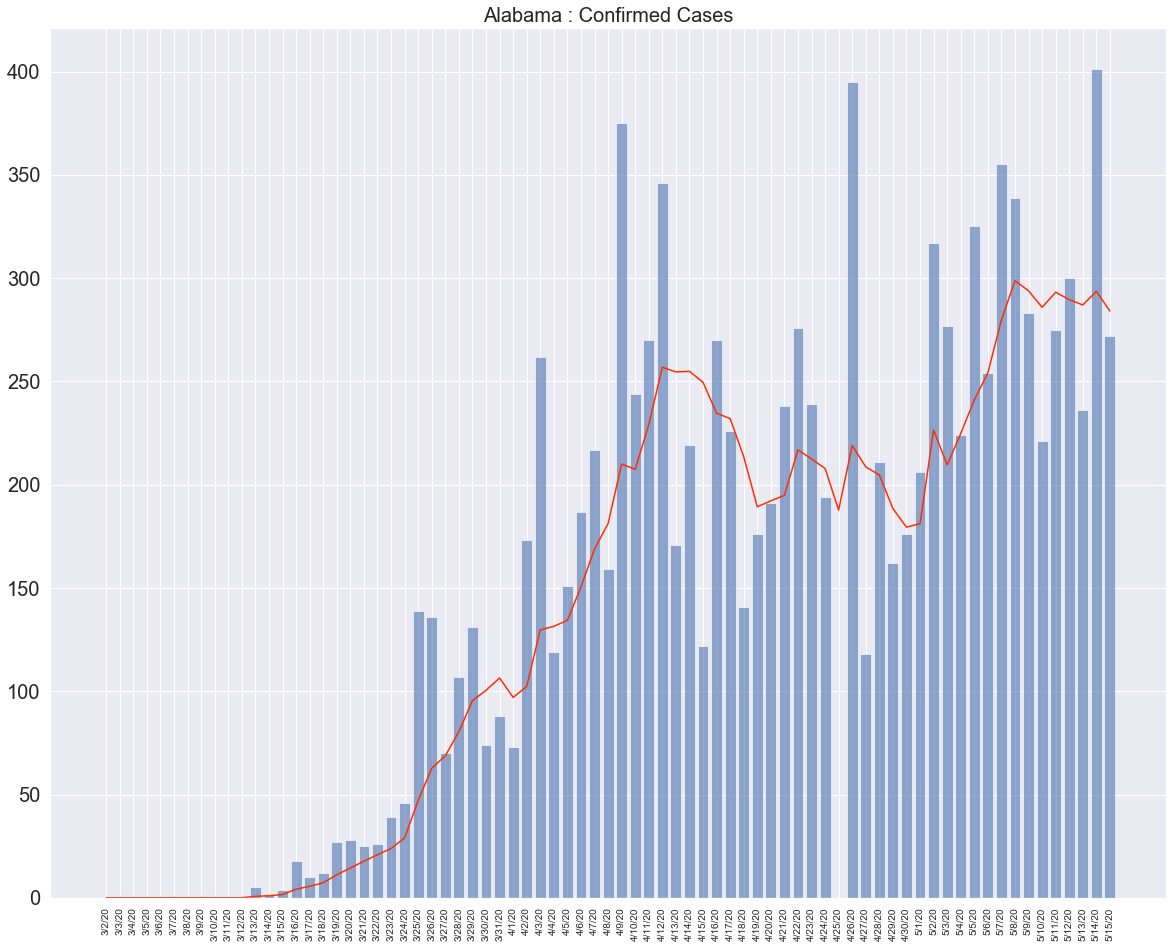

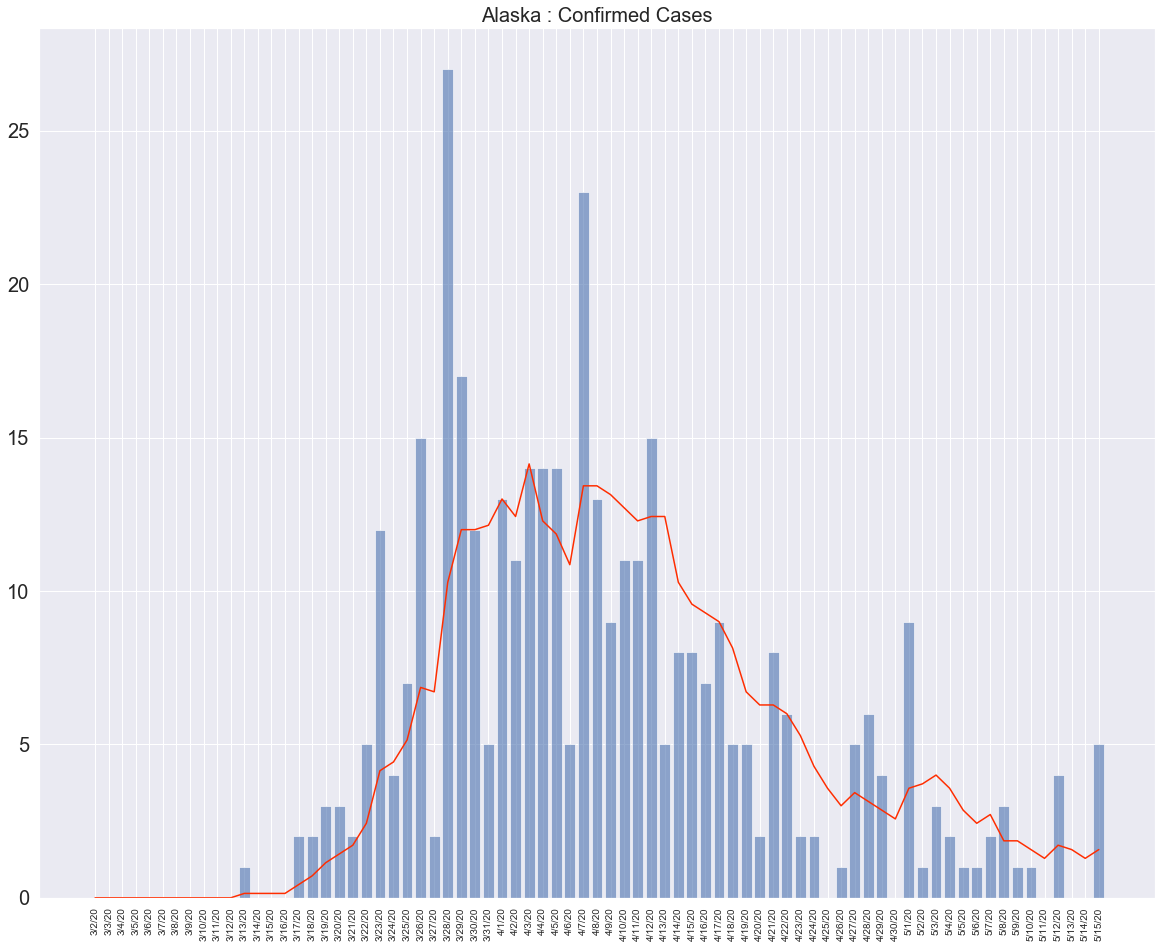

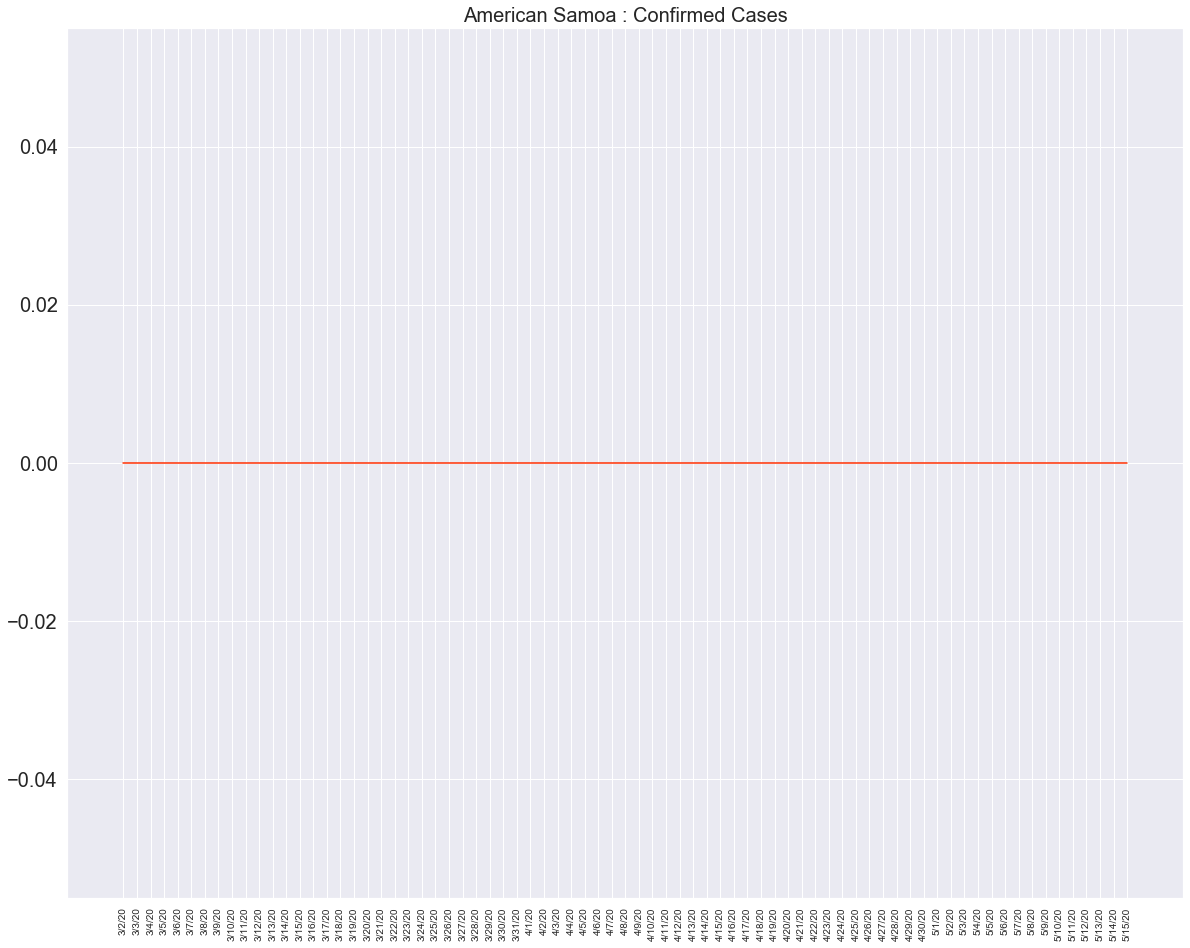

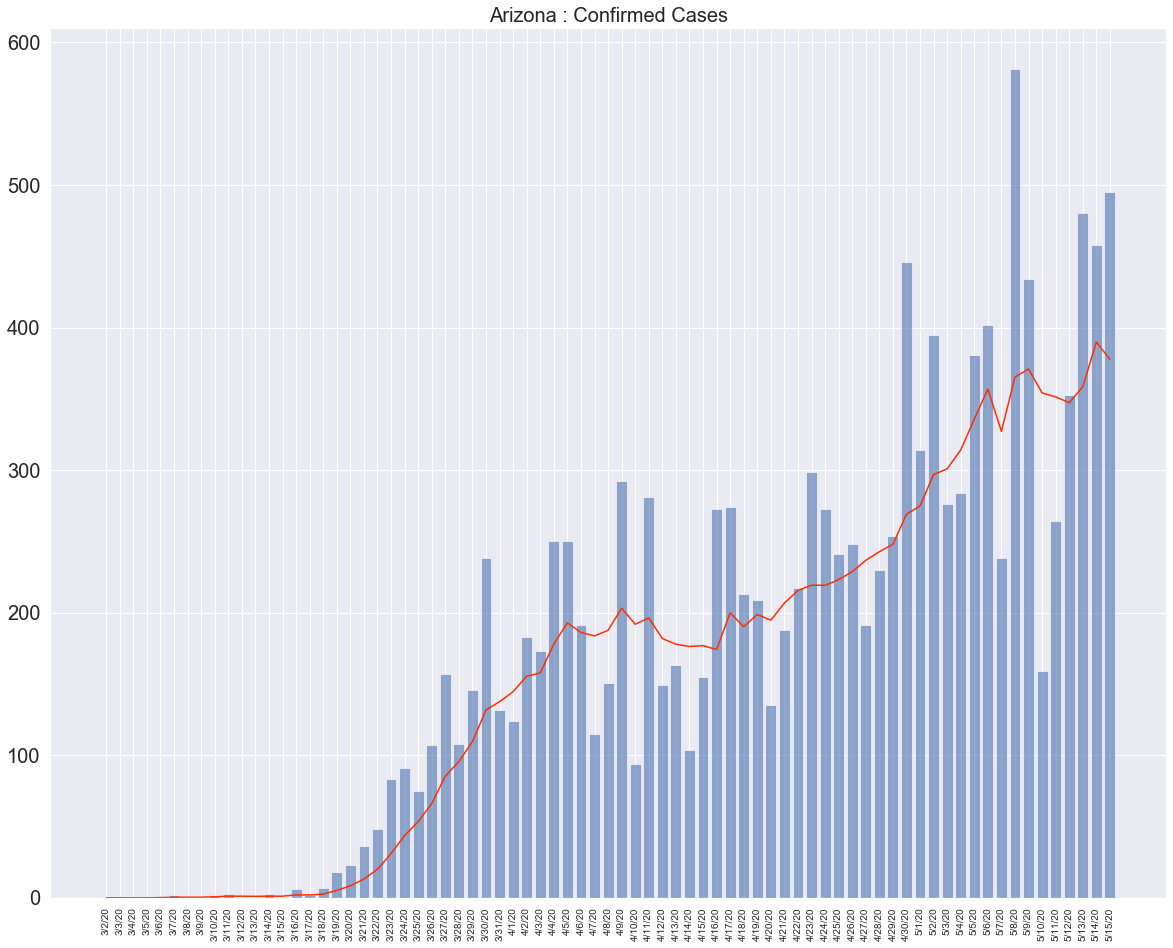

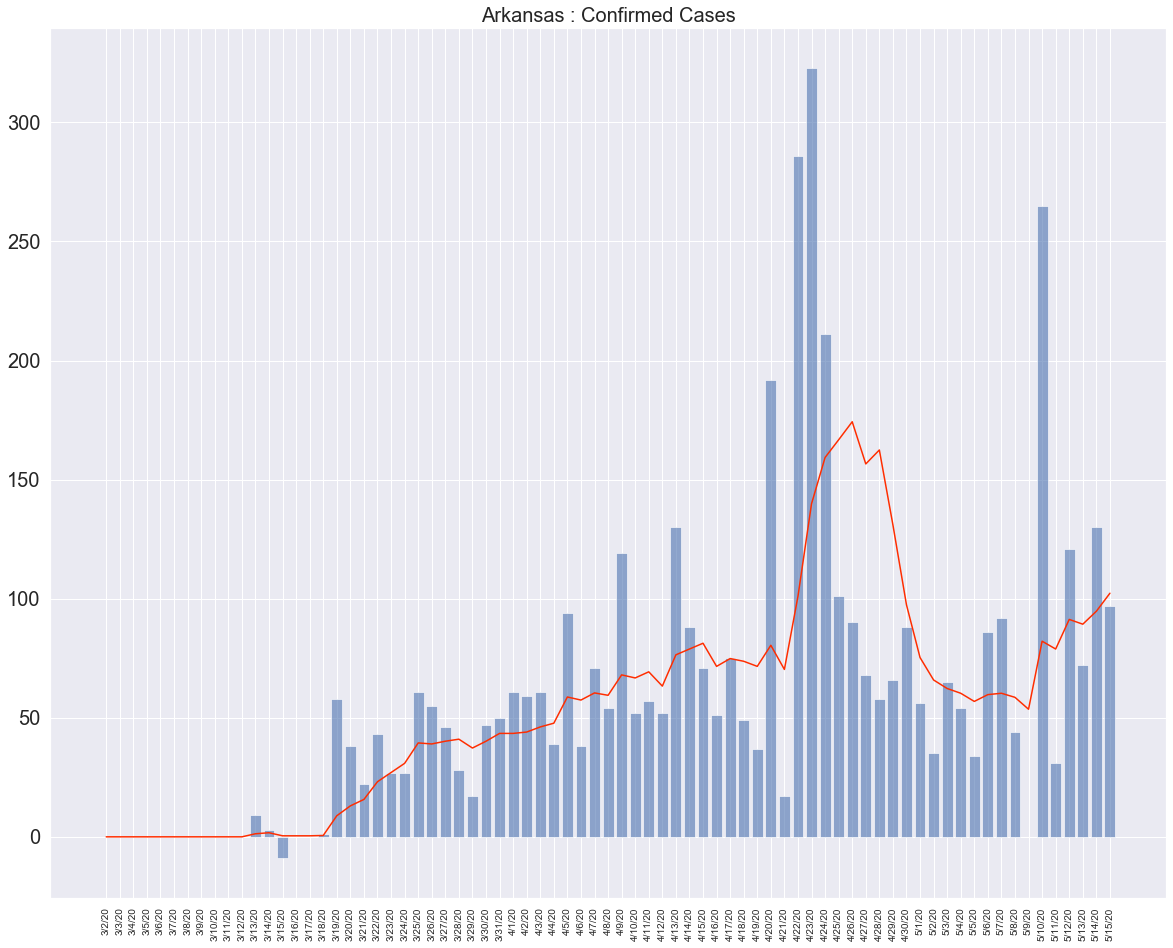

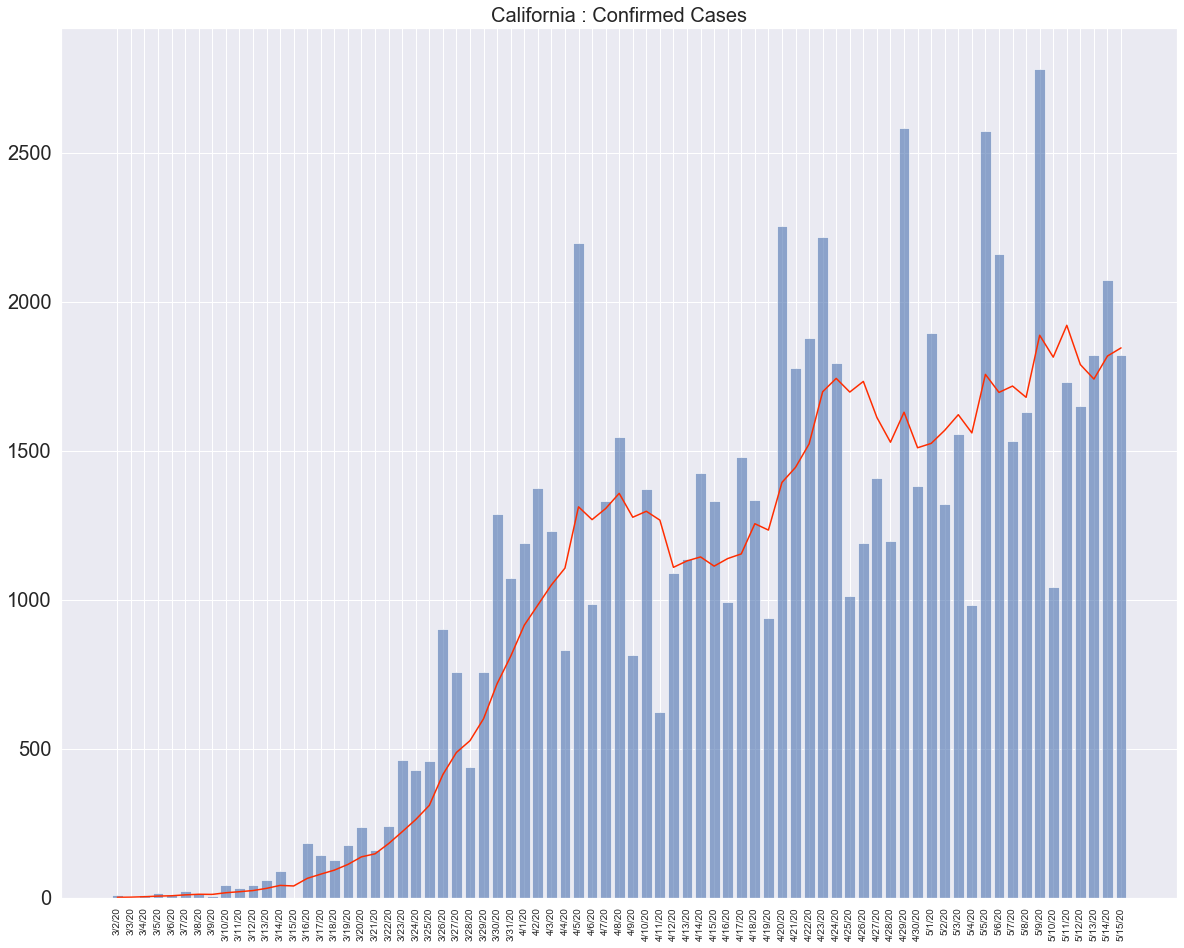

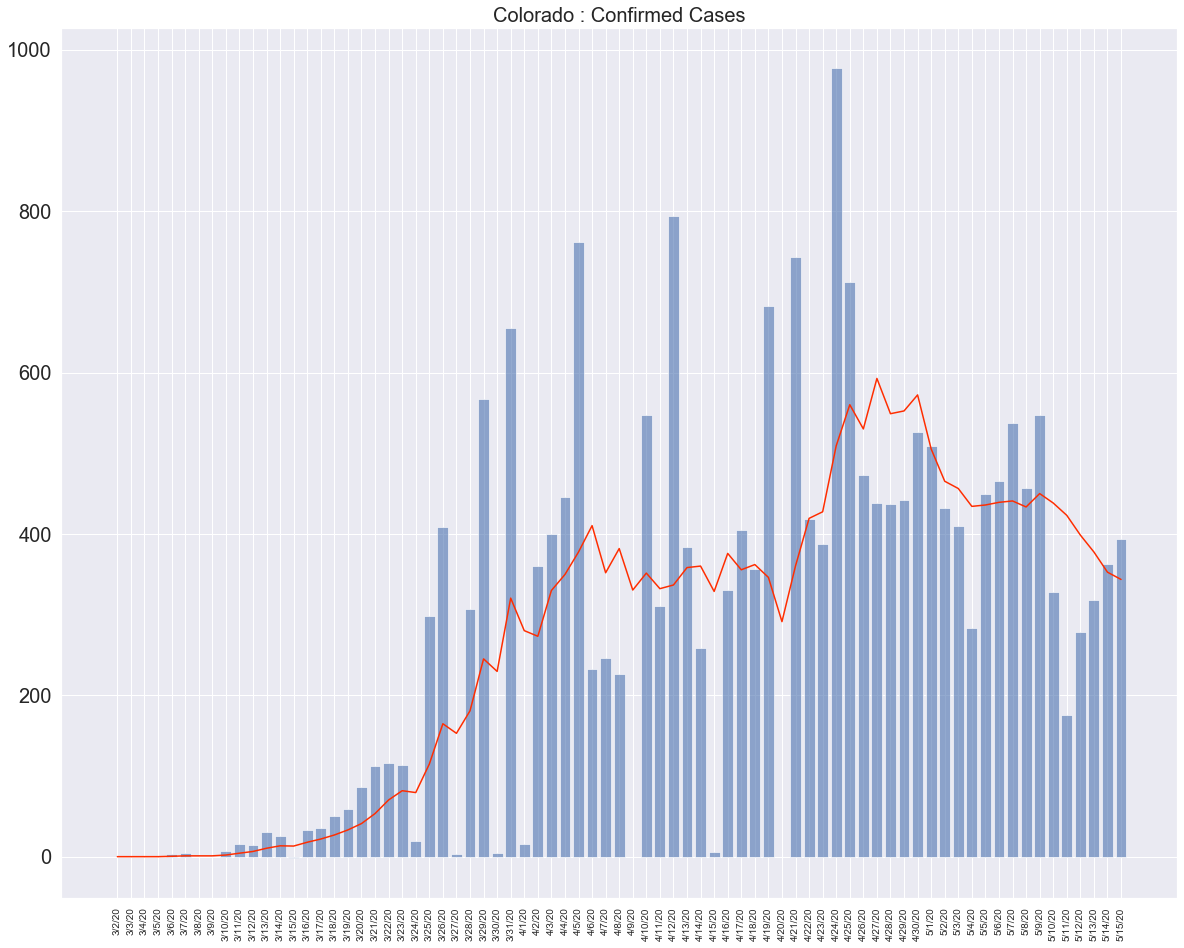

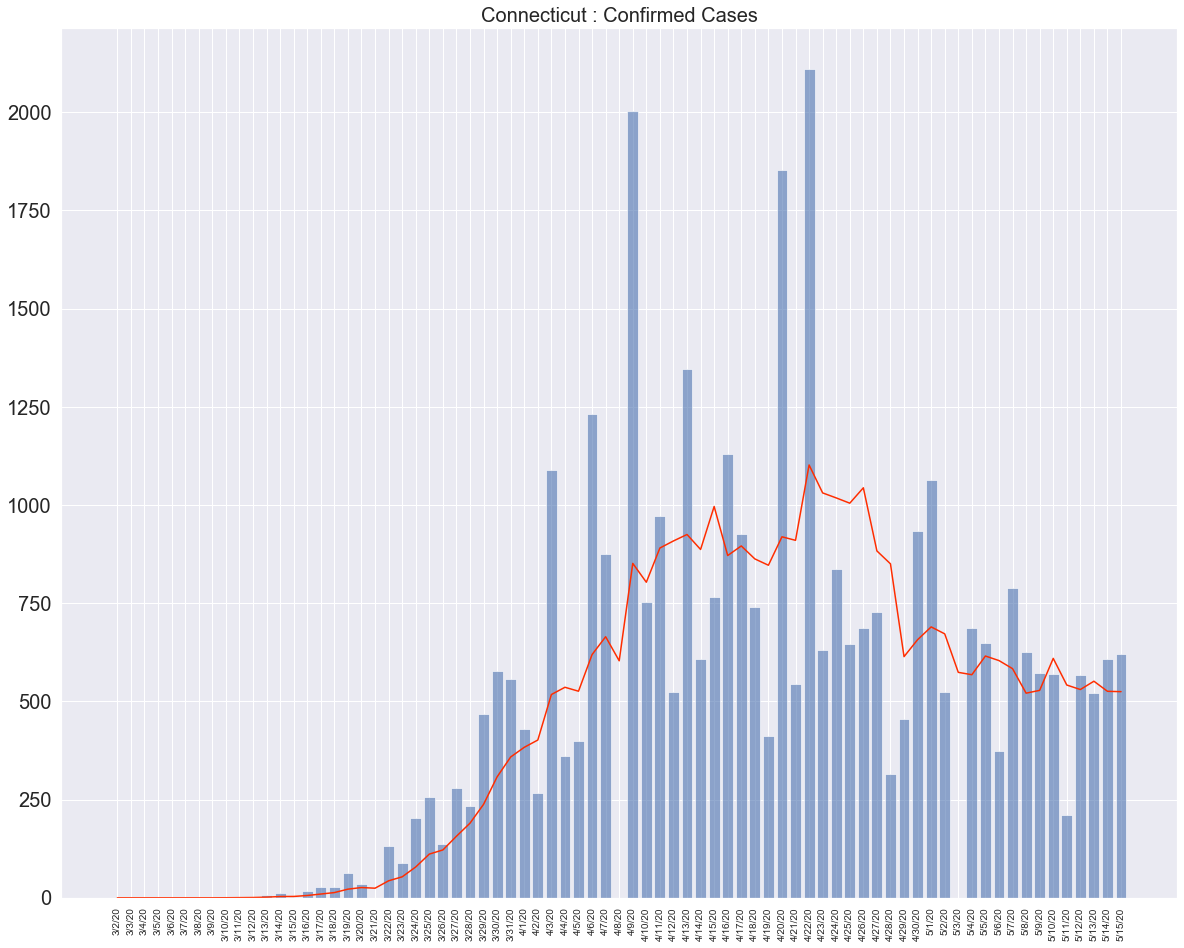

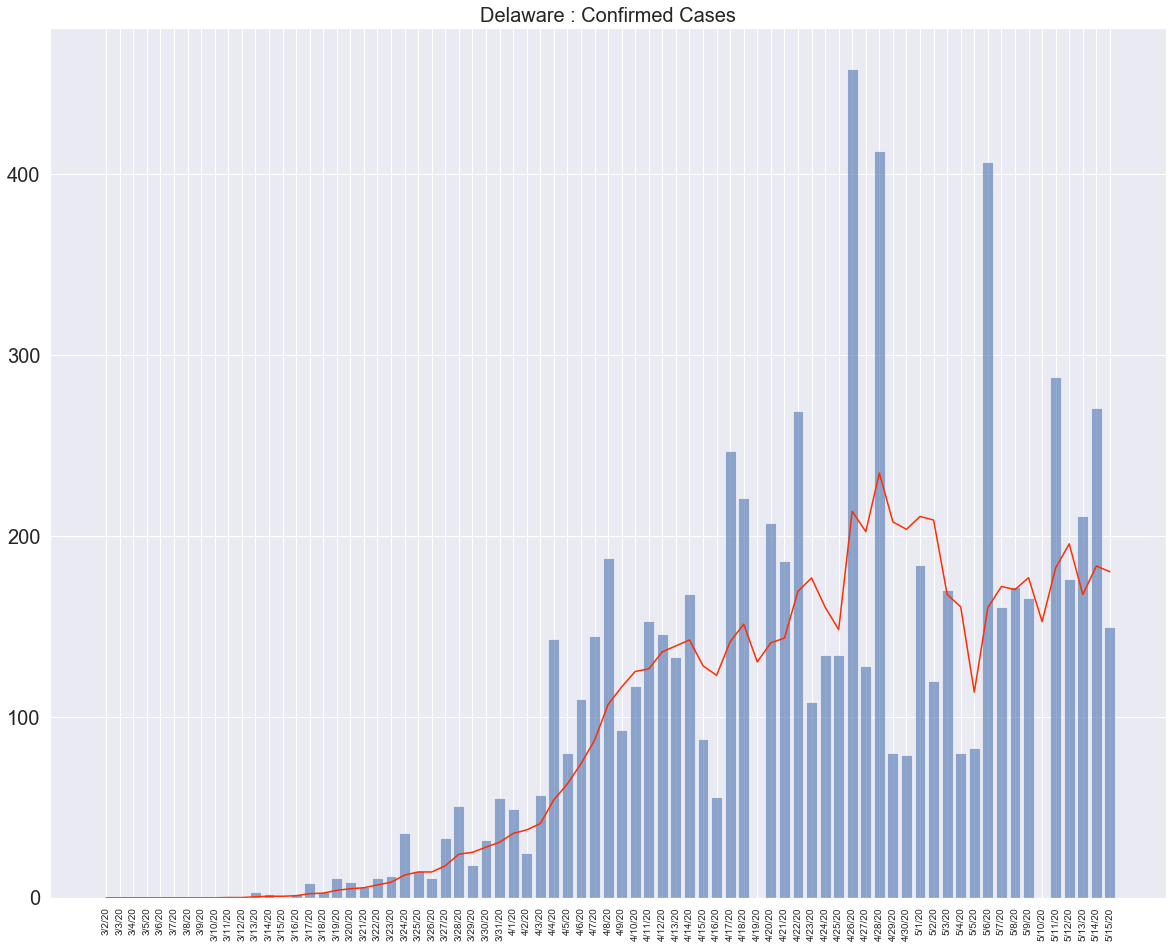

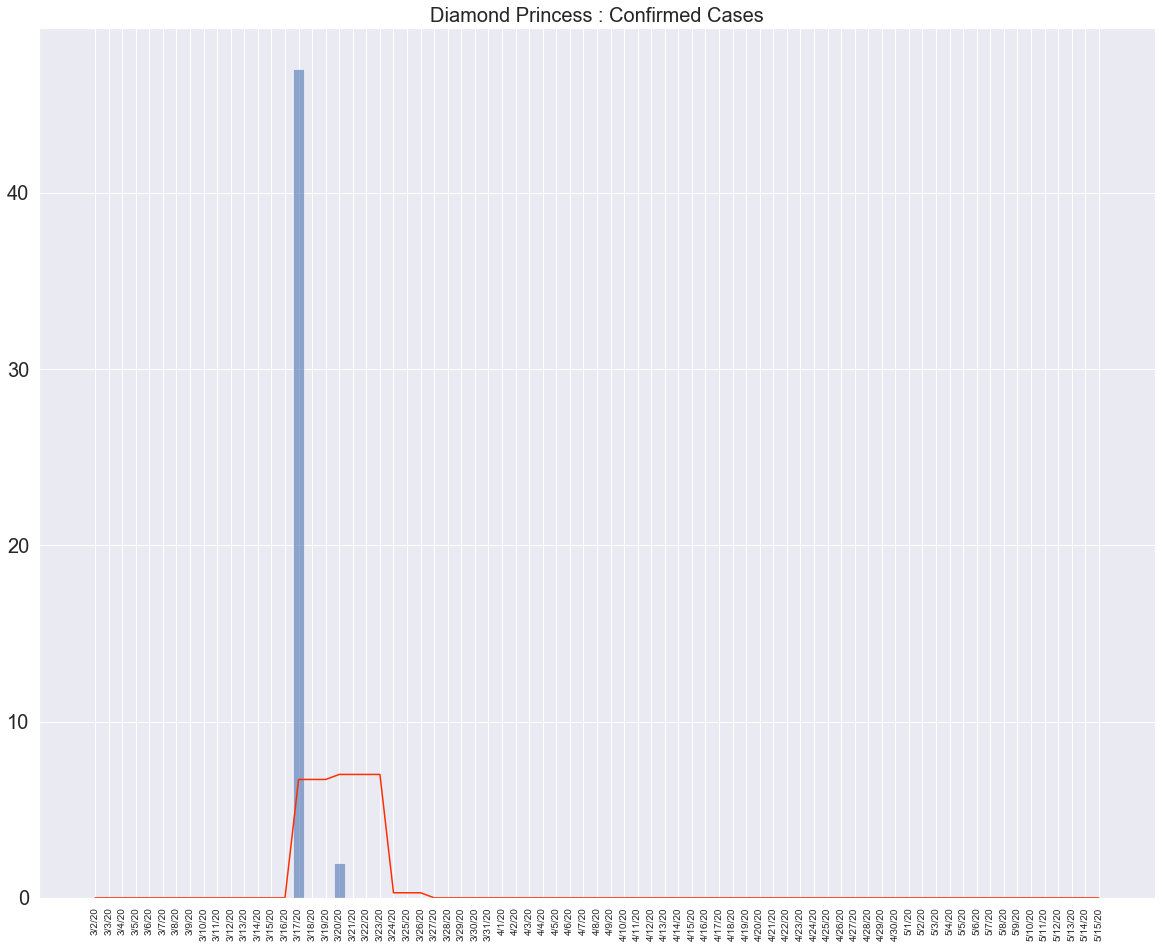

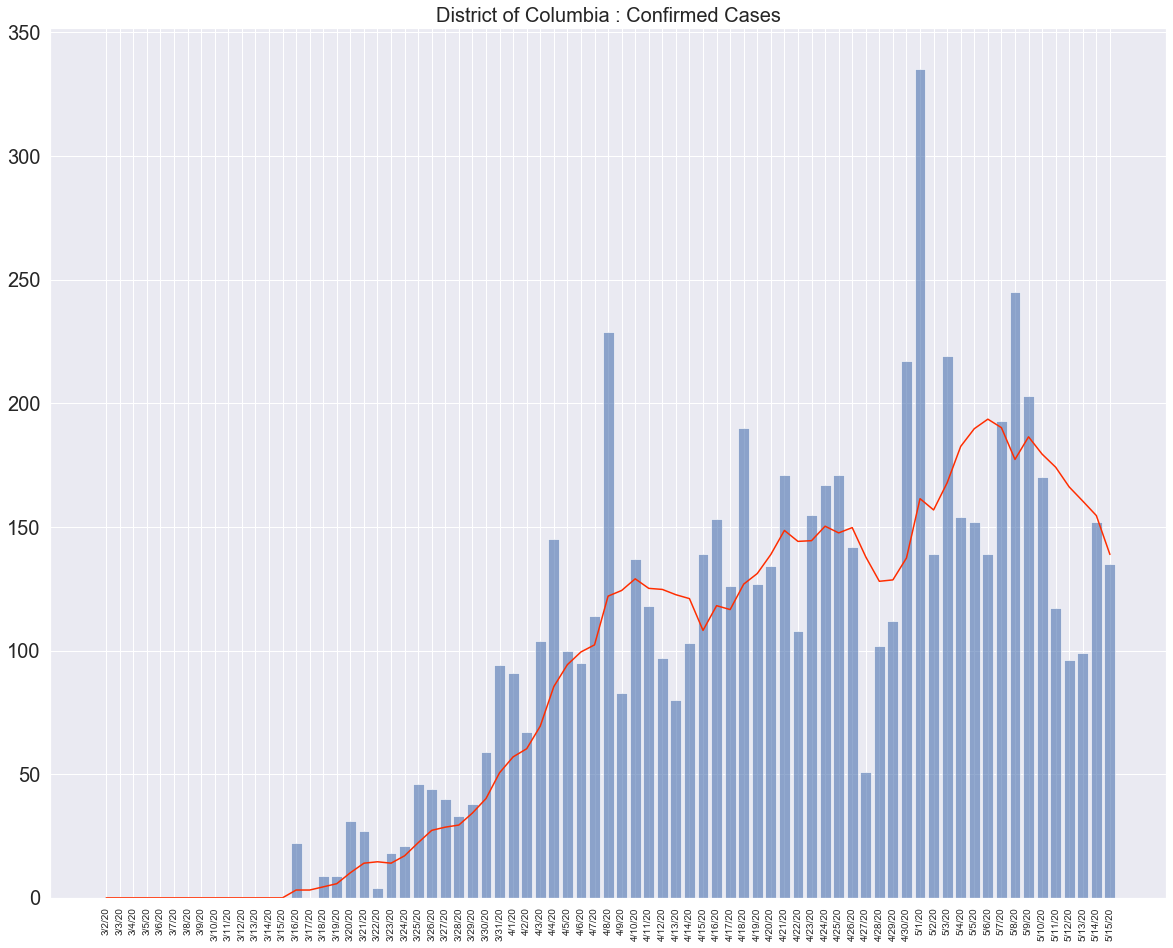

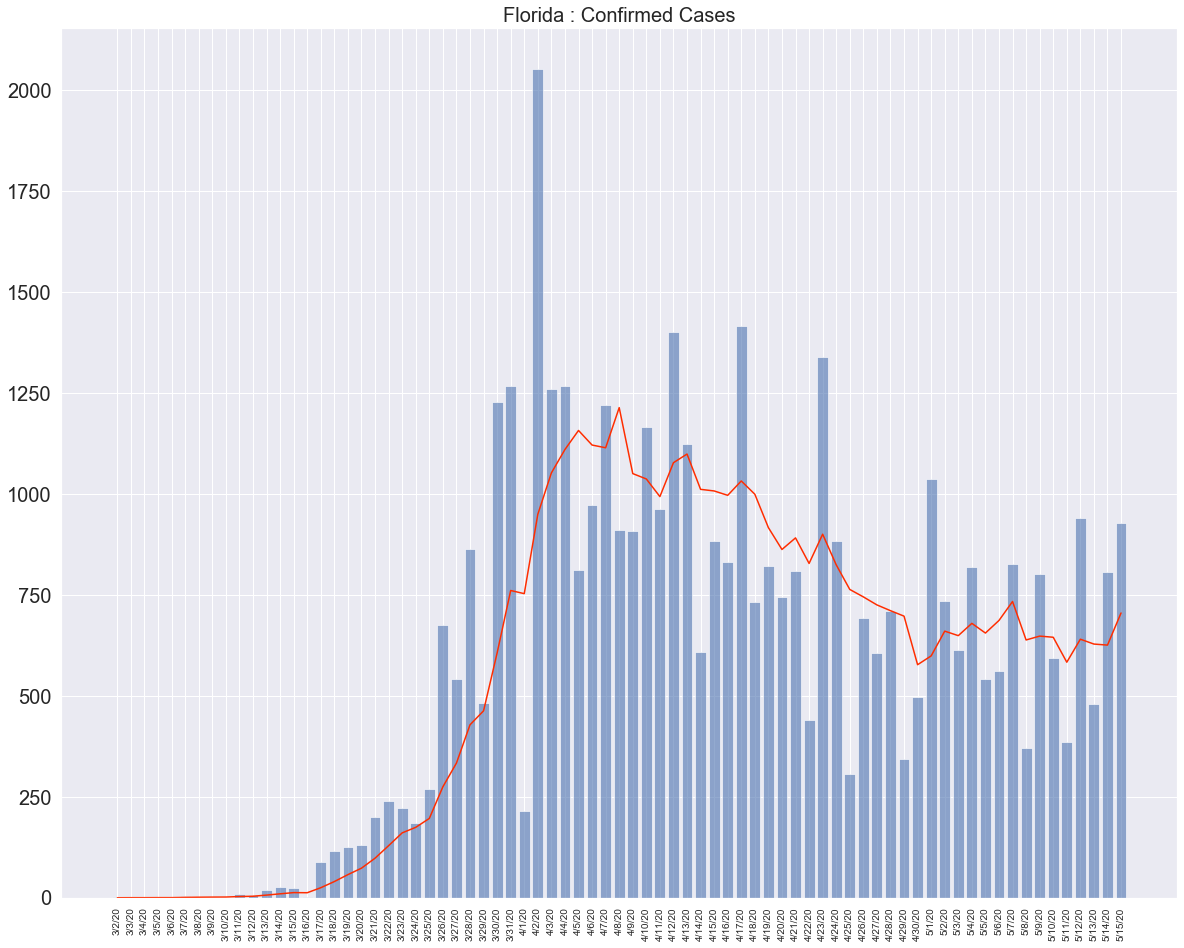

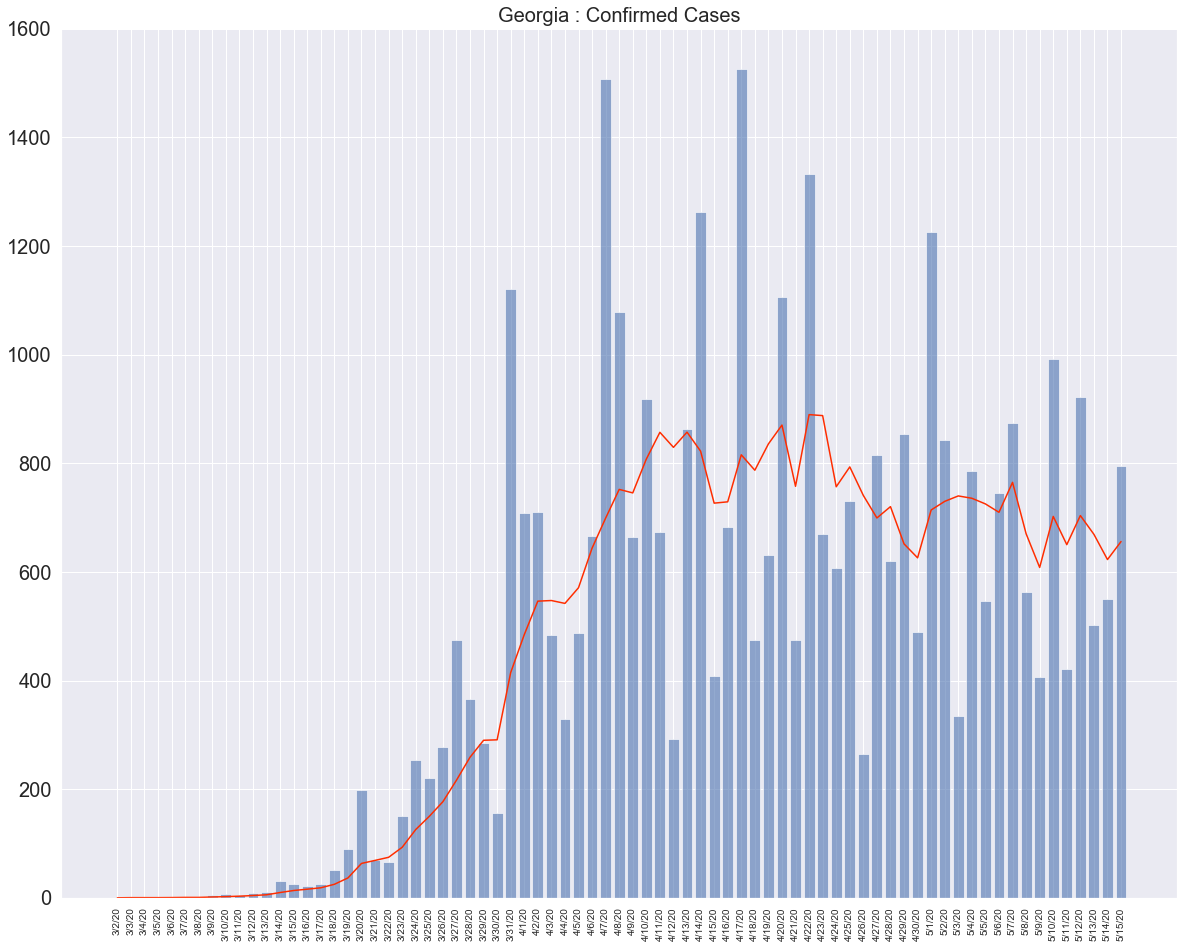

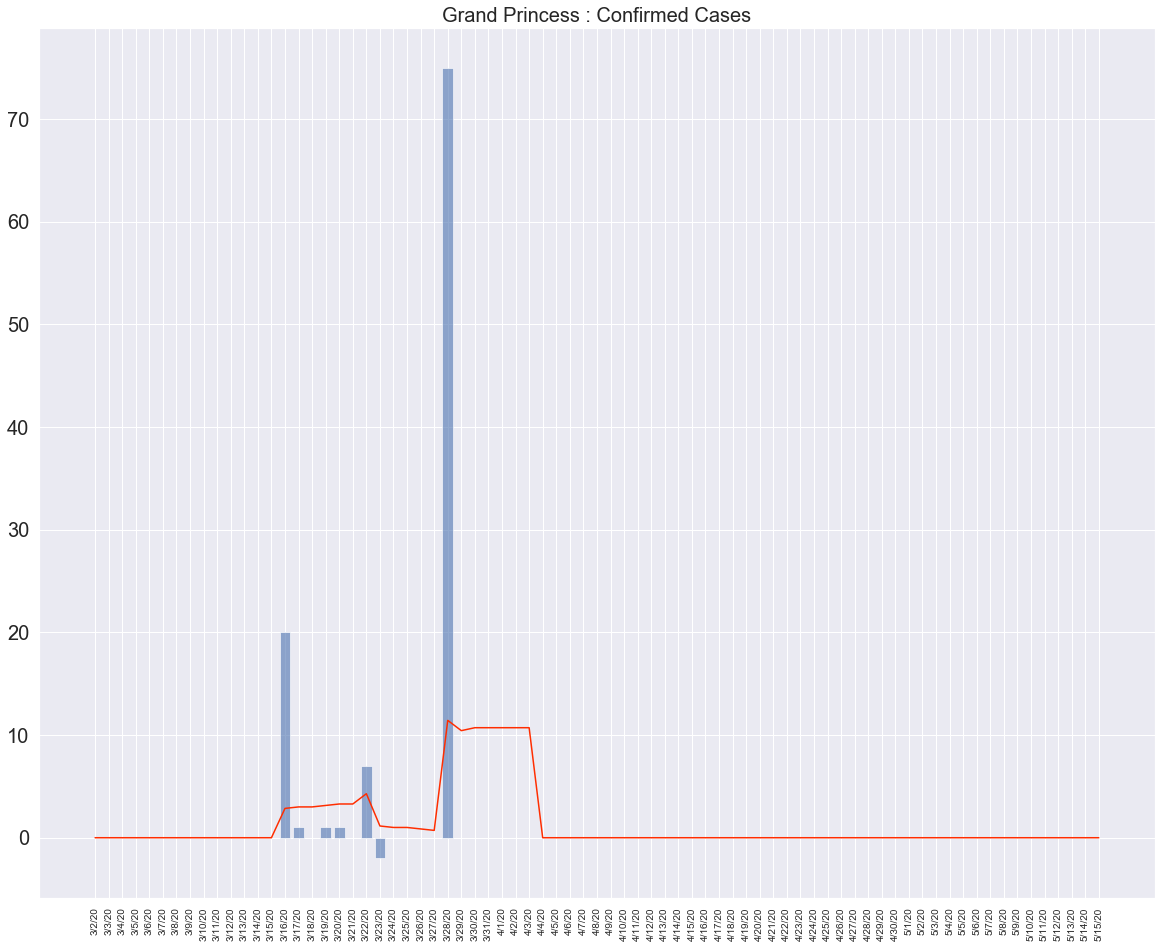

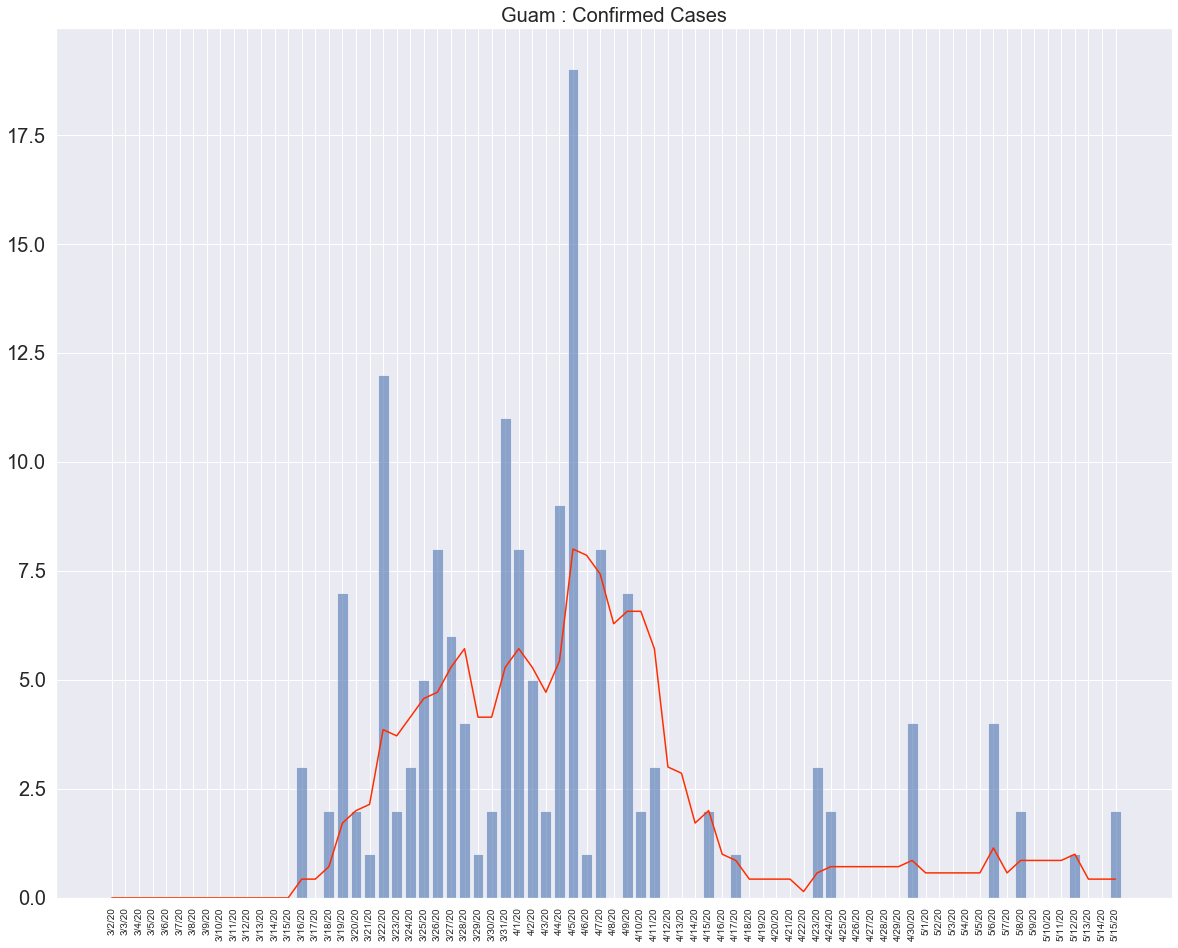

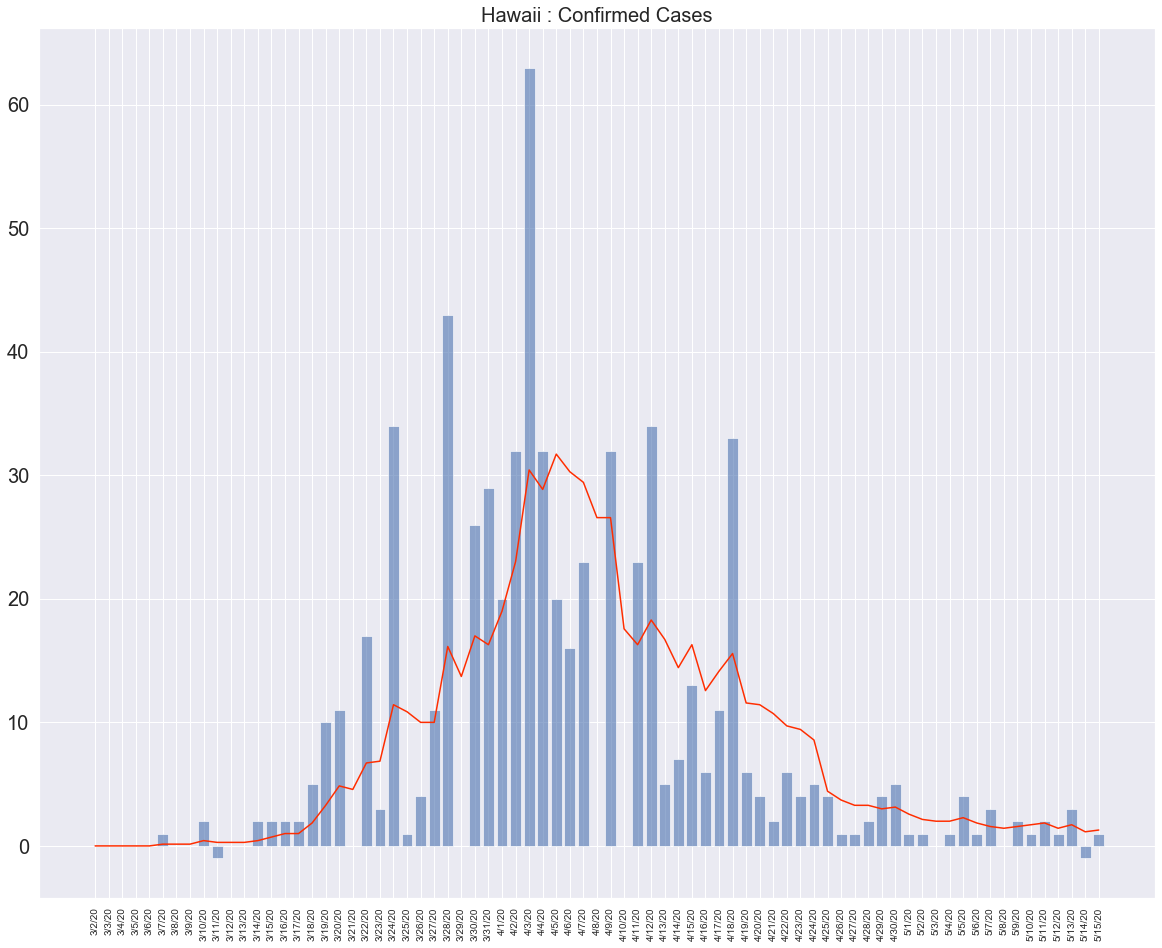

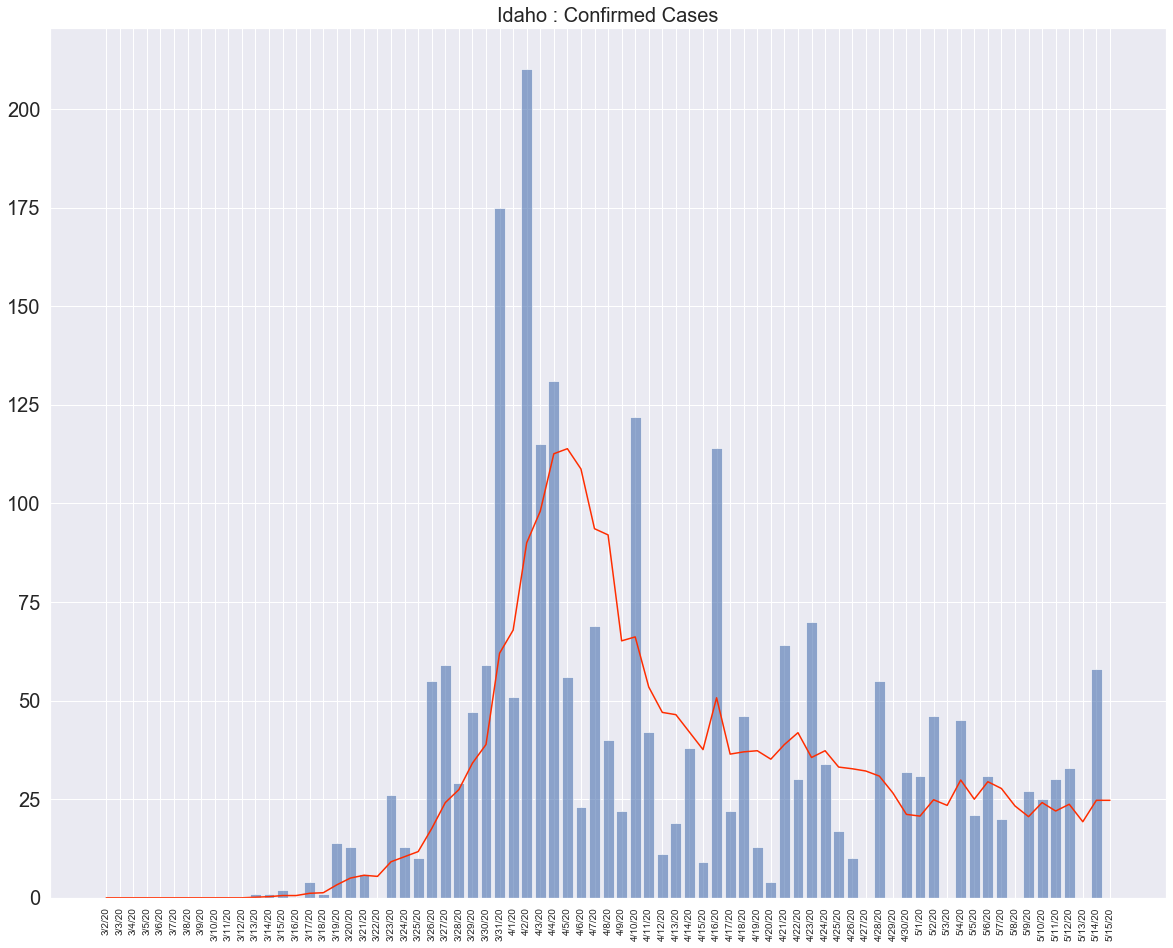

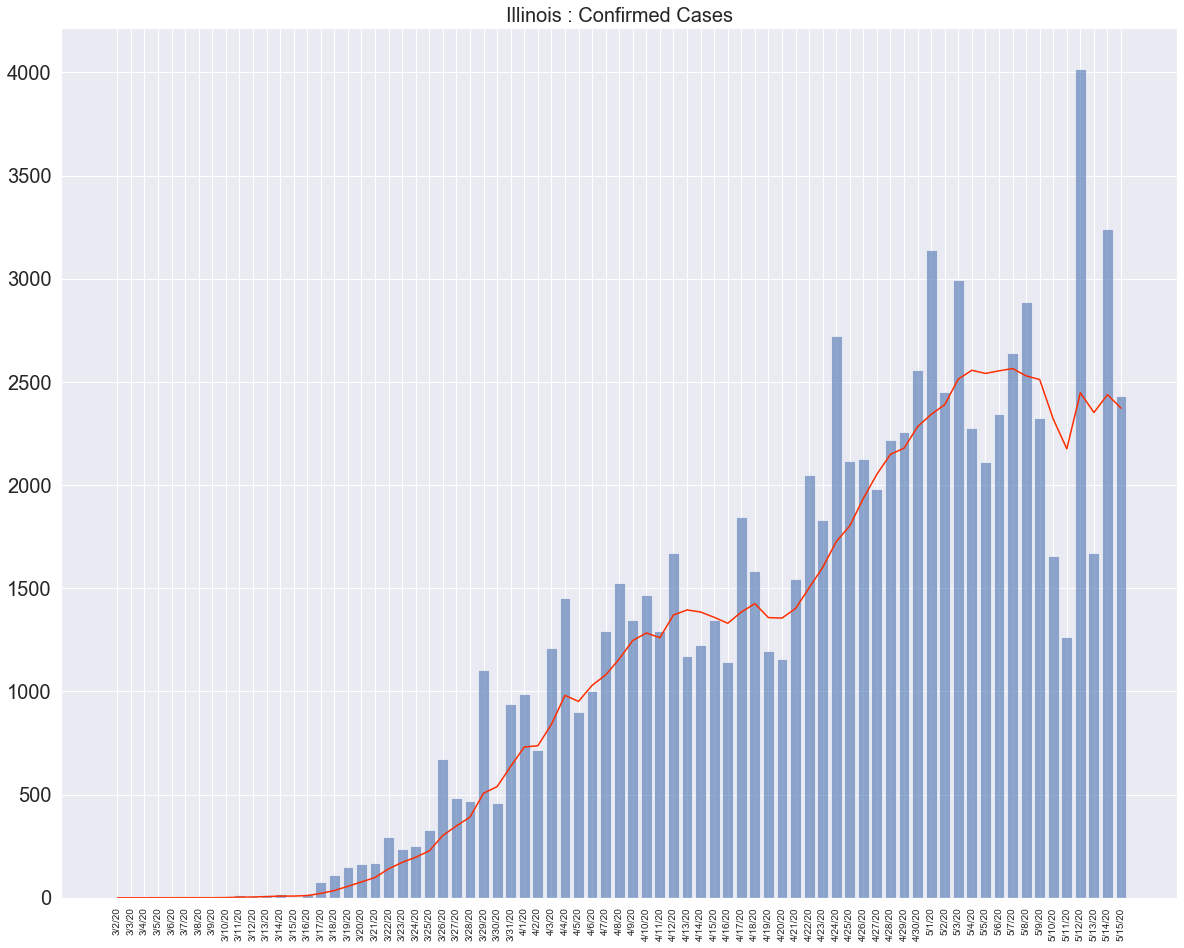

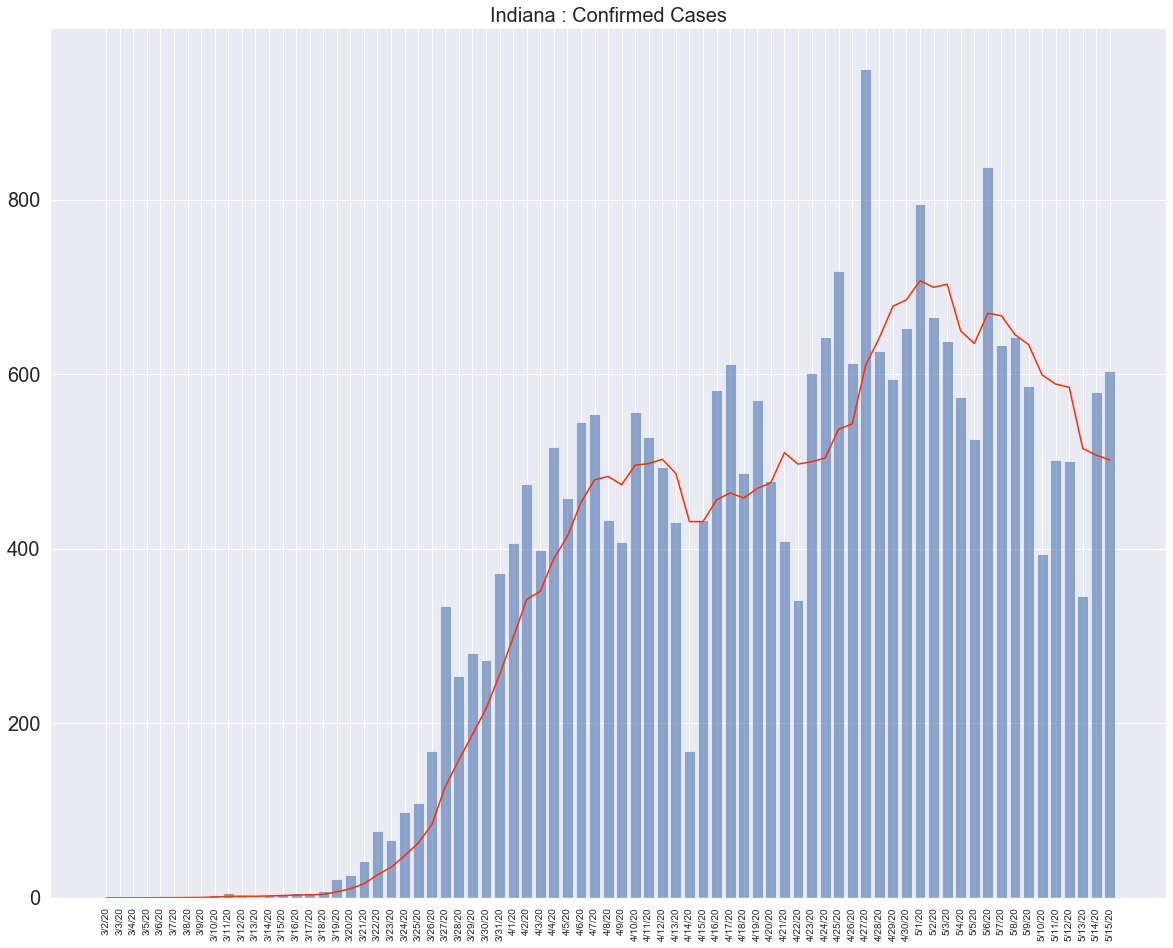

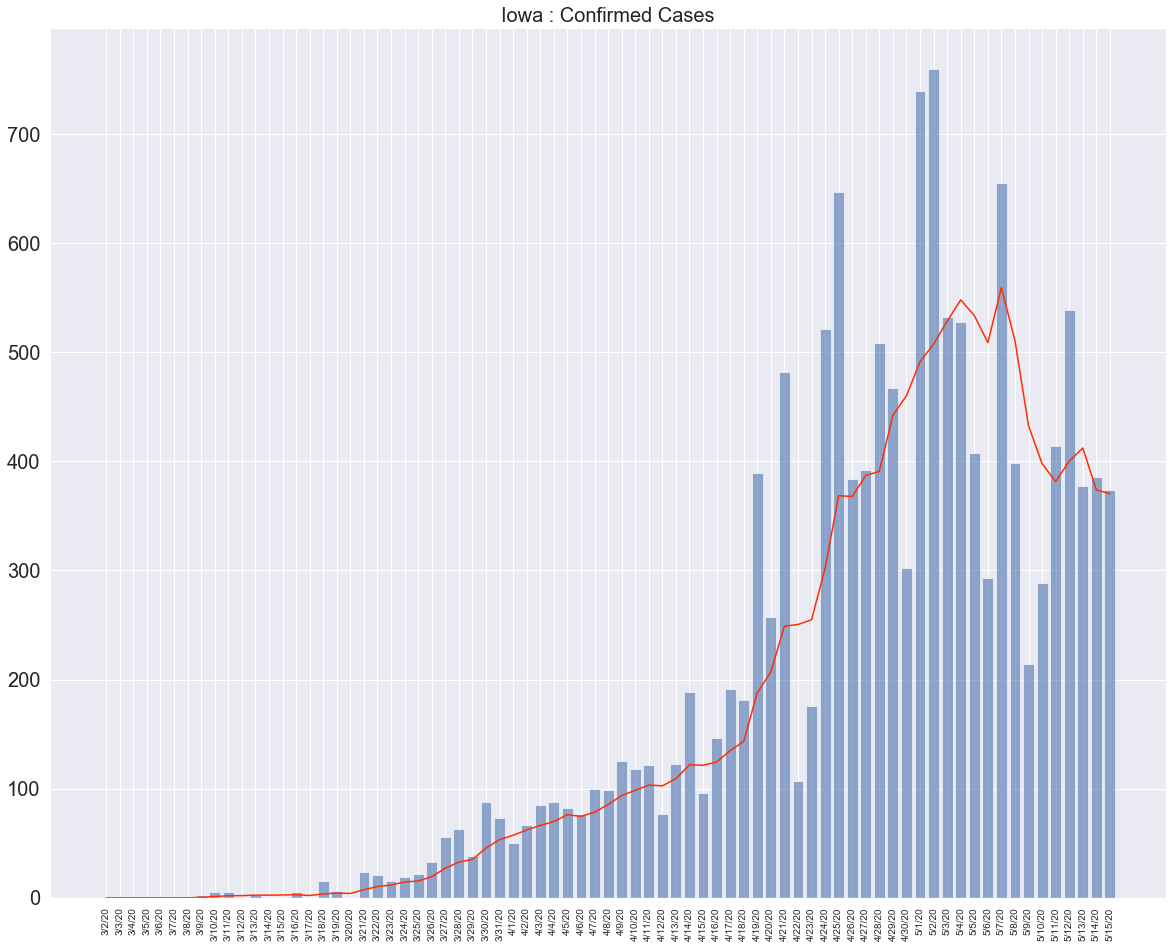

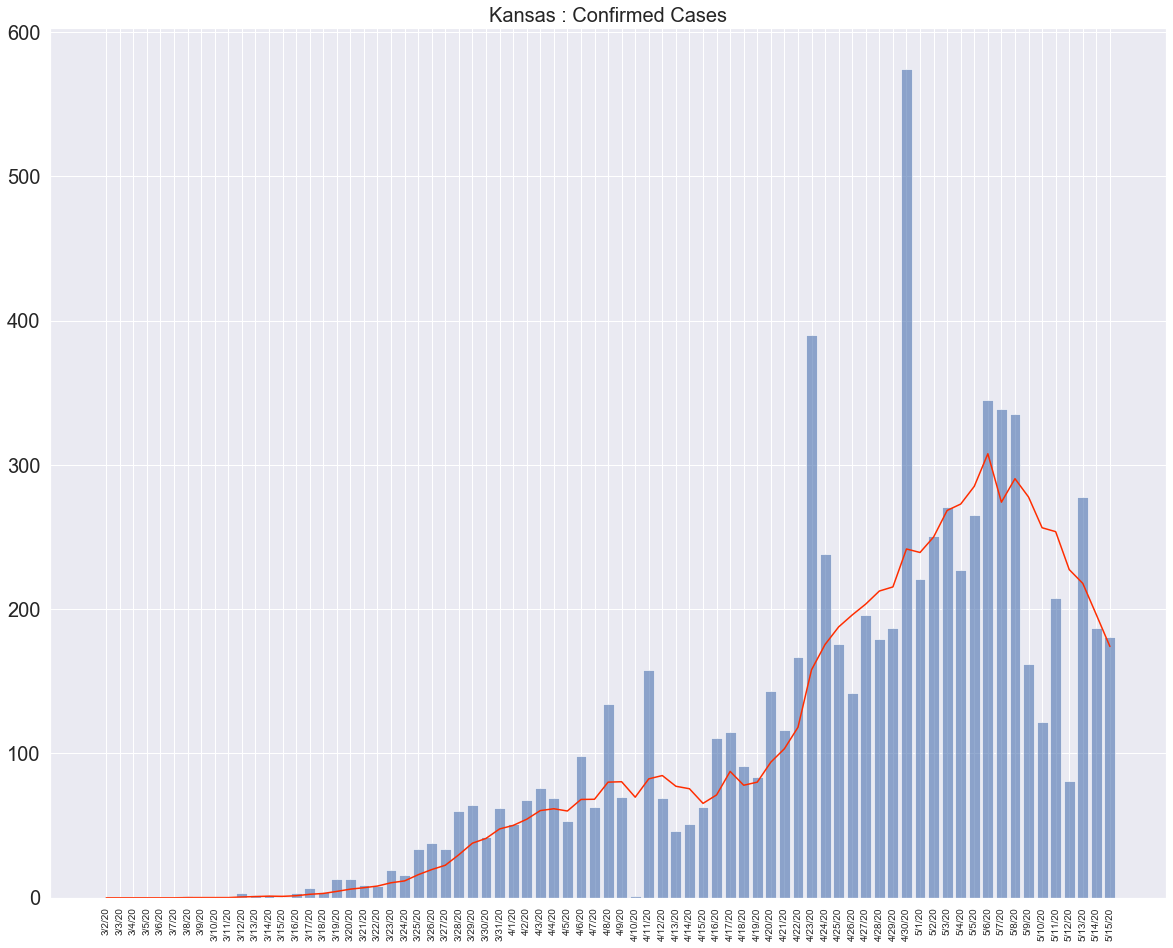

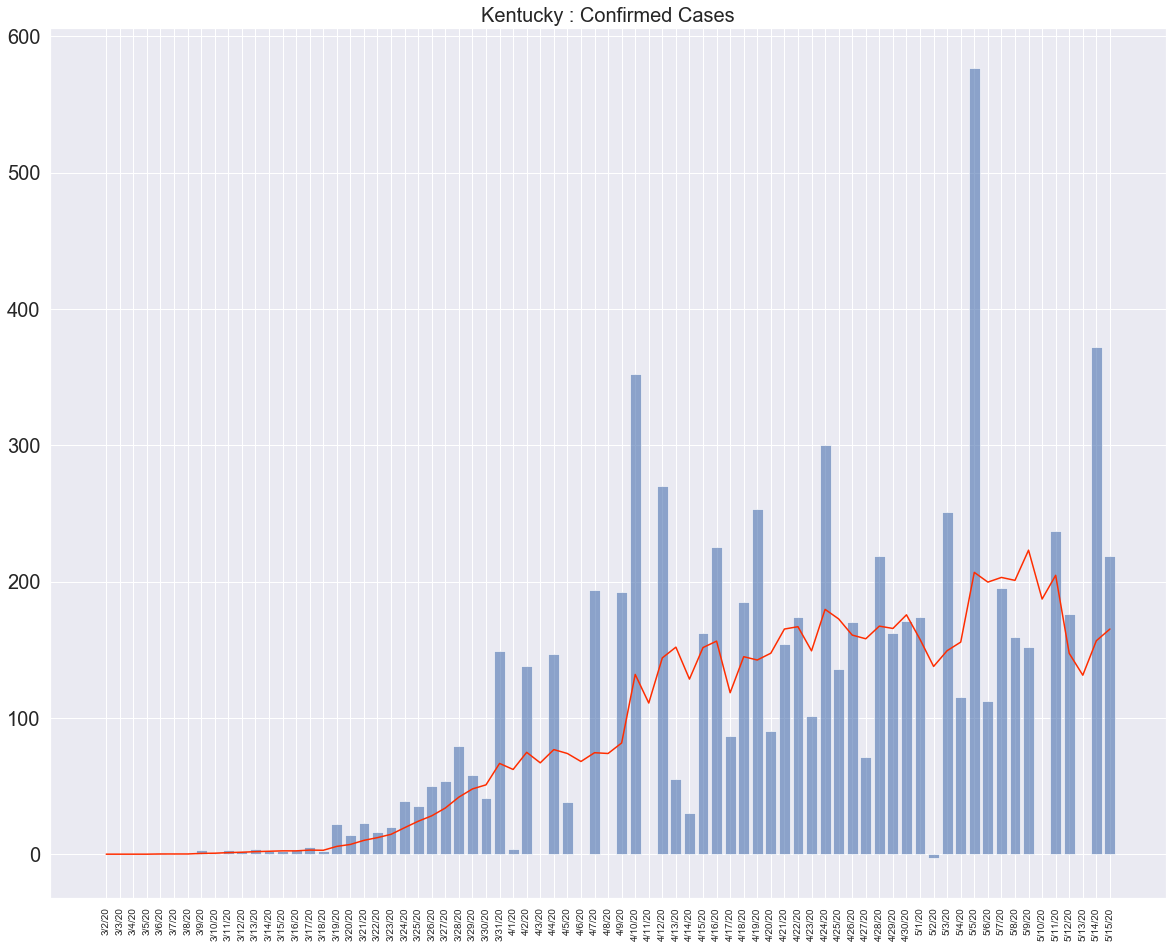

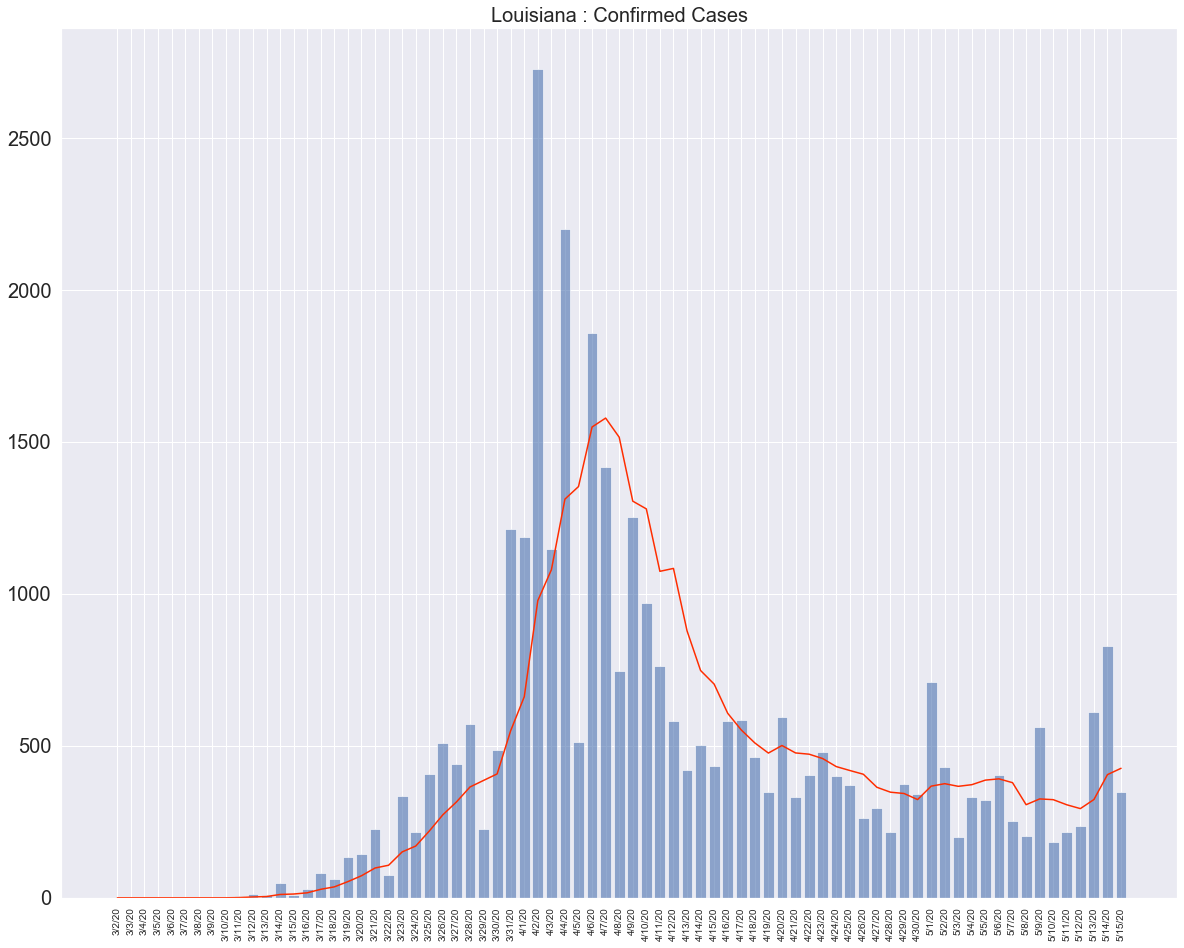

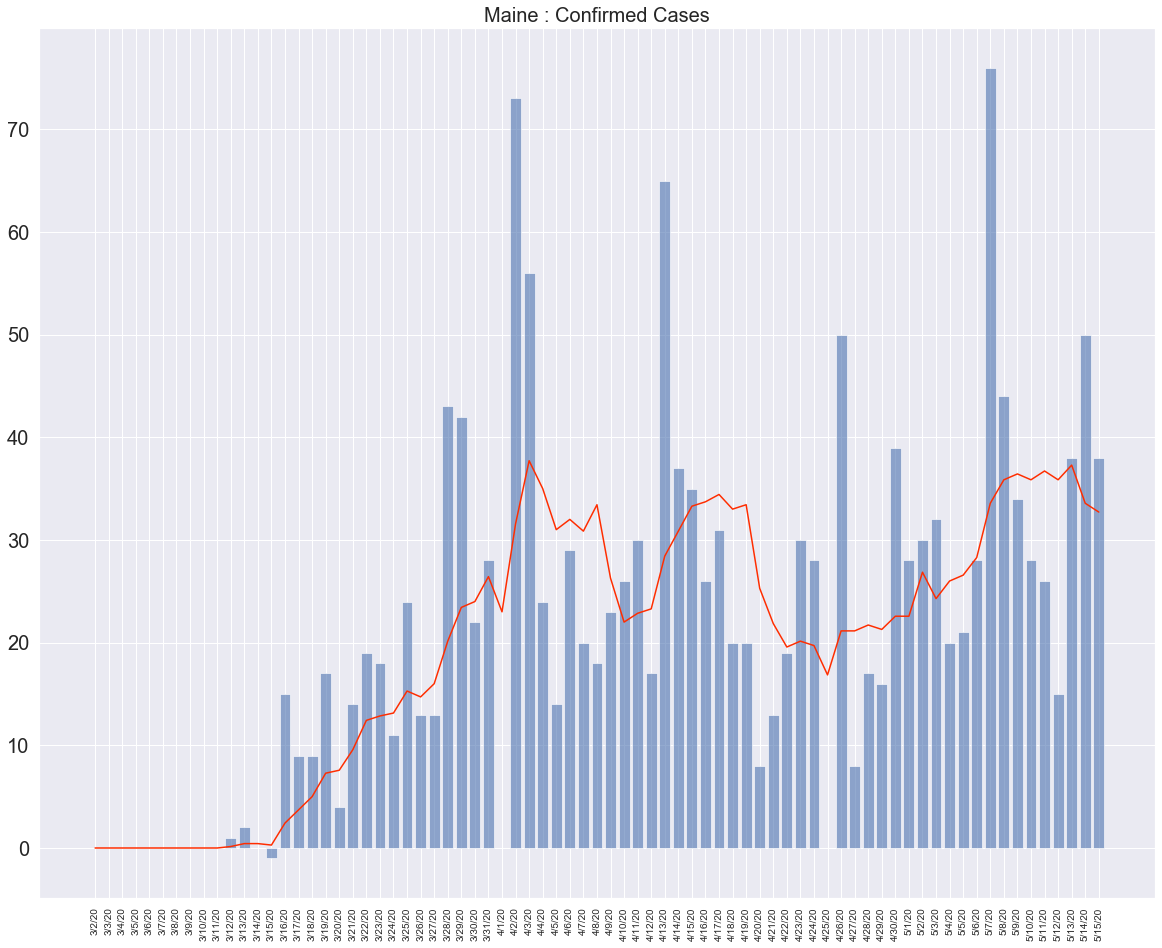

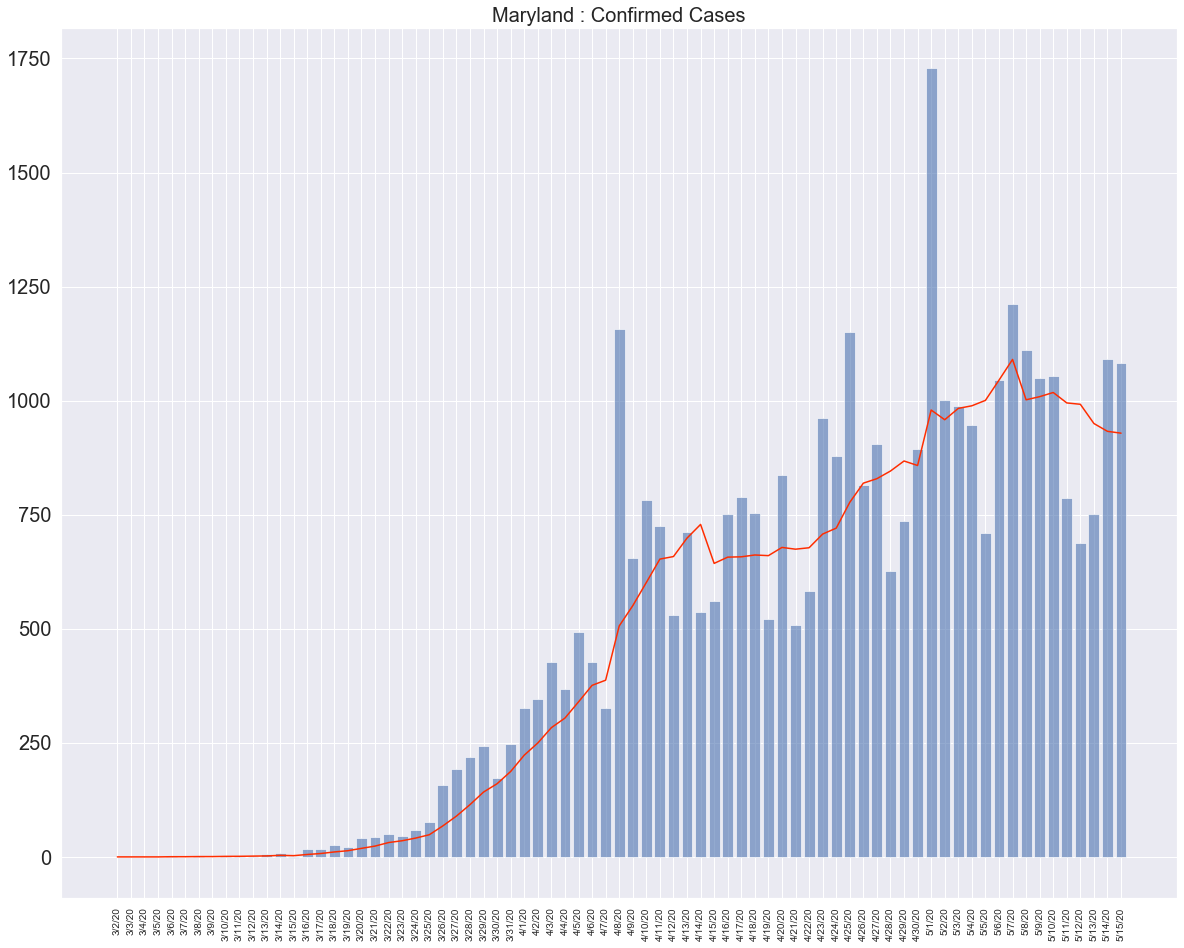

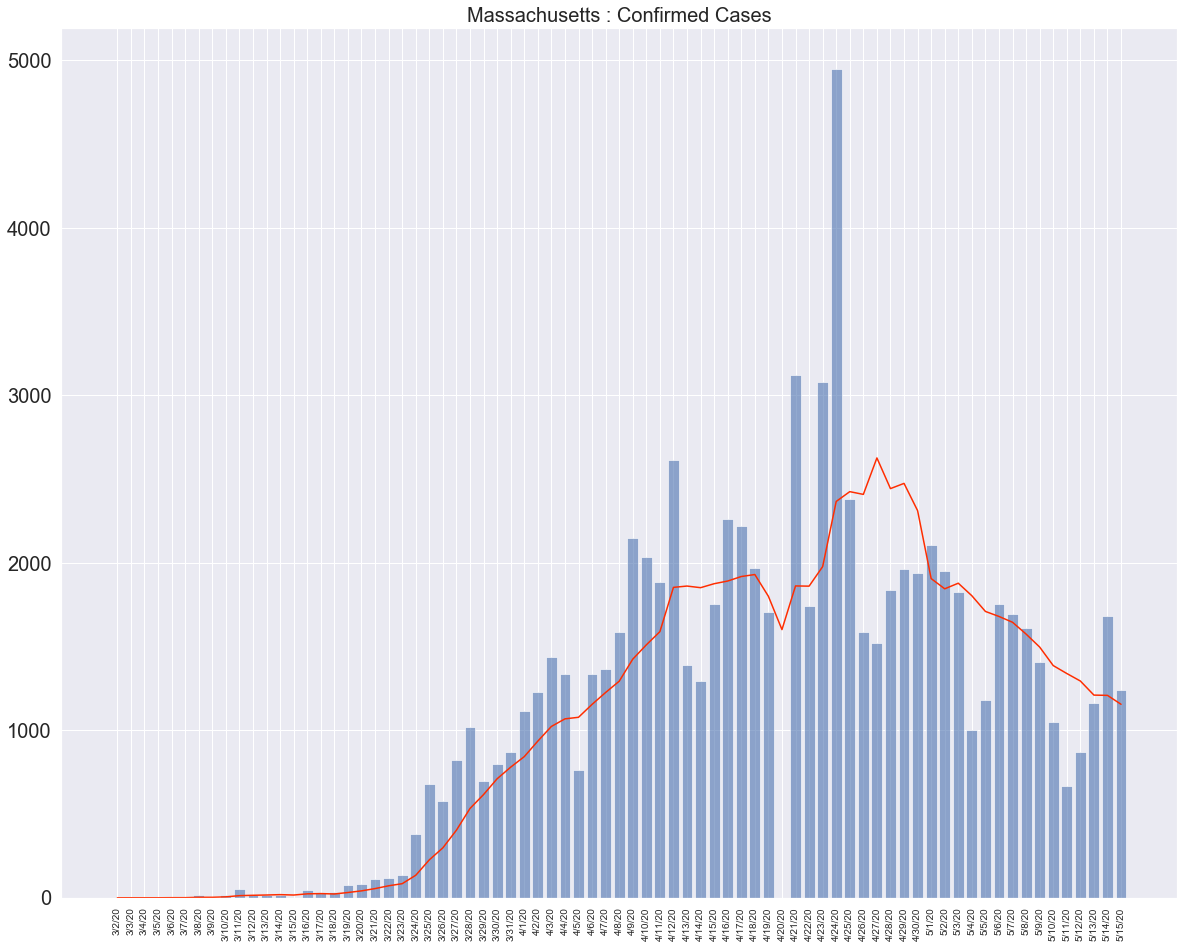

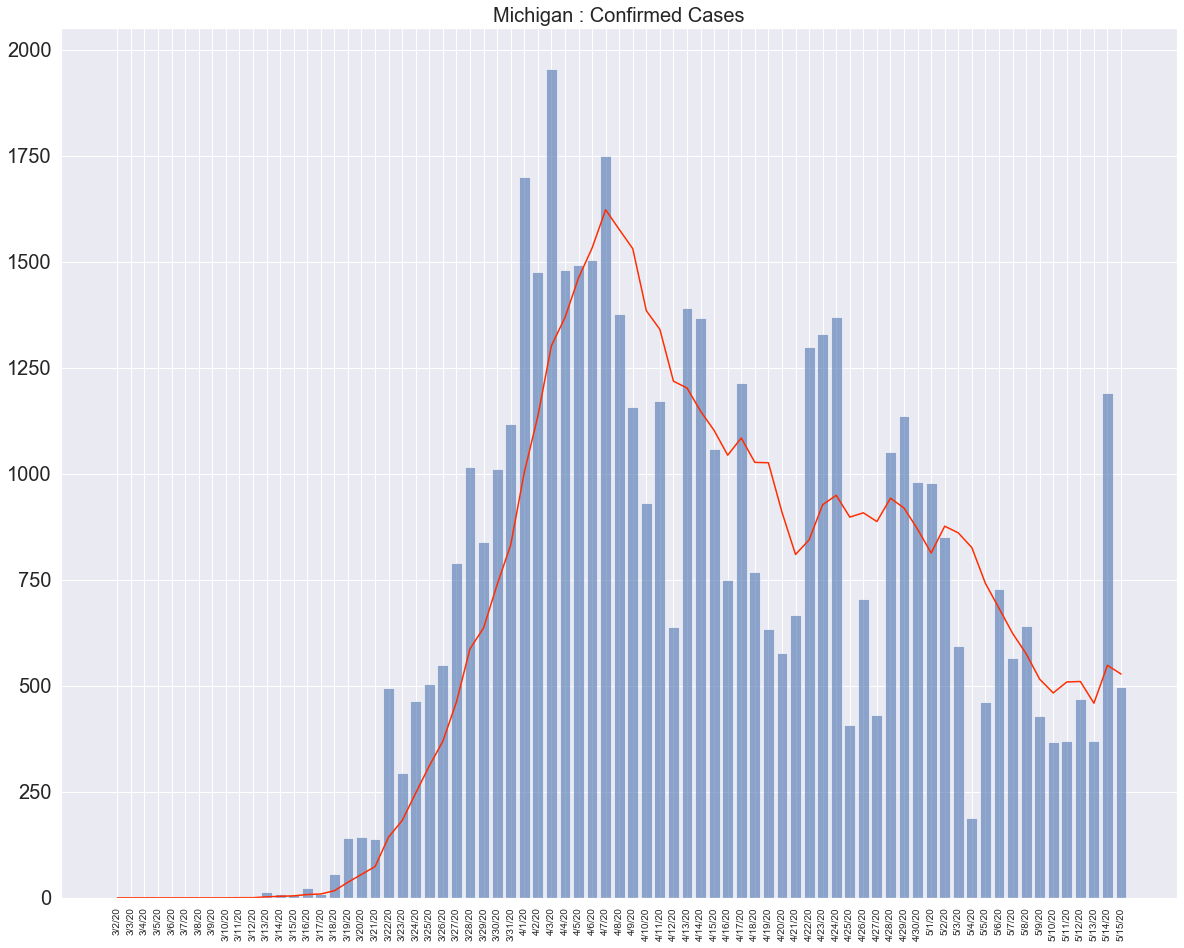

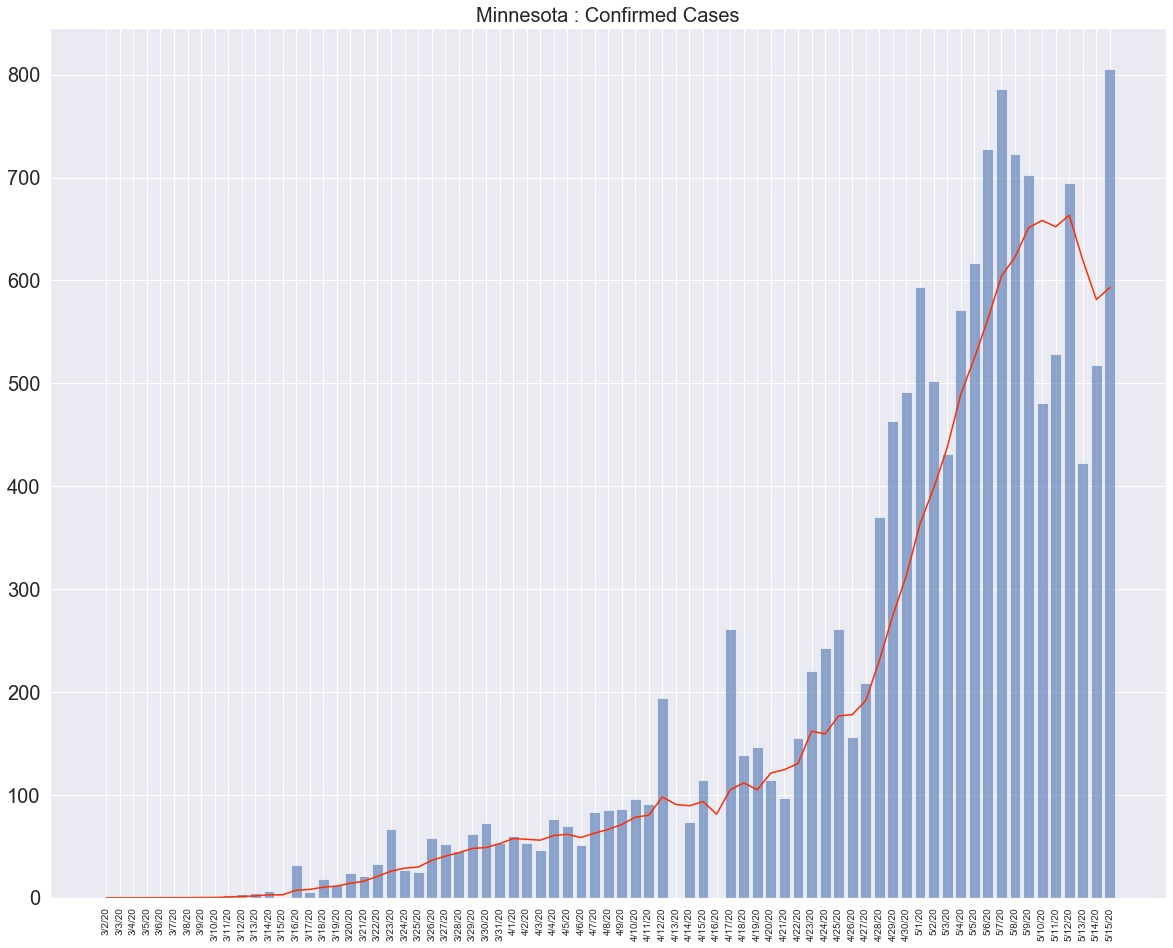

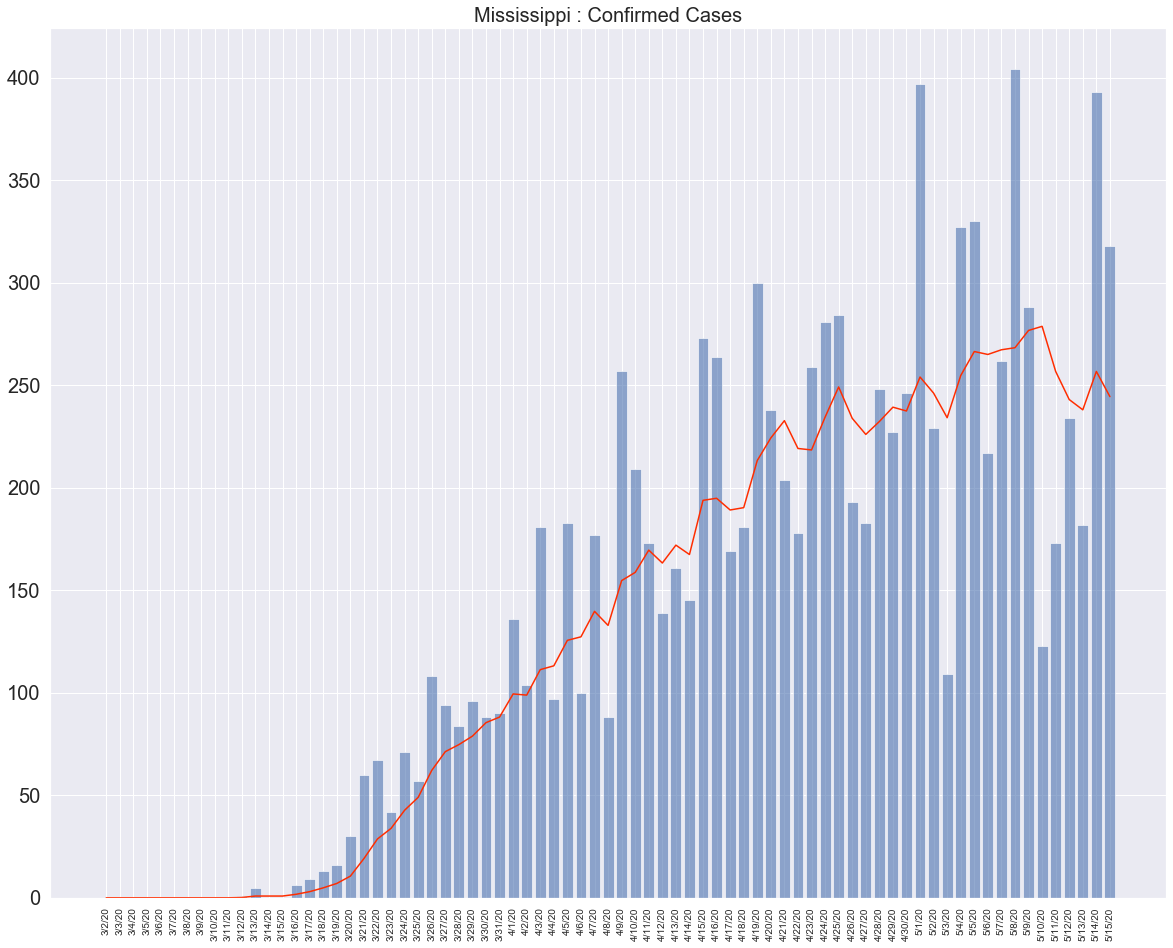

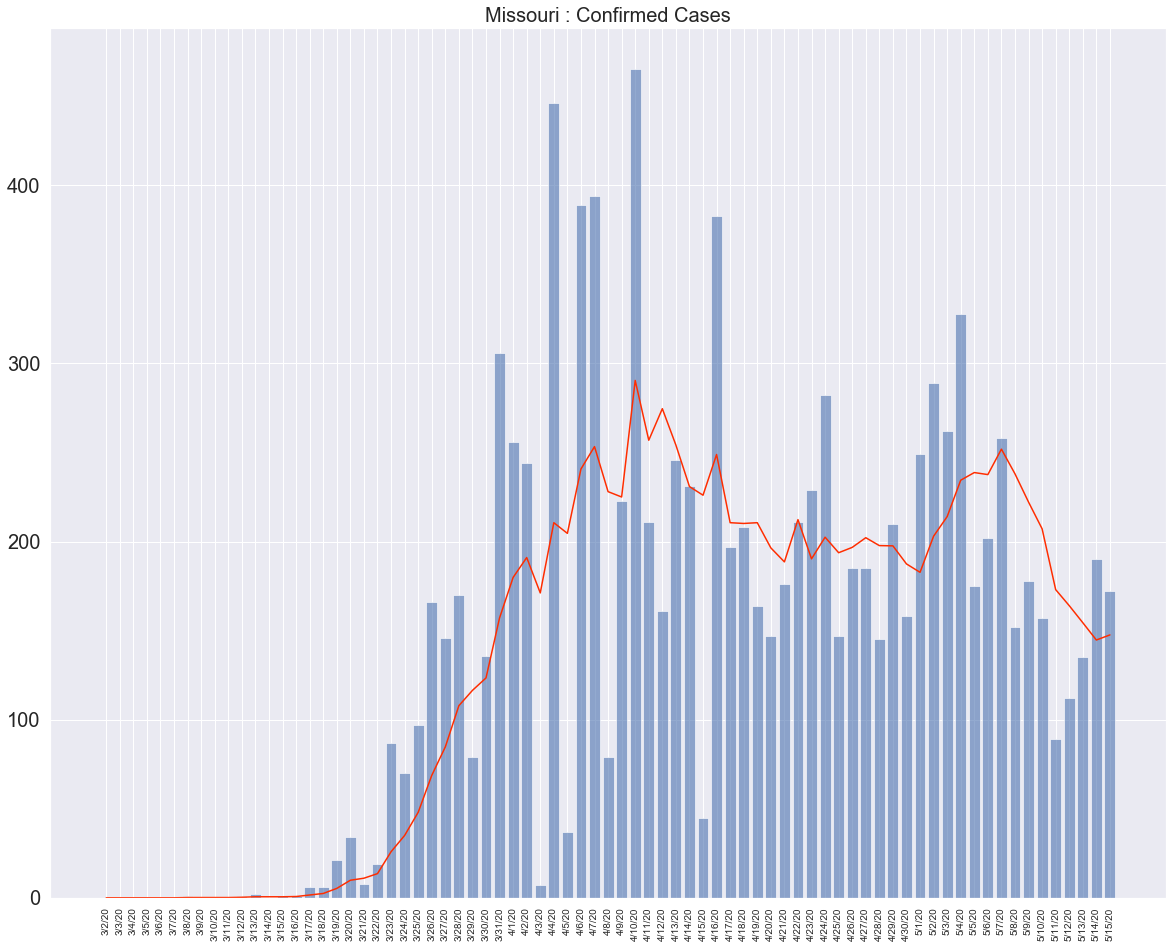

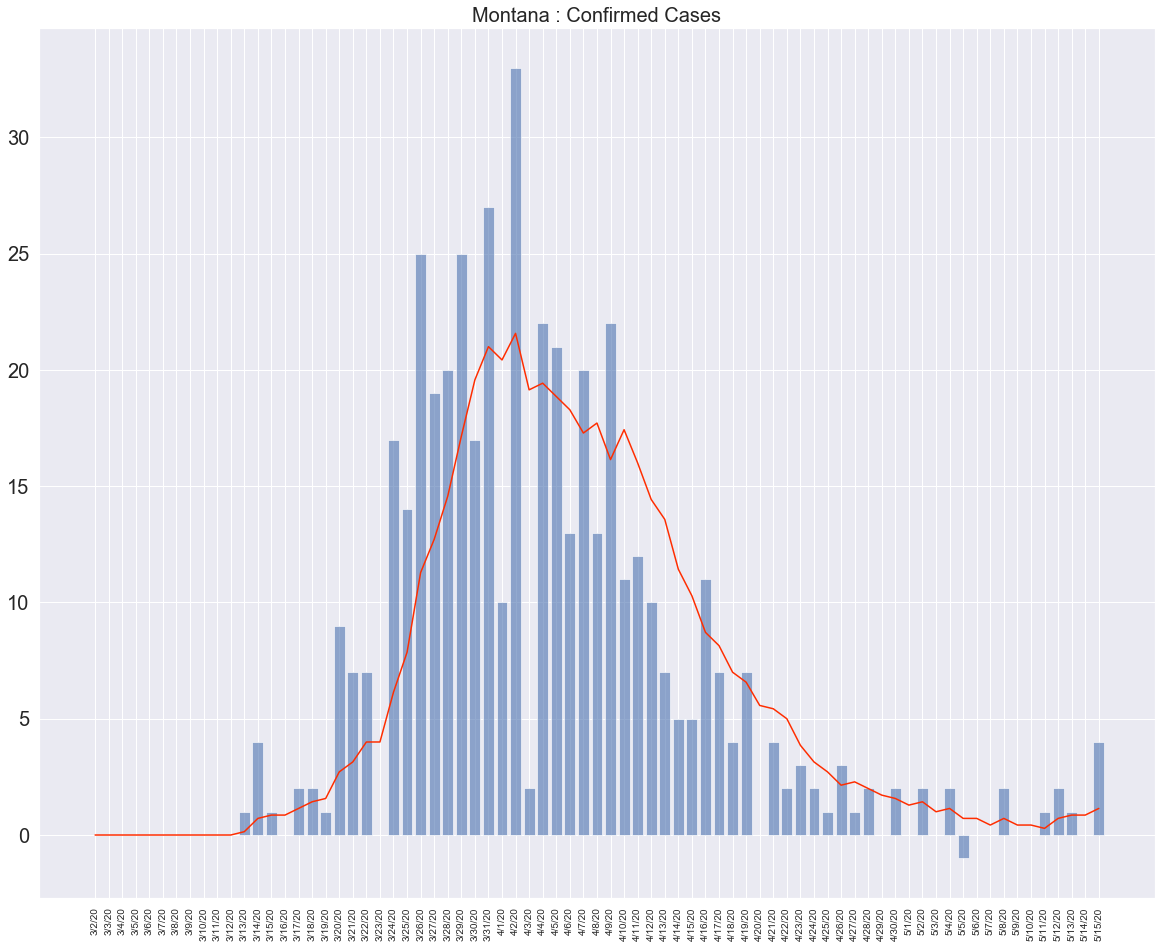

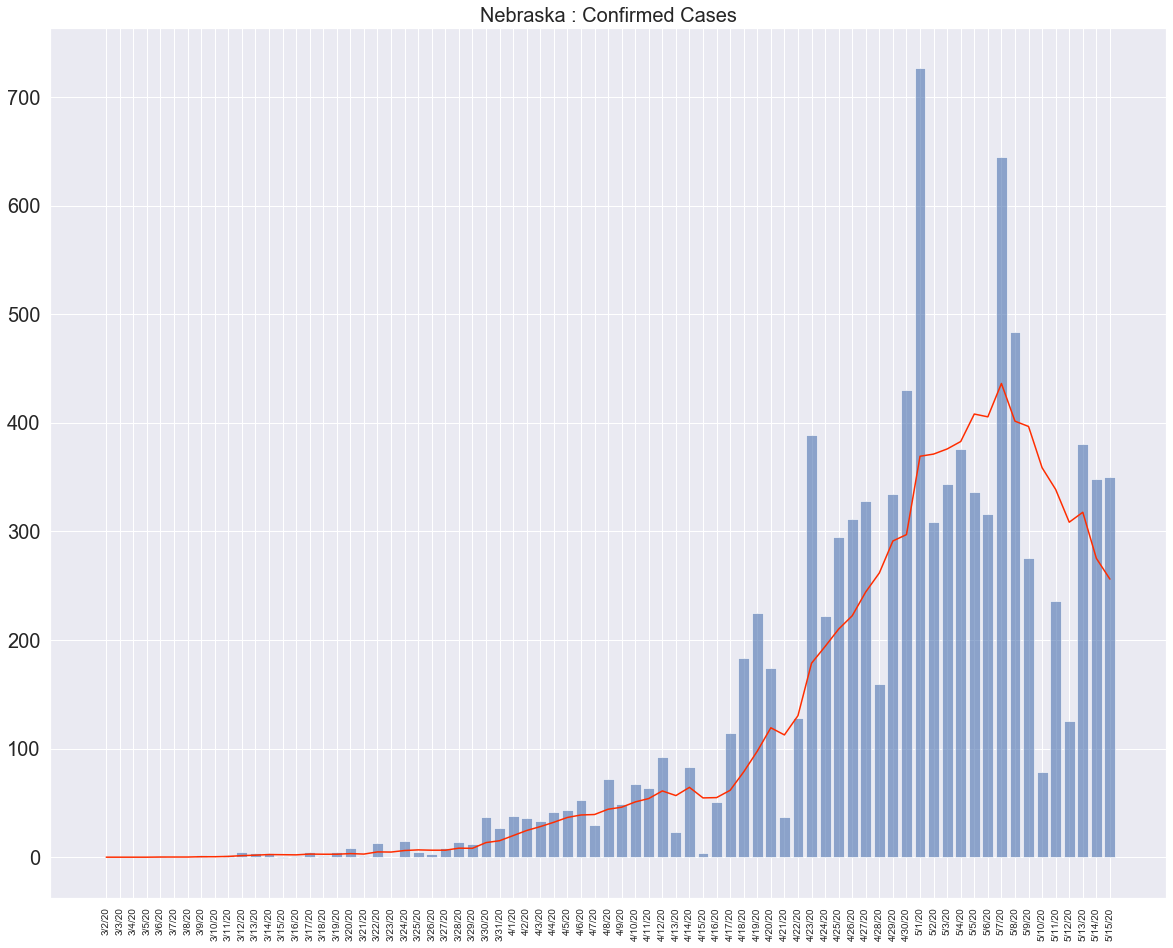

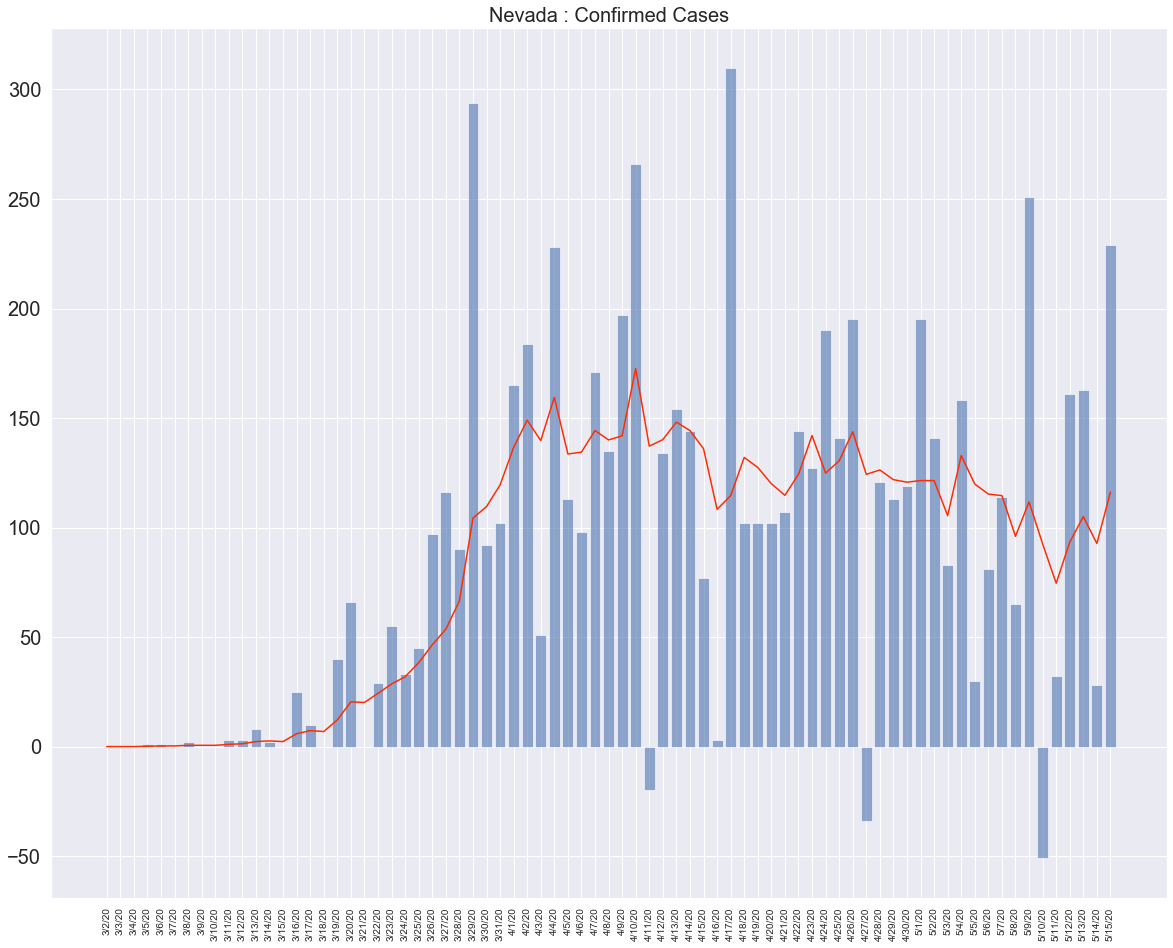

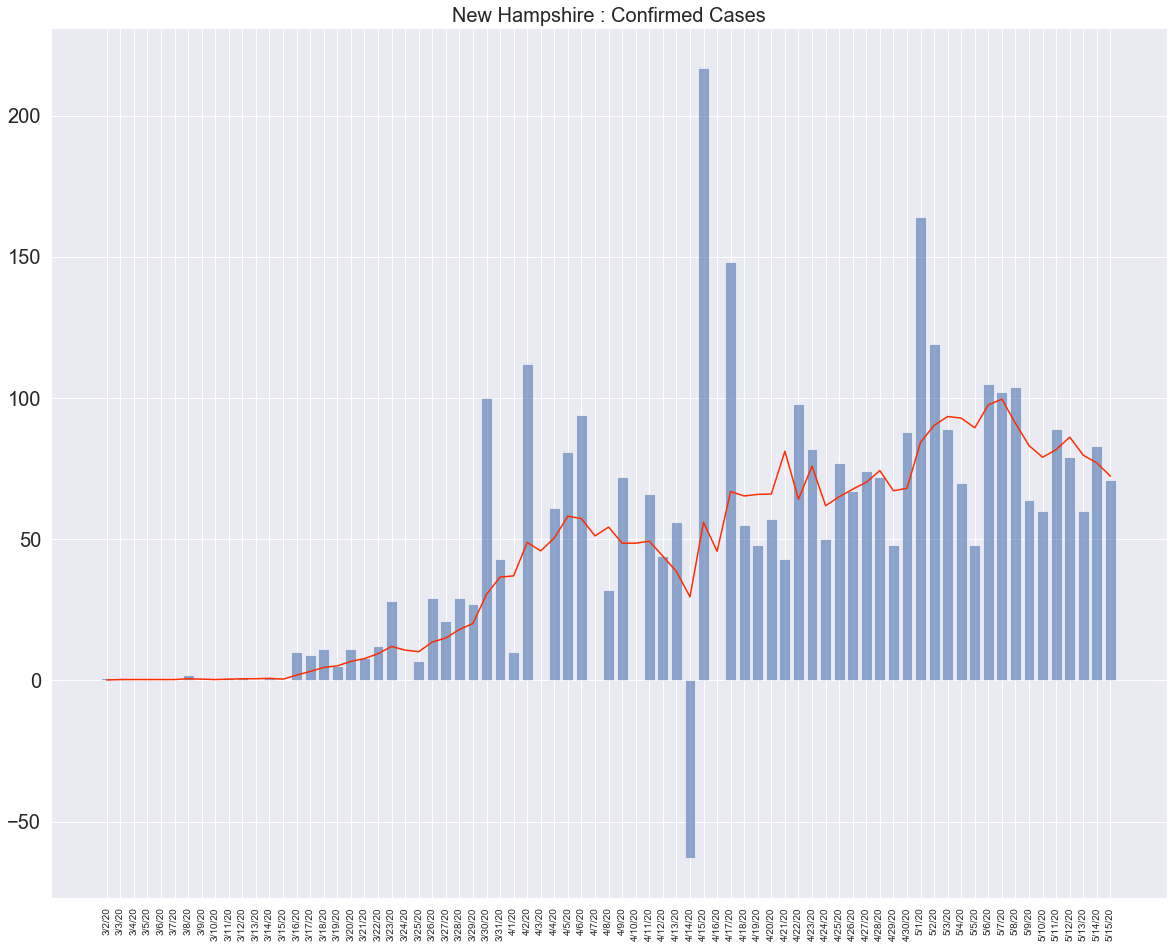

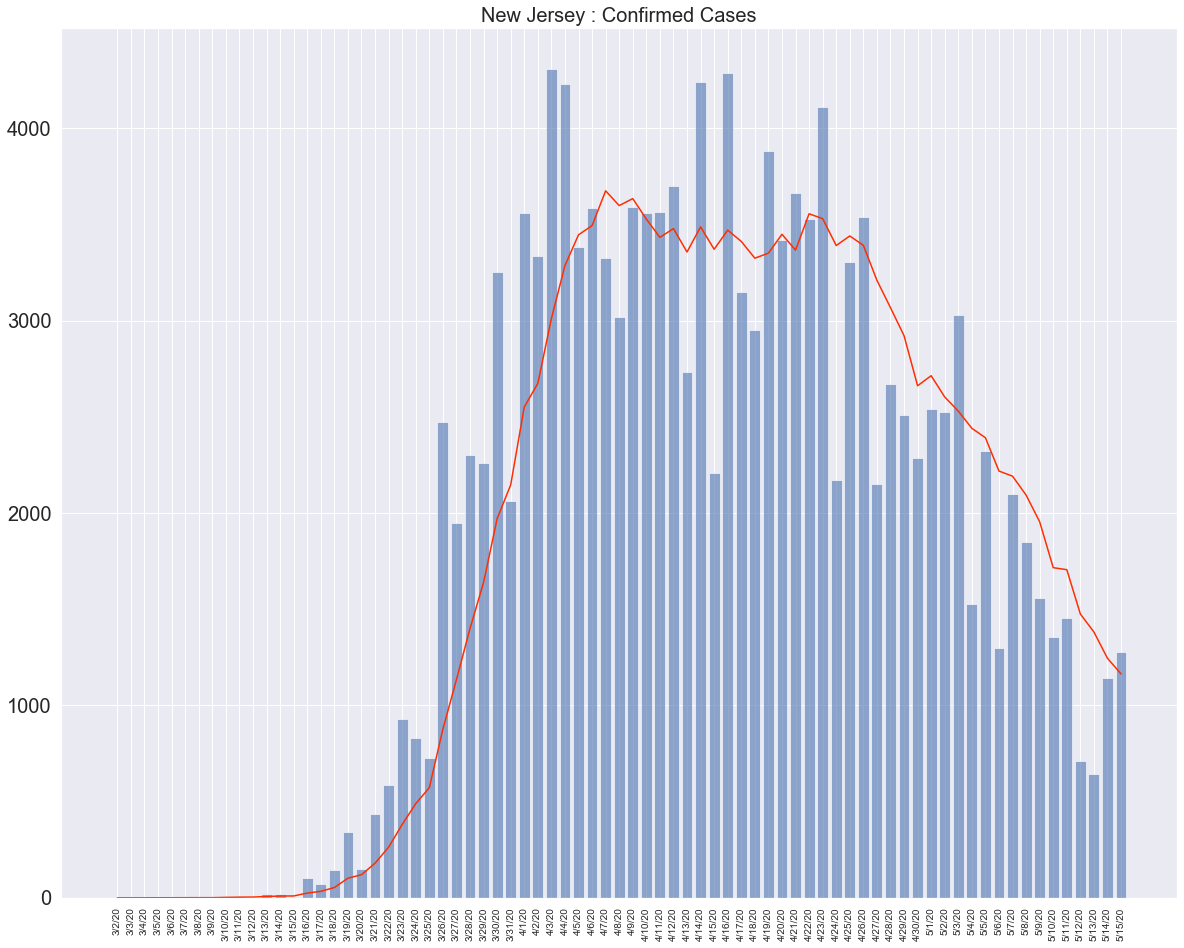

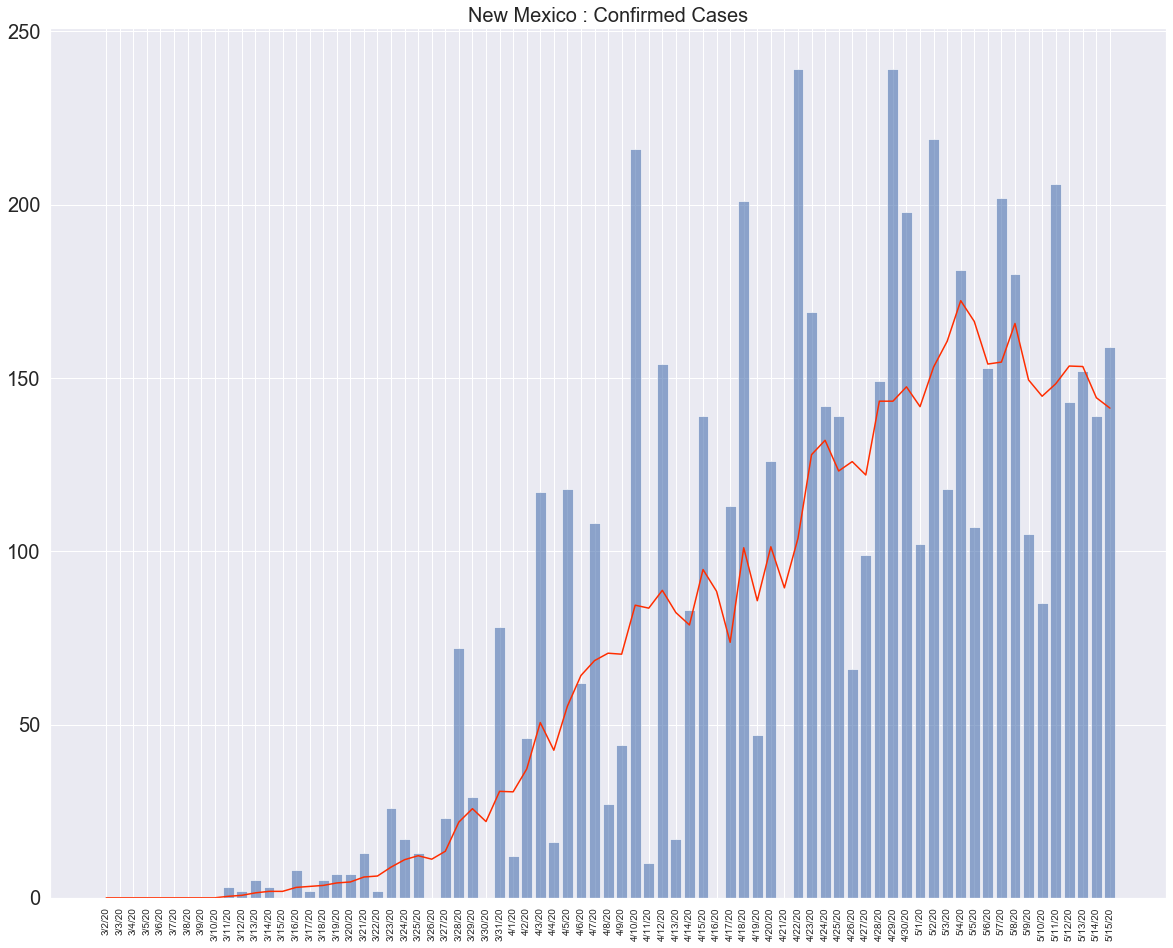

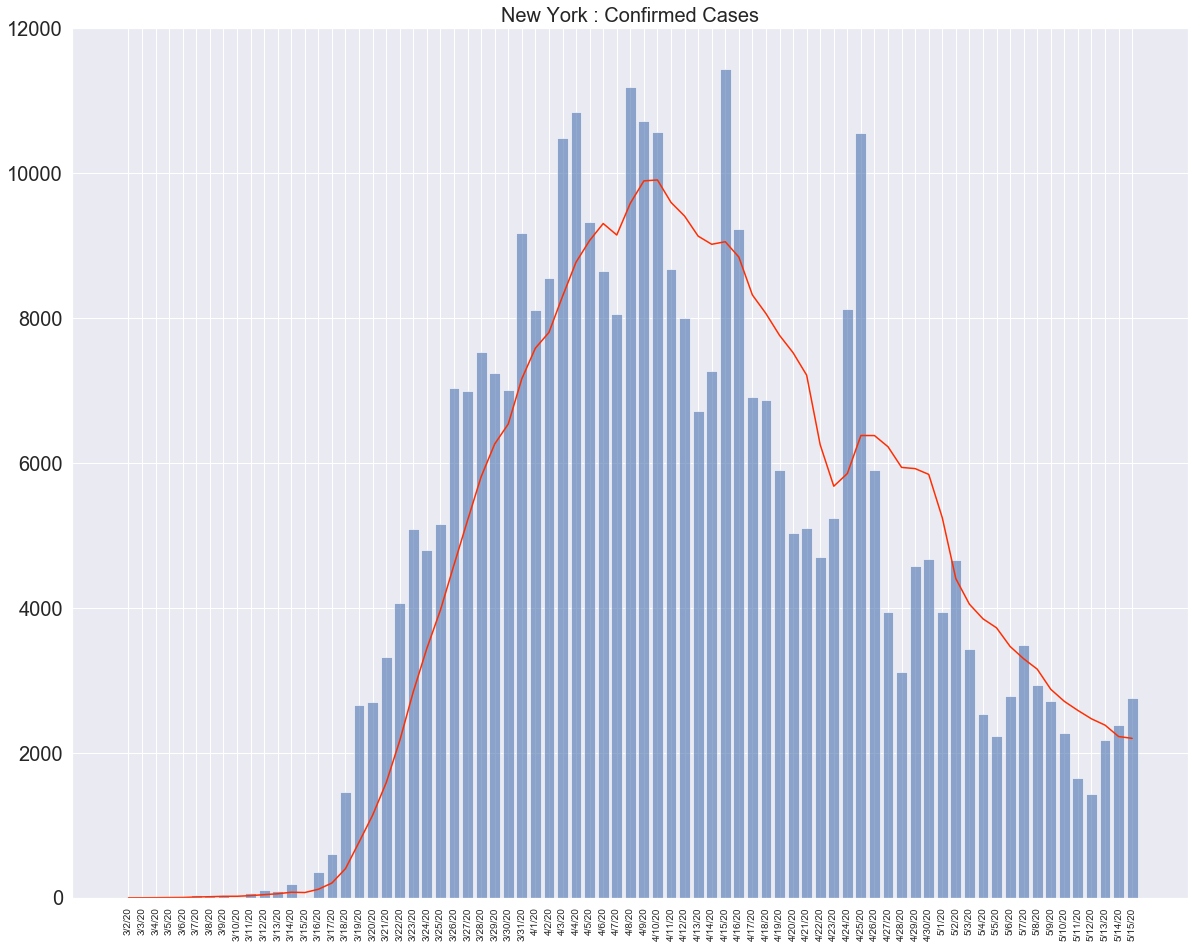

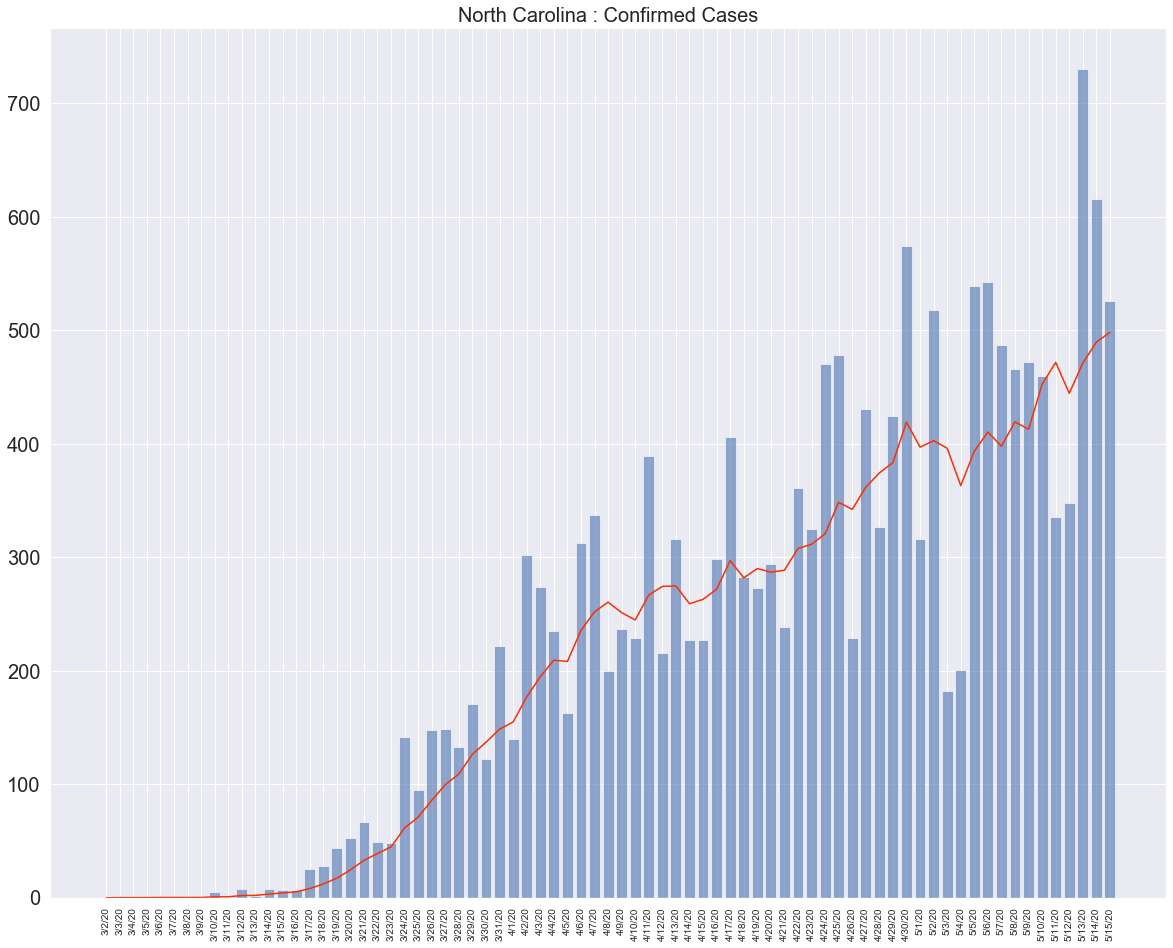

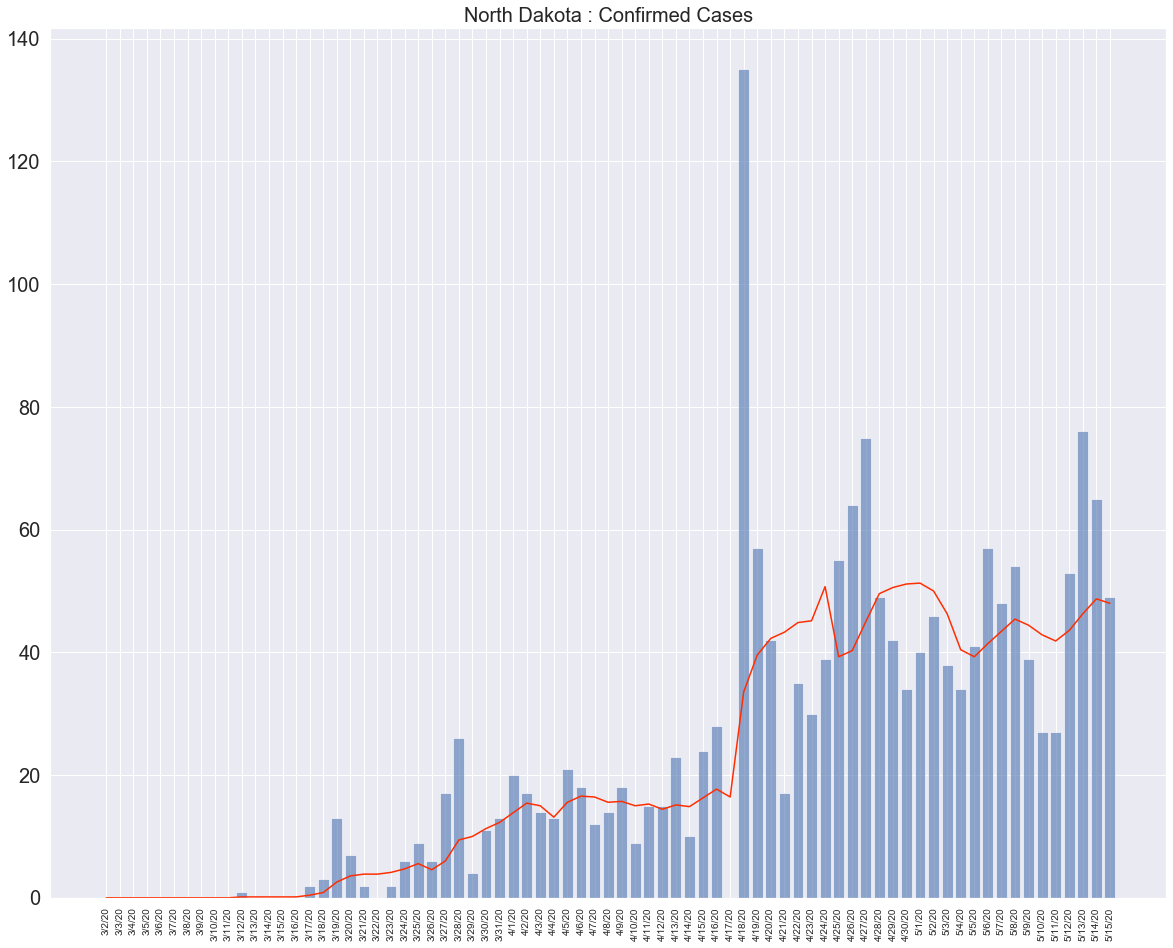

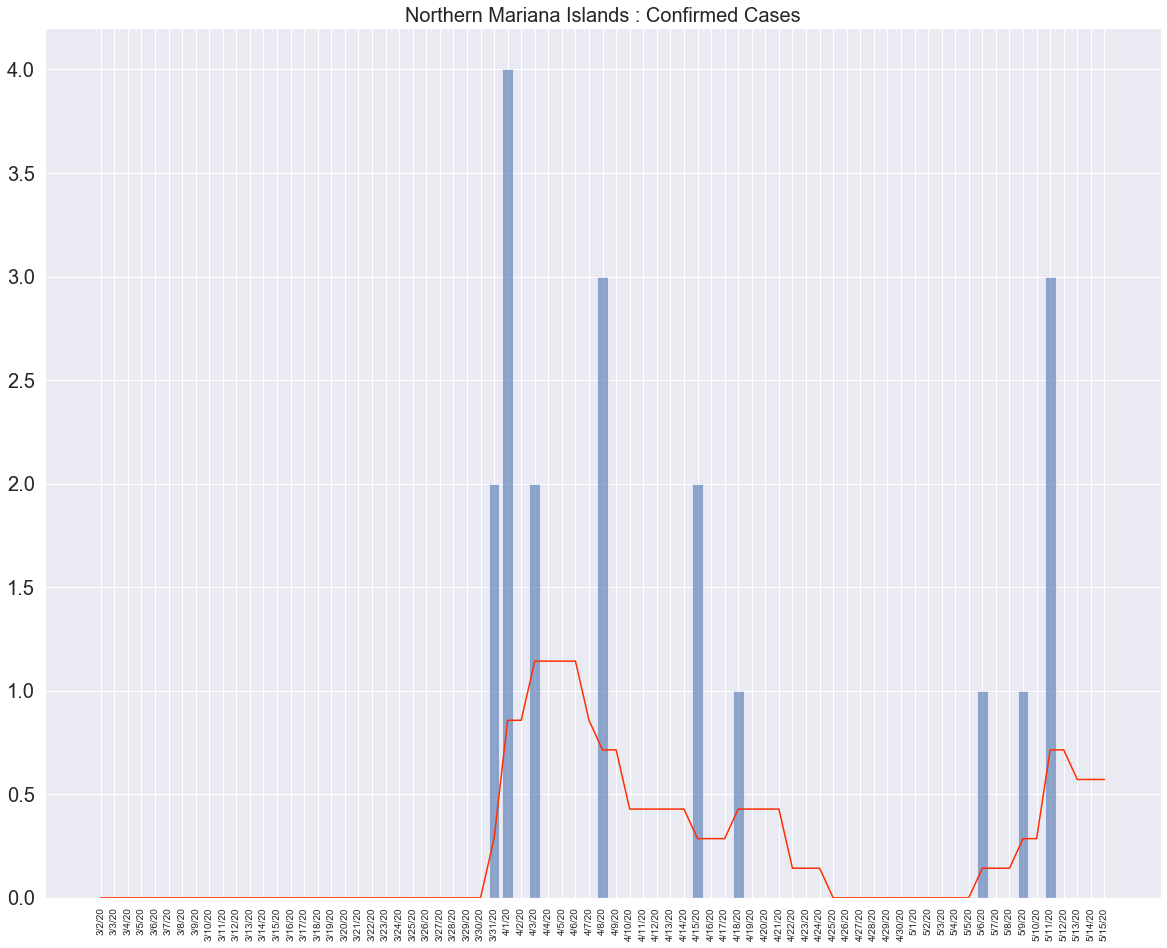

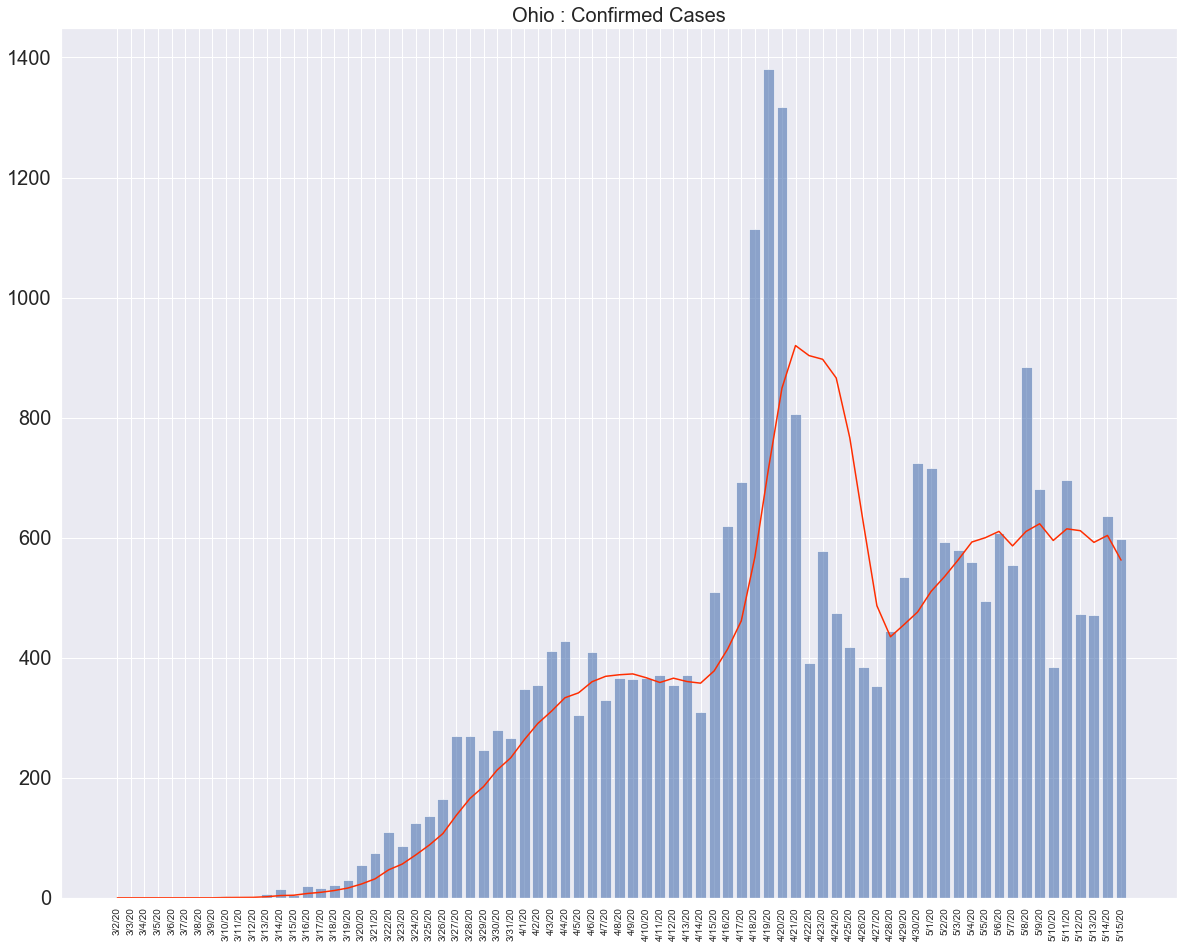

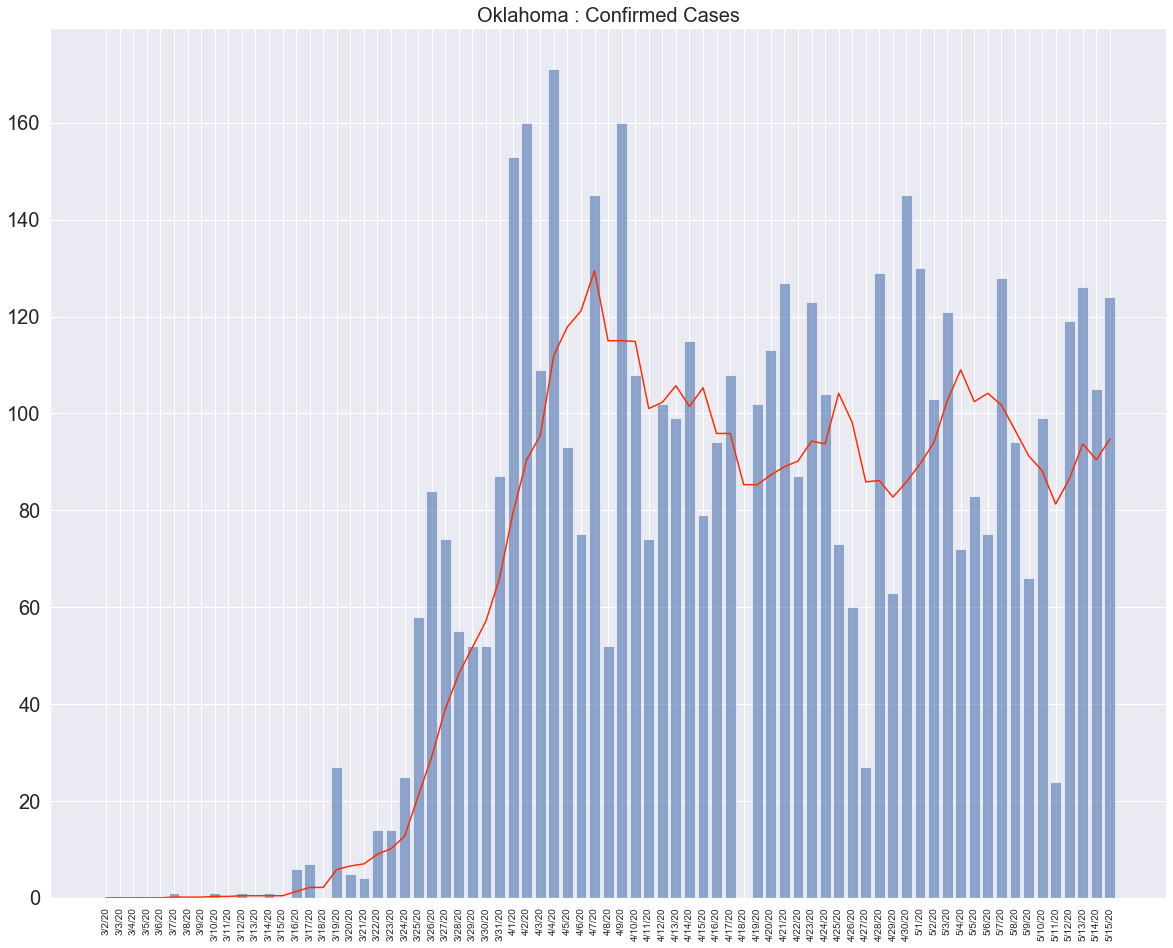

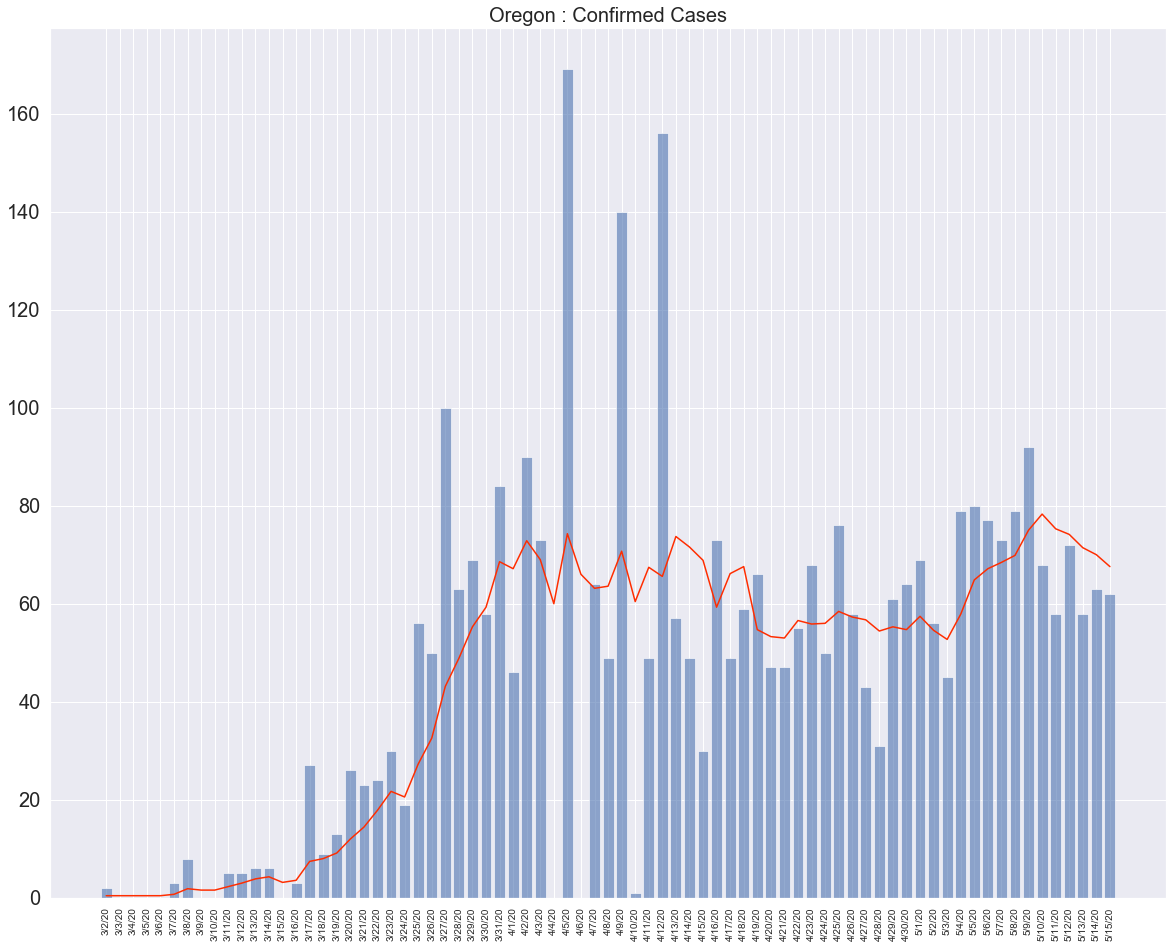

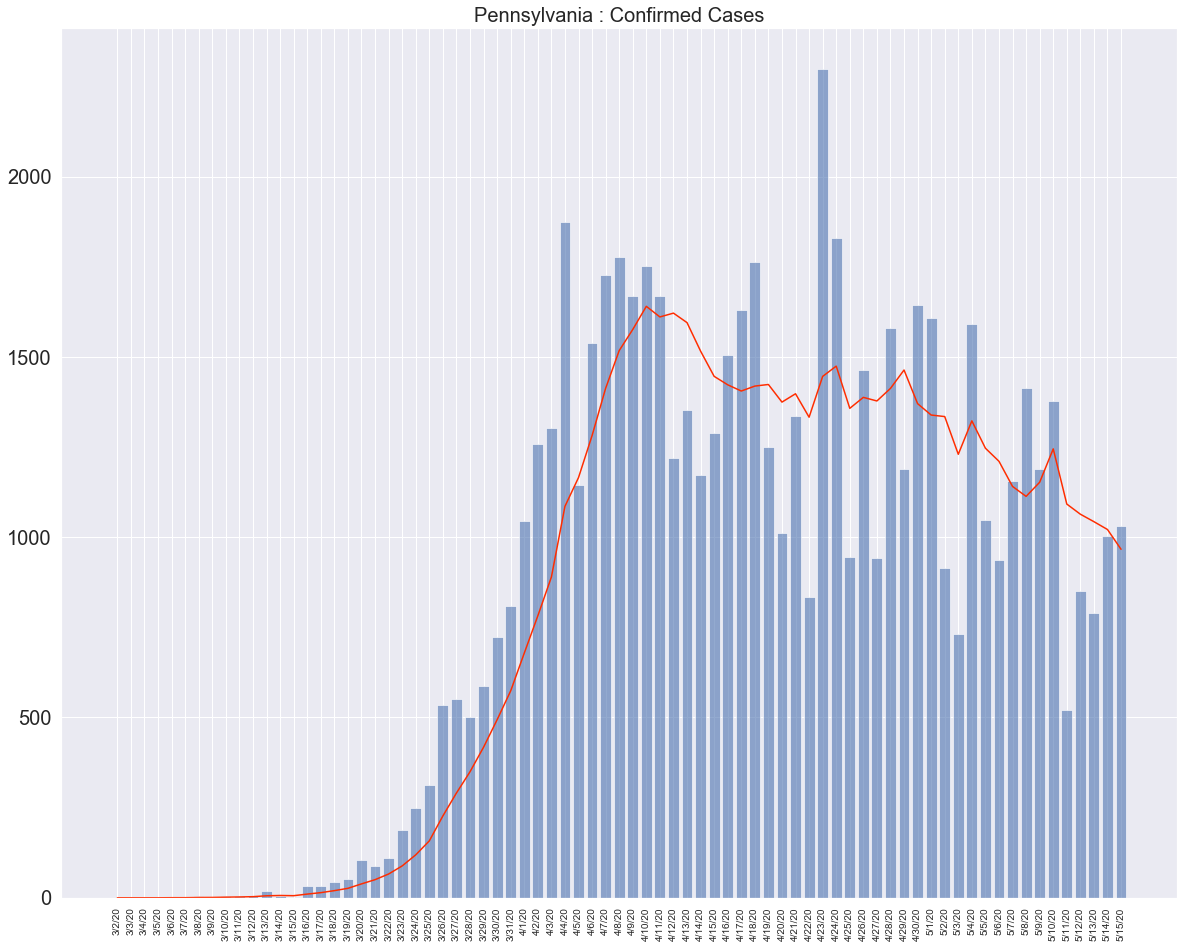

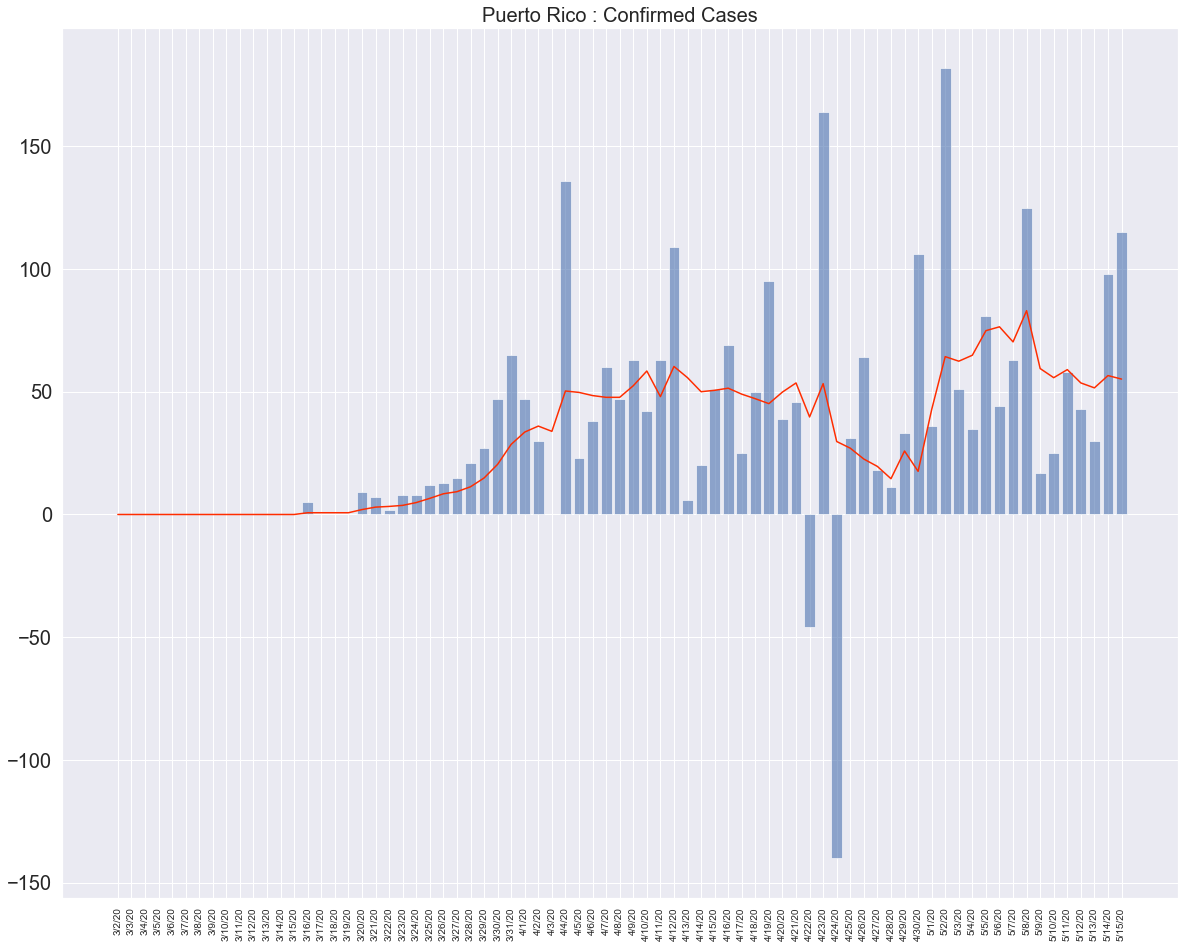

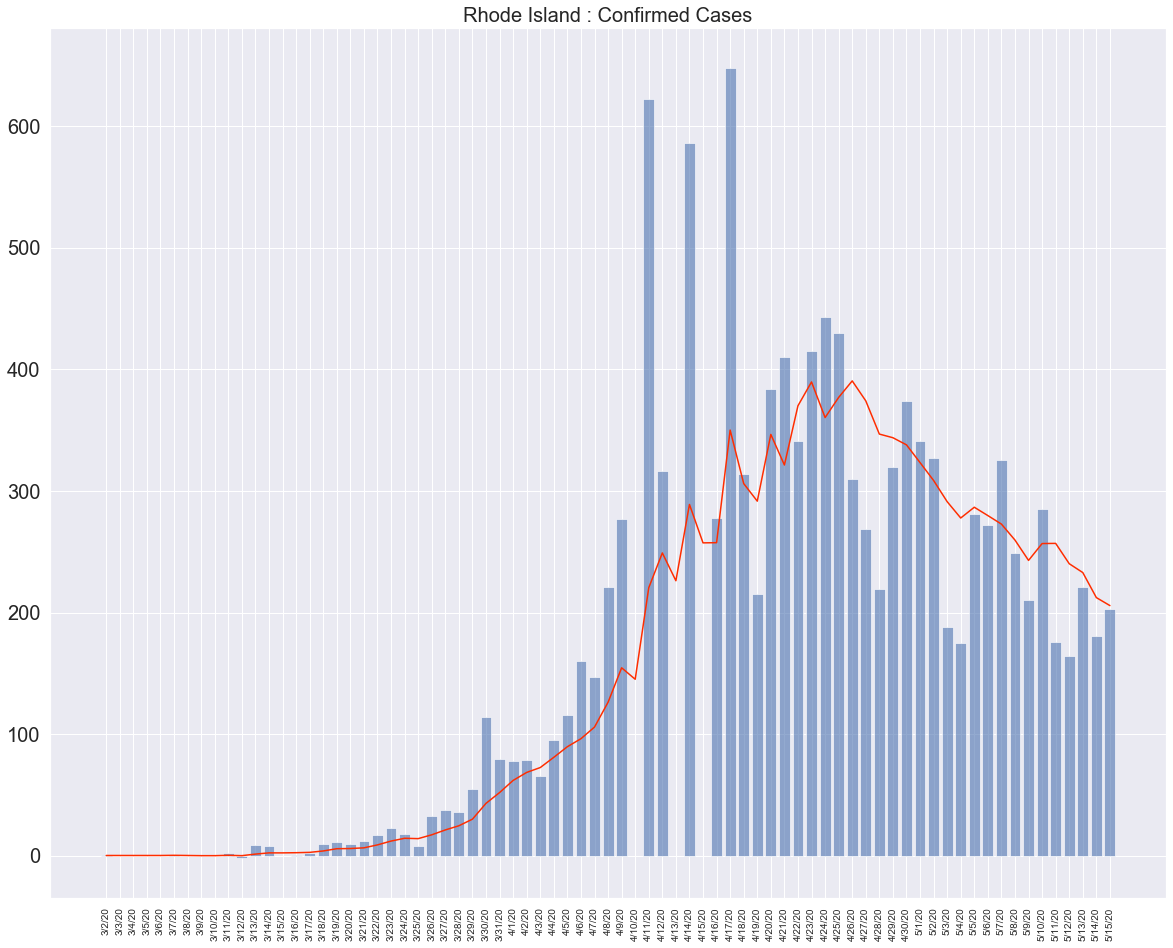

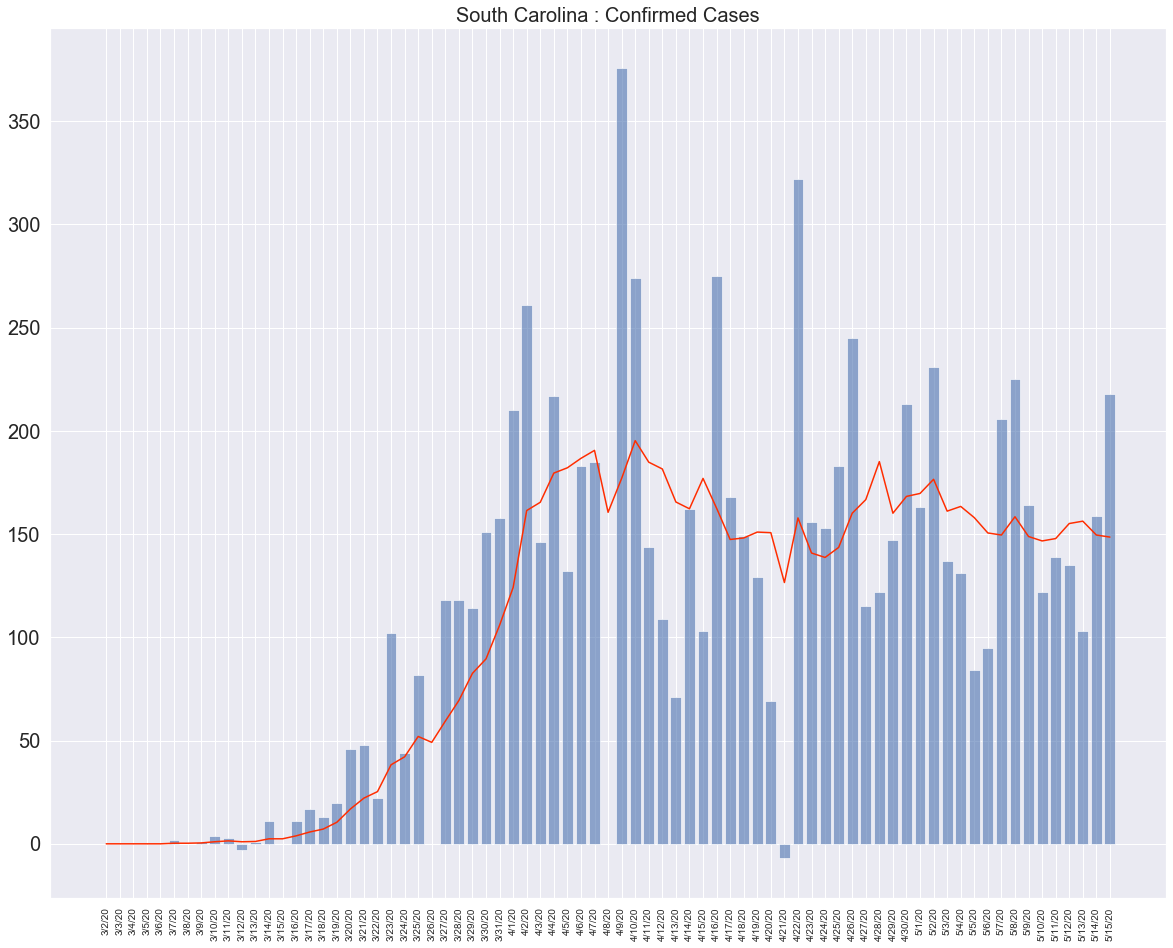

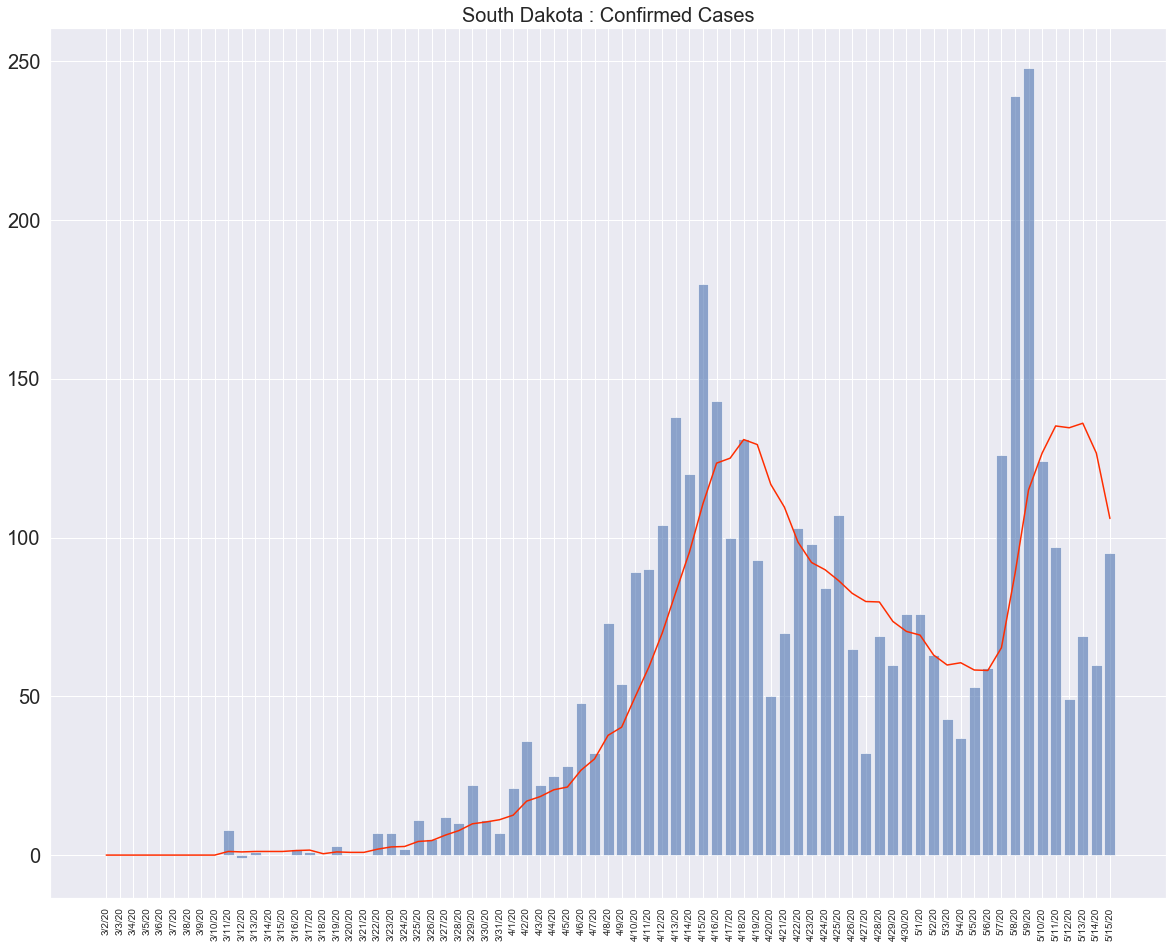

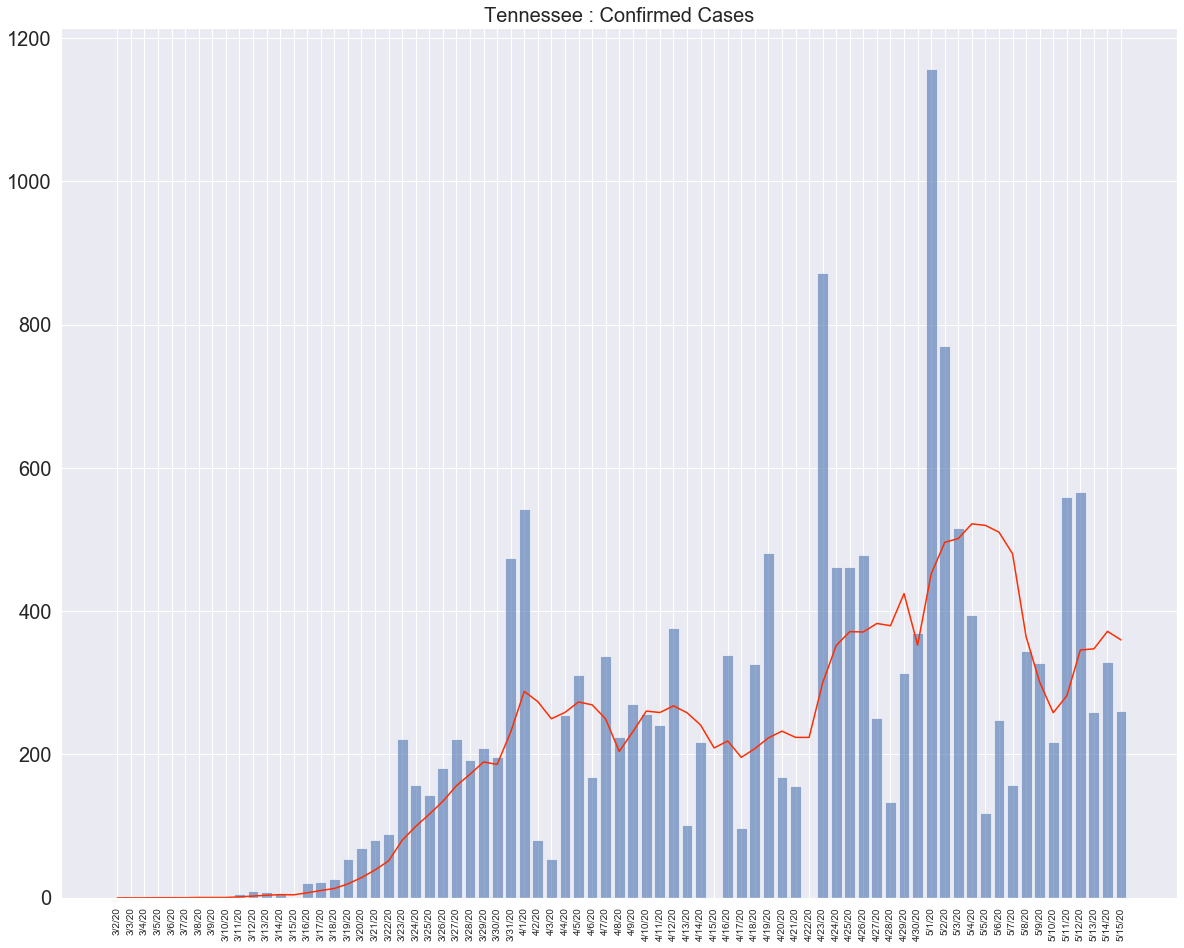

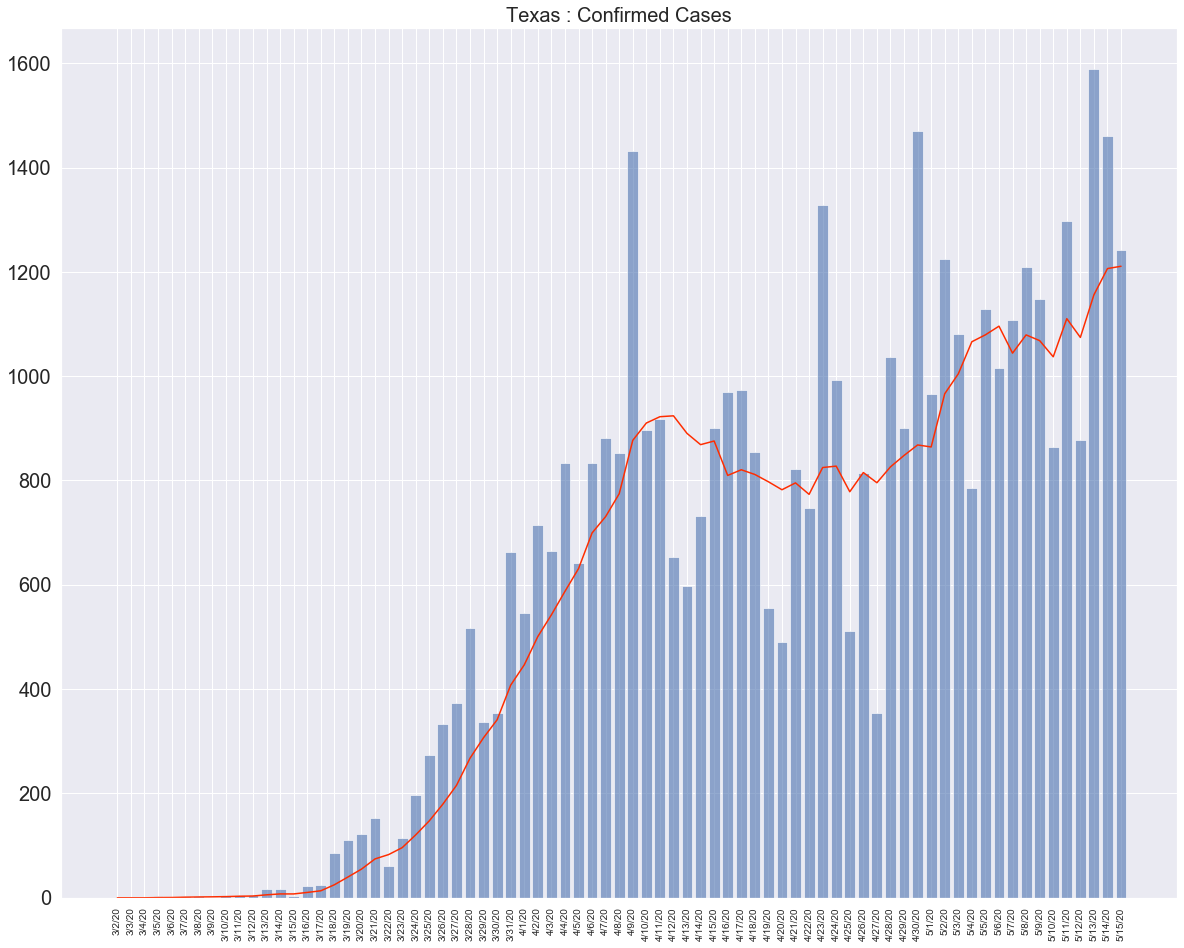

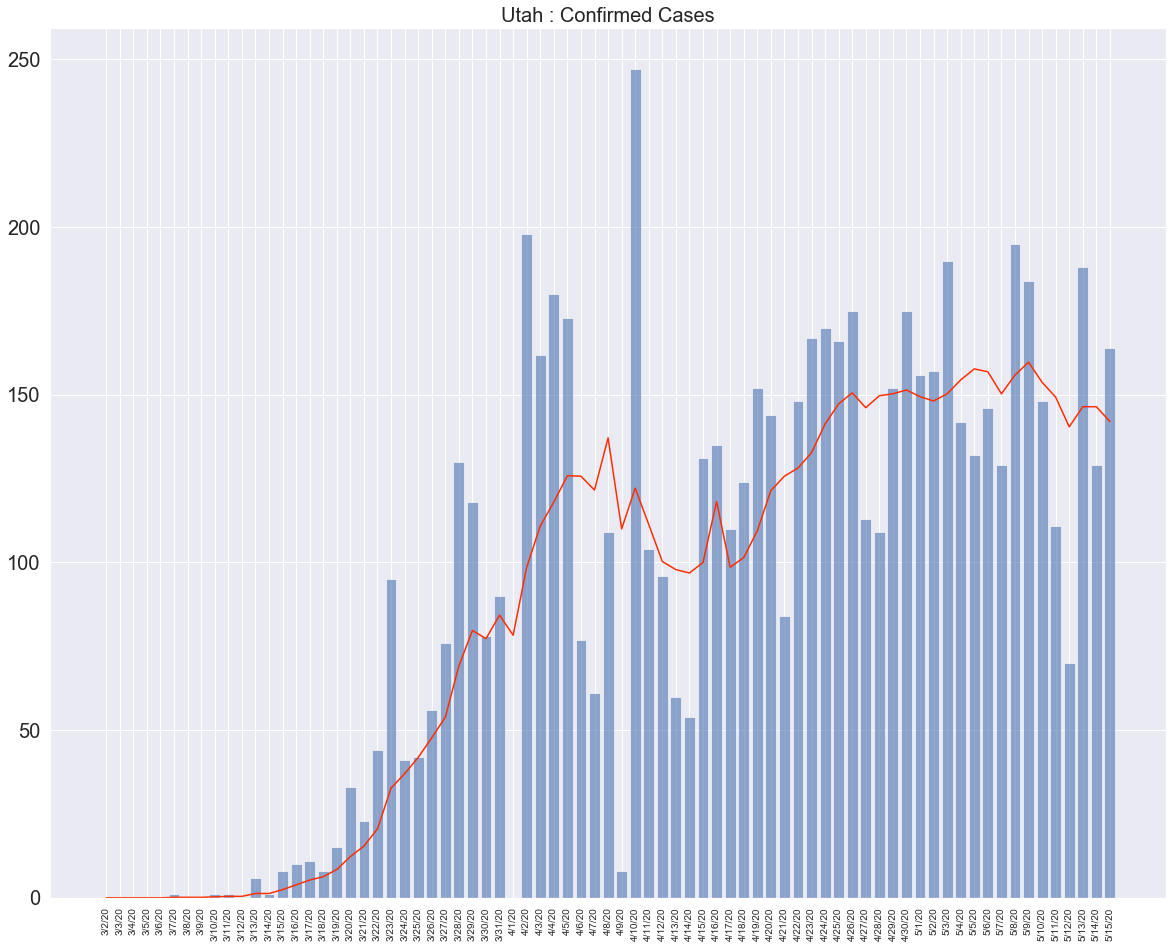

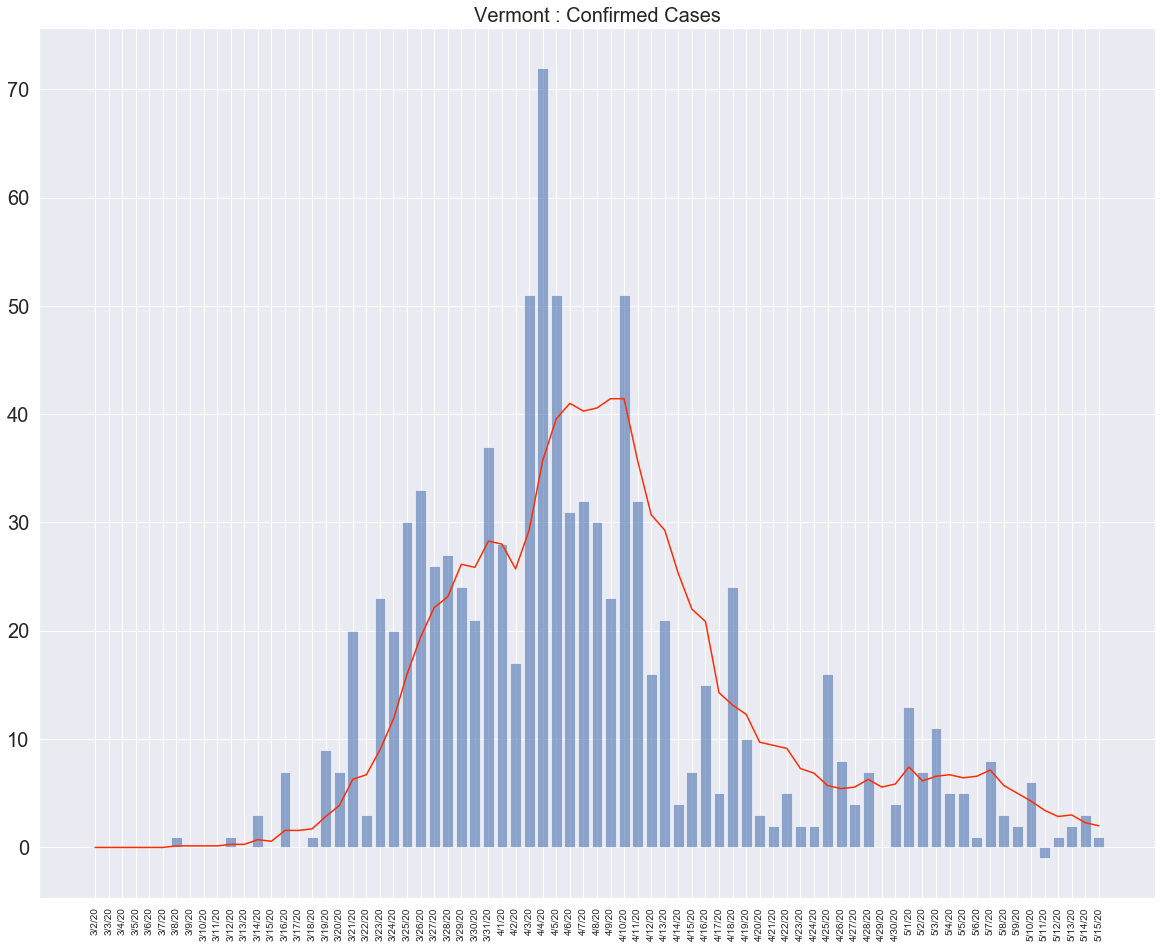

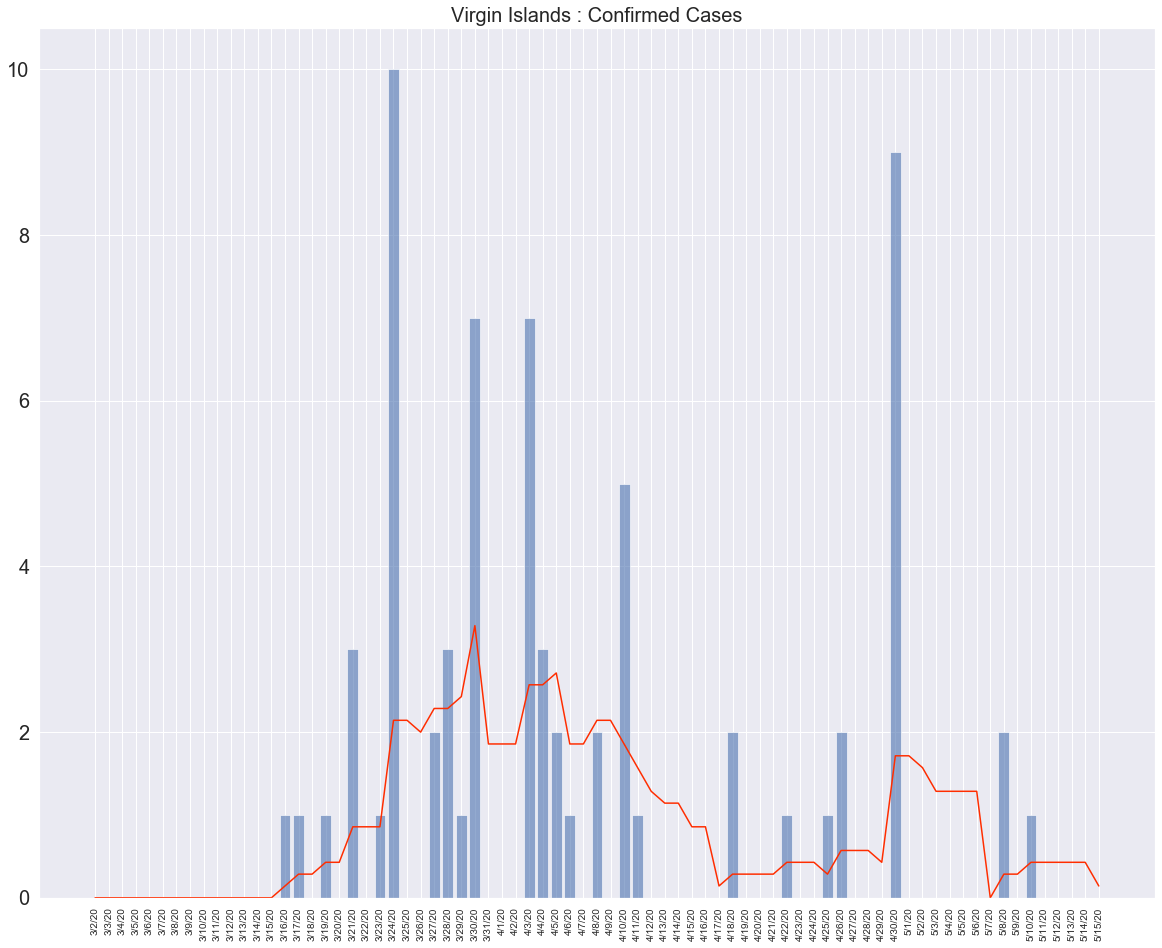

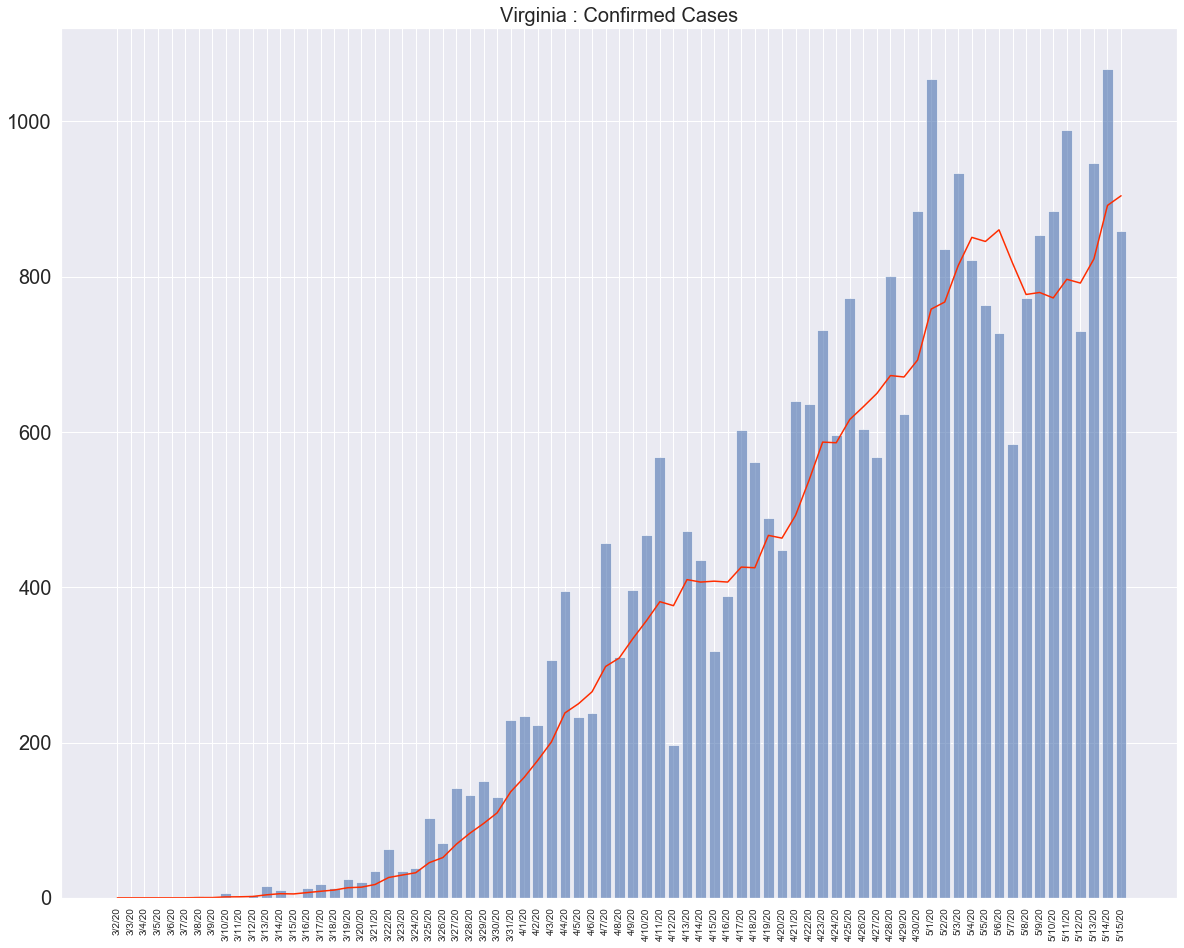

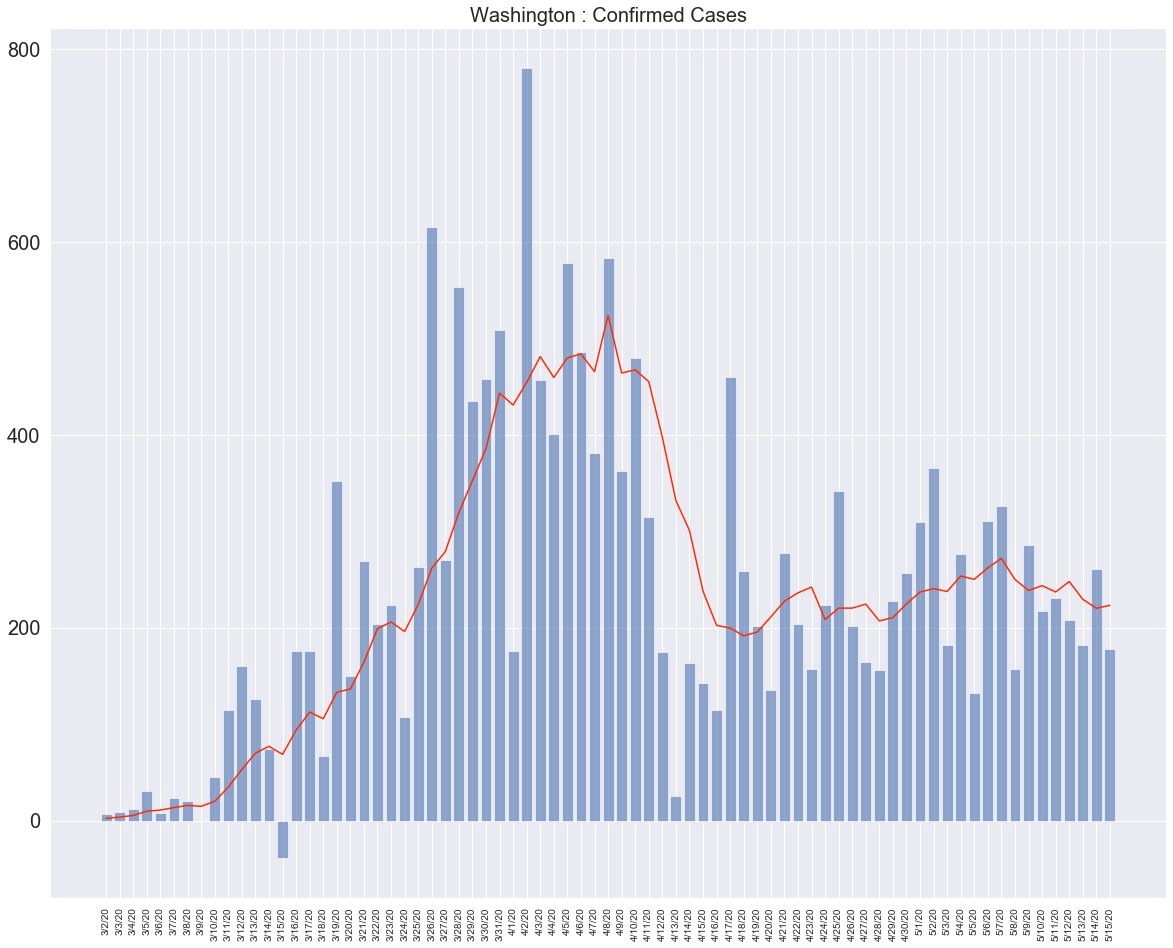

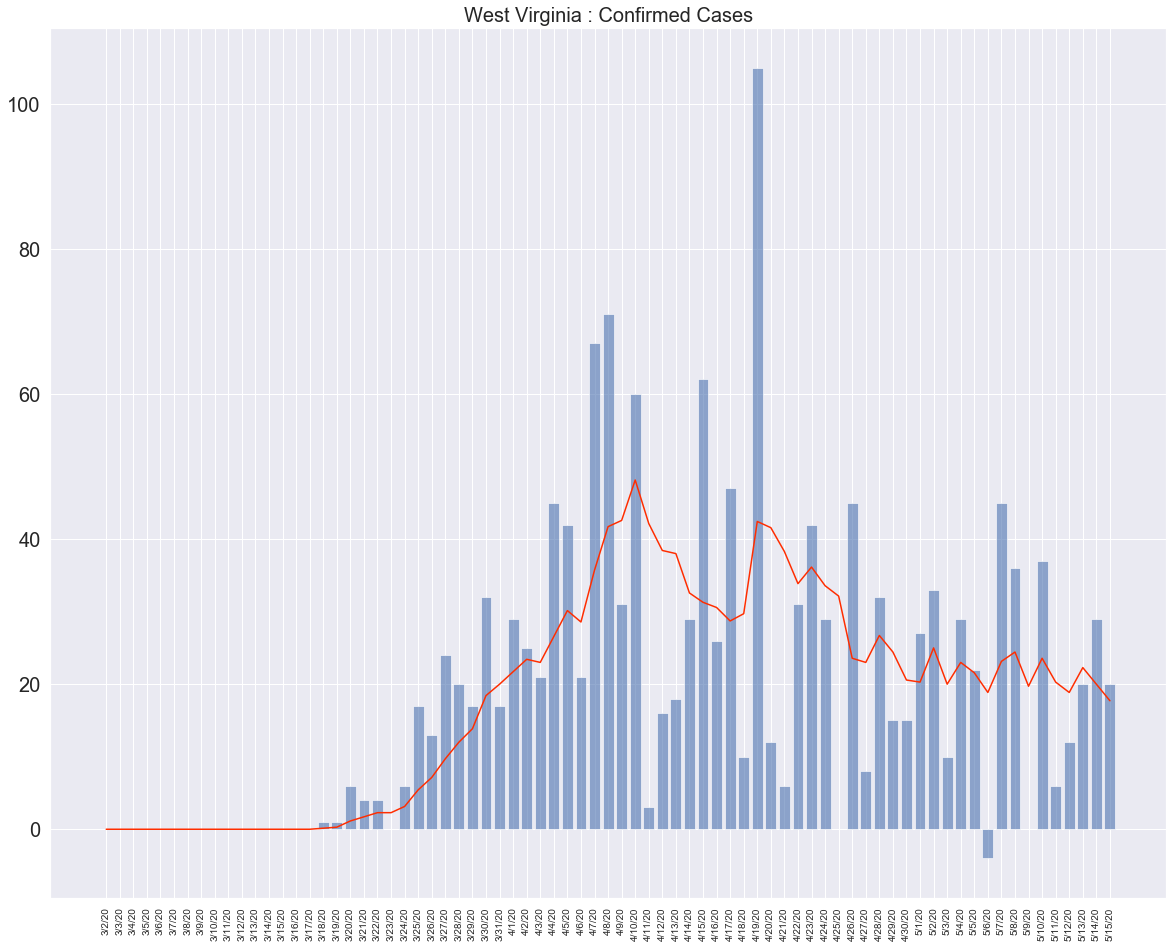

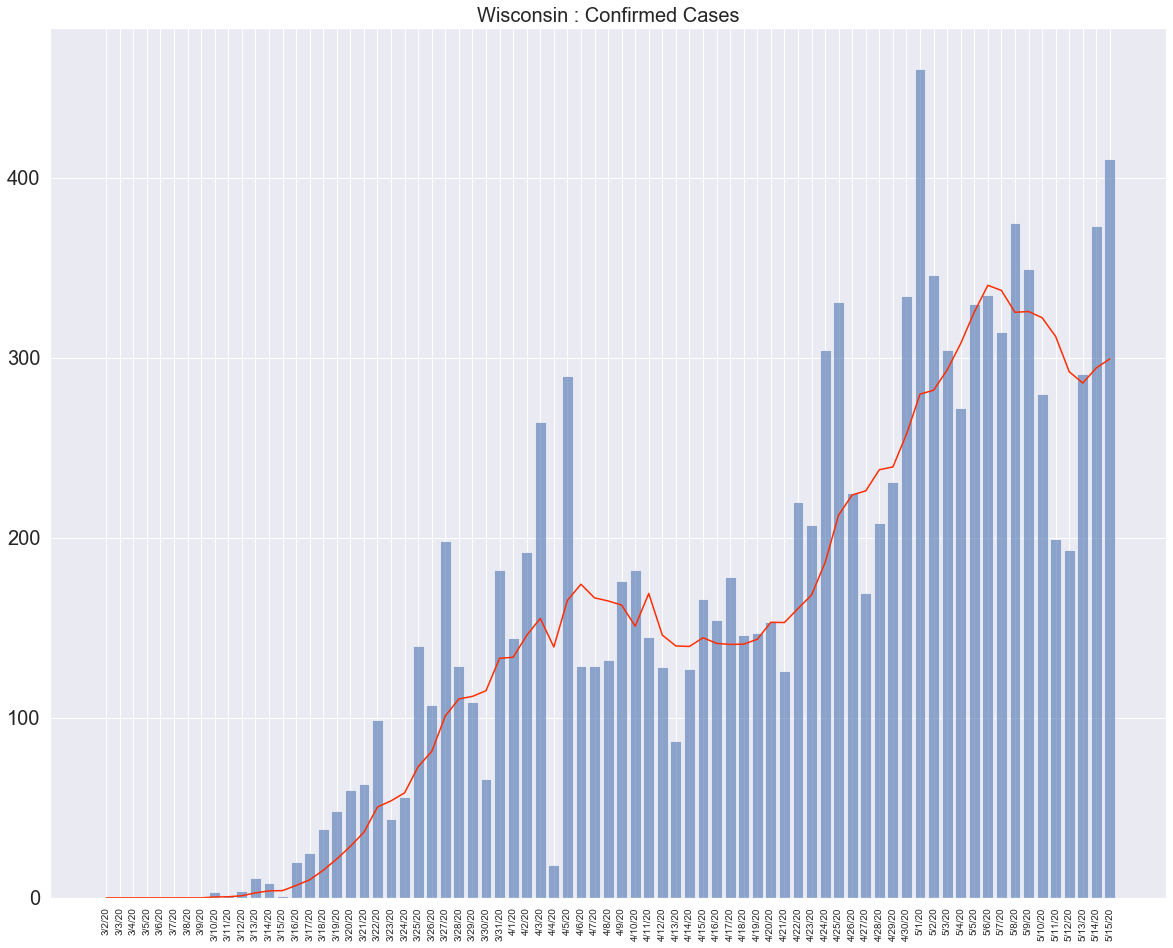

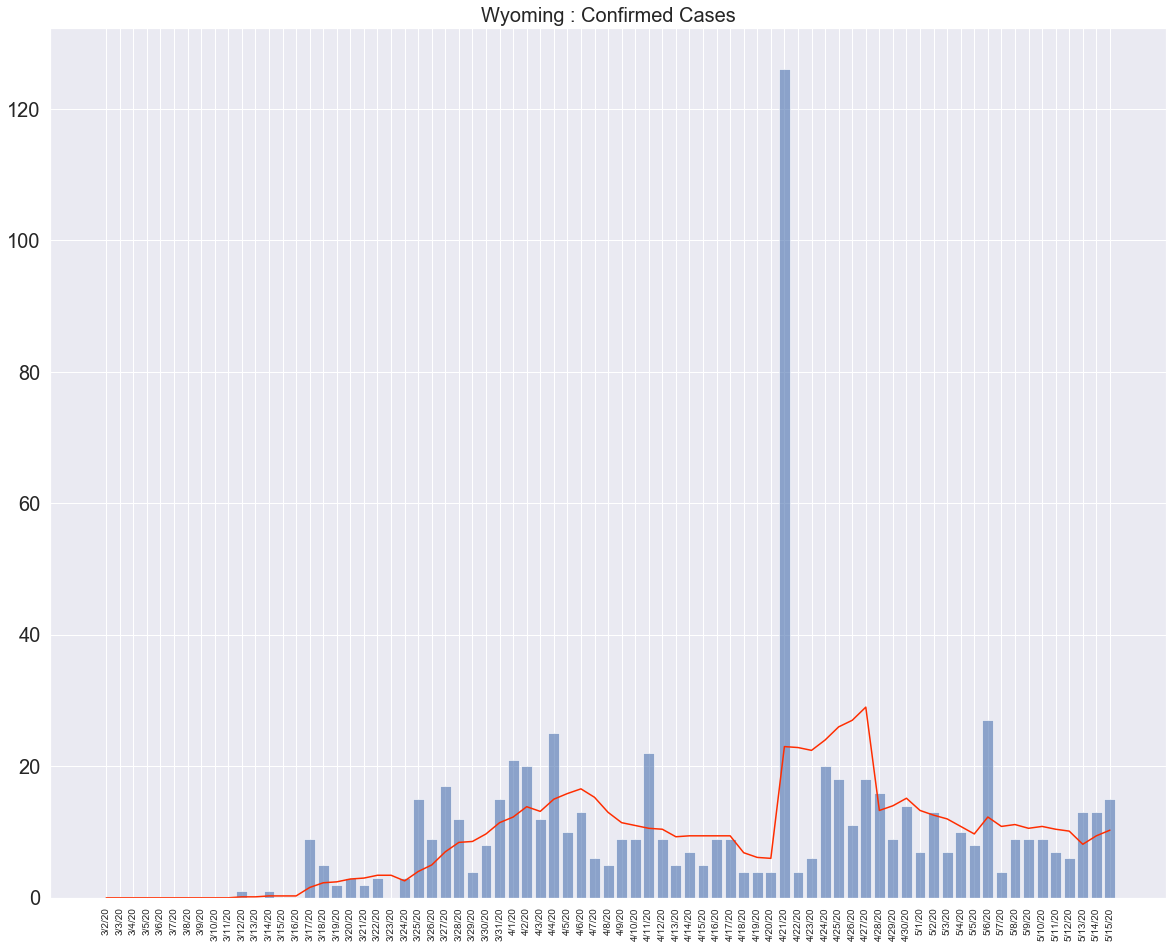

In [52]:
def counts_chart(counts, rolling_avg, dates, label):
    '''Plot distribution of new cases and the rolling average'''
    for index, row in counts.iterrows():
        
        # Isolate state
        state = row['Province_State']
        
        # Plot: Distribution of Counts of new cases per day
        plt.figure(figsize=(20,16))
        plt.bar(dates, row[dates], alpha=0.6)
        plt.title(state + ' : ' + label, fontsize=20)
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=20)
        
        # Plot: Rolling Average
        plt.plot(dates, rolling_avg.loc[index, dates], c='#FF2D00', alpha=1.0)
        plt.show()
        
counts_chart(daily_counts_confirmed, rolling_avg_confirmed, dates[40:], 'Confirmed Cases')

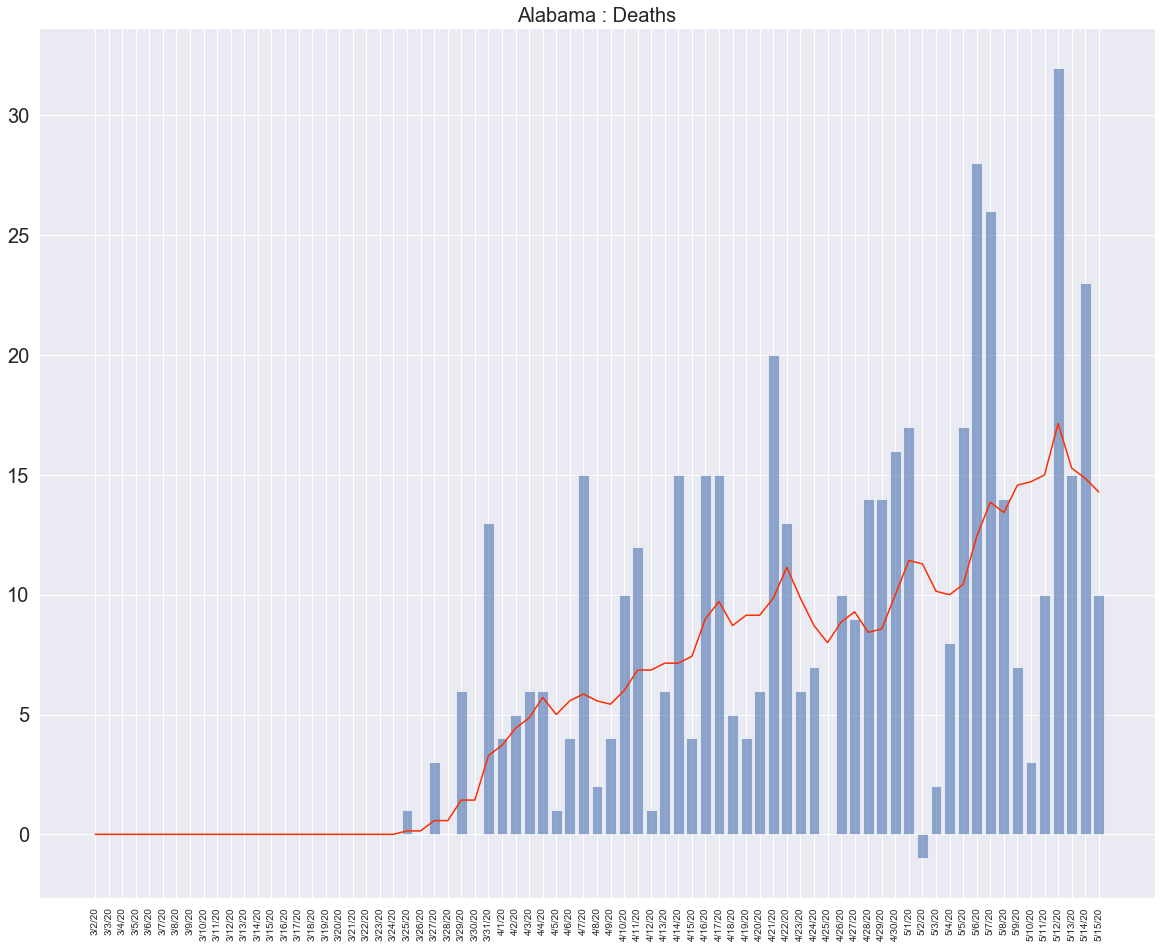

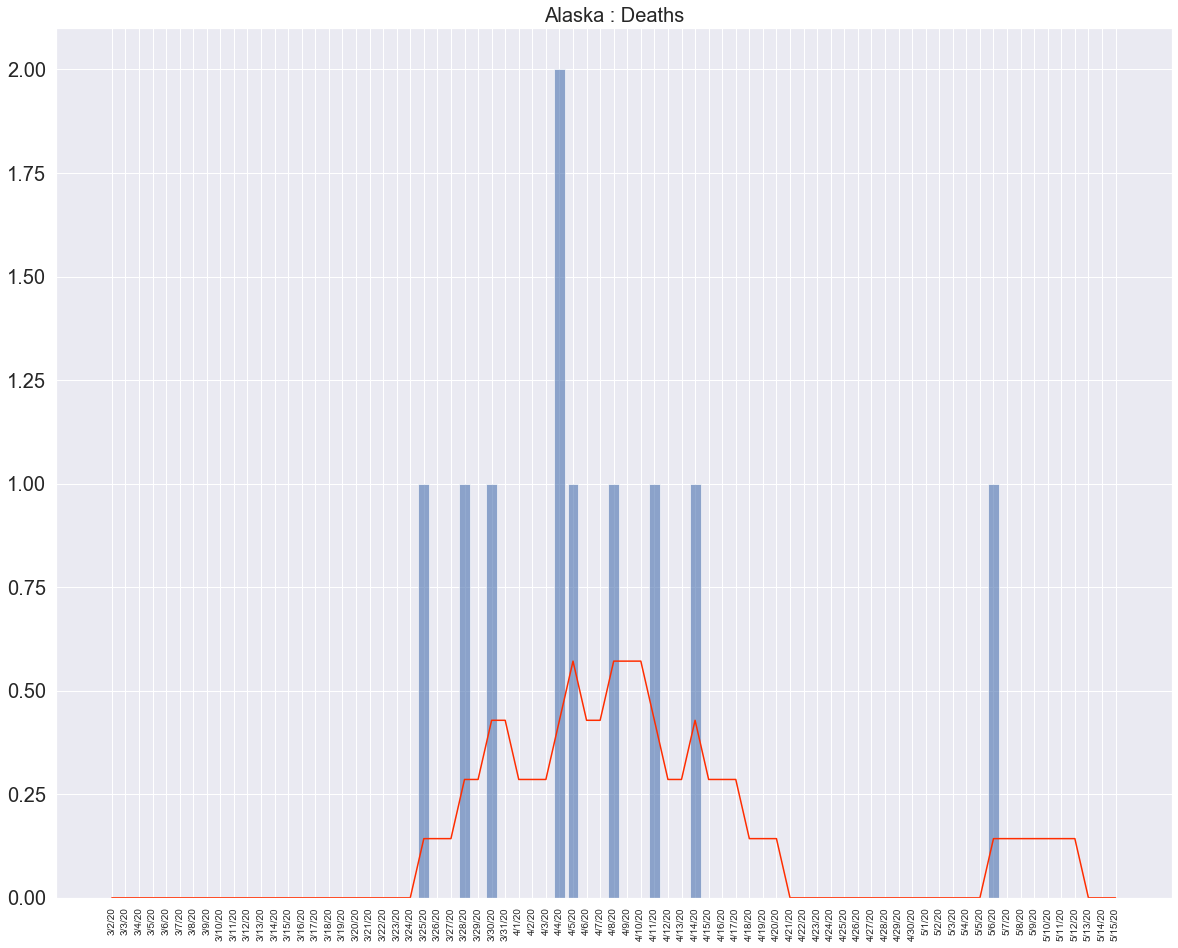

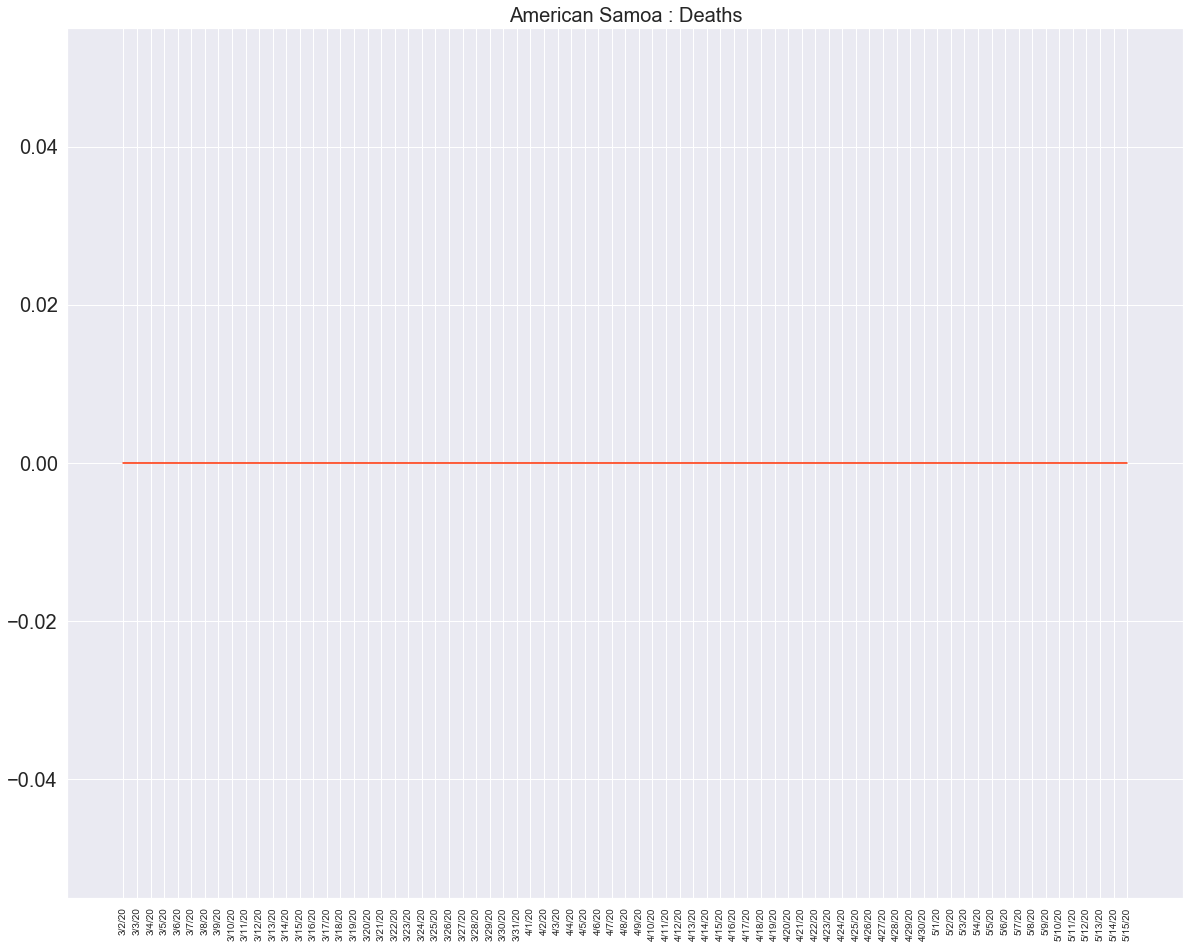

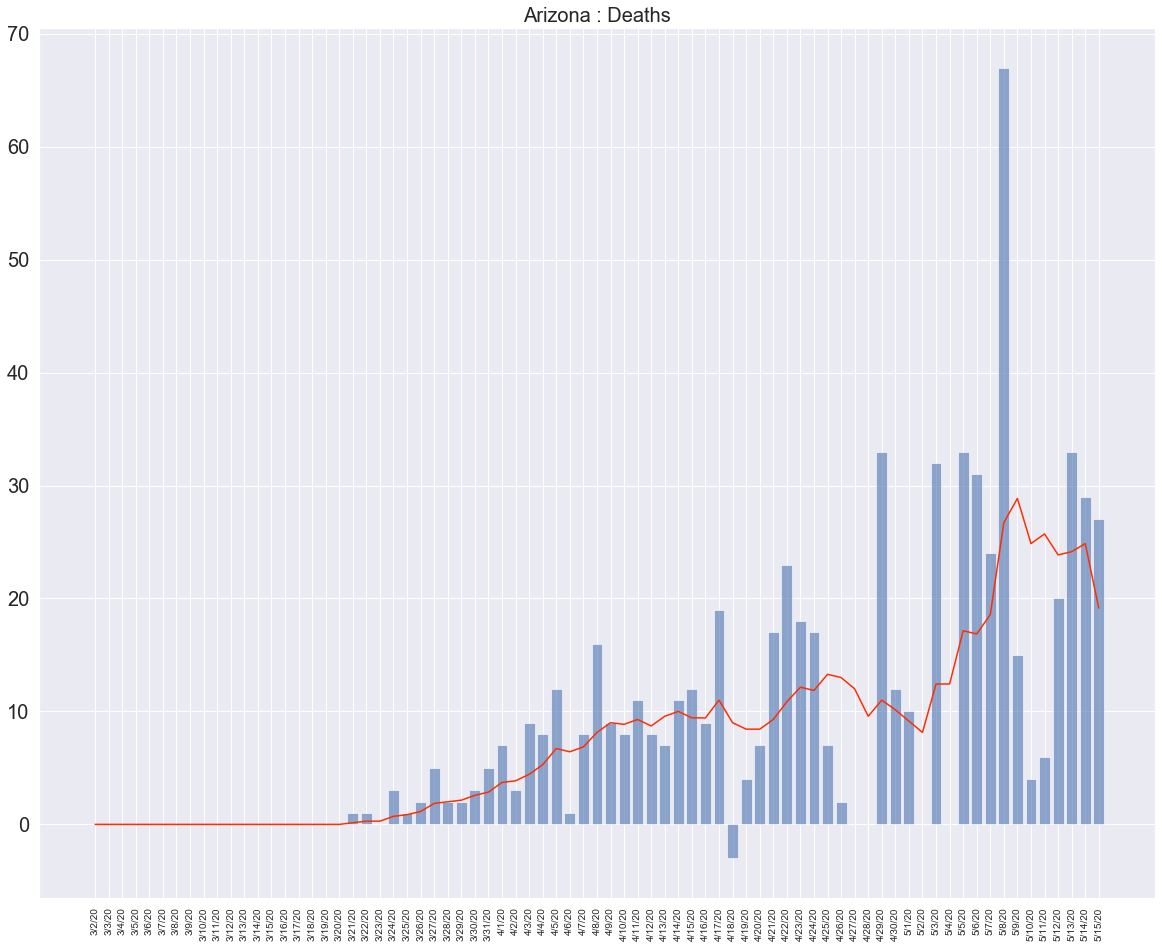

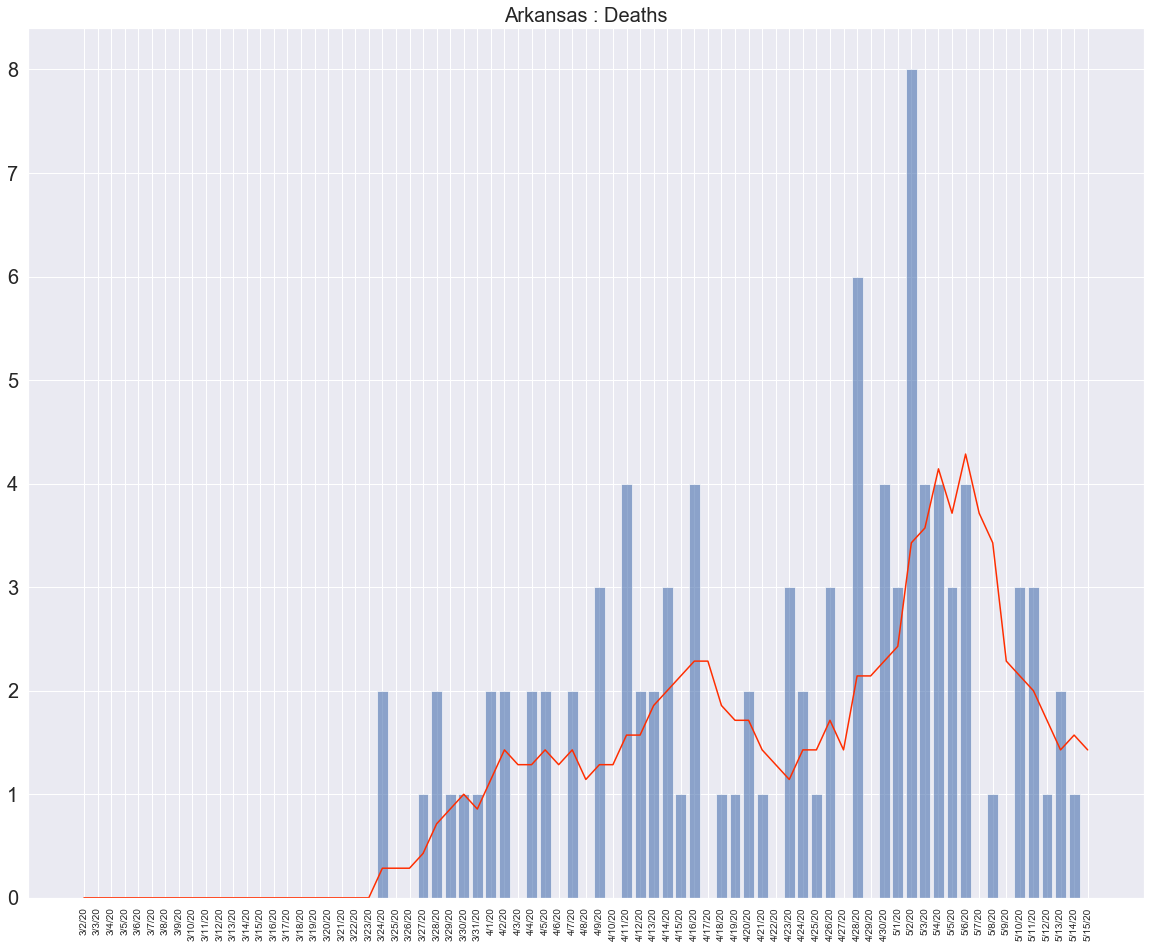

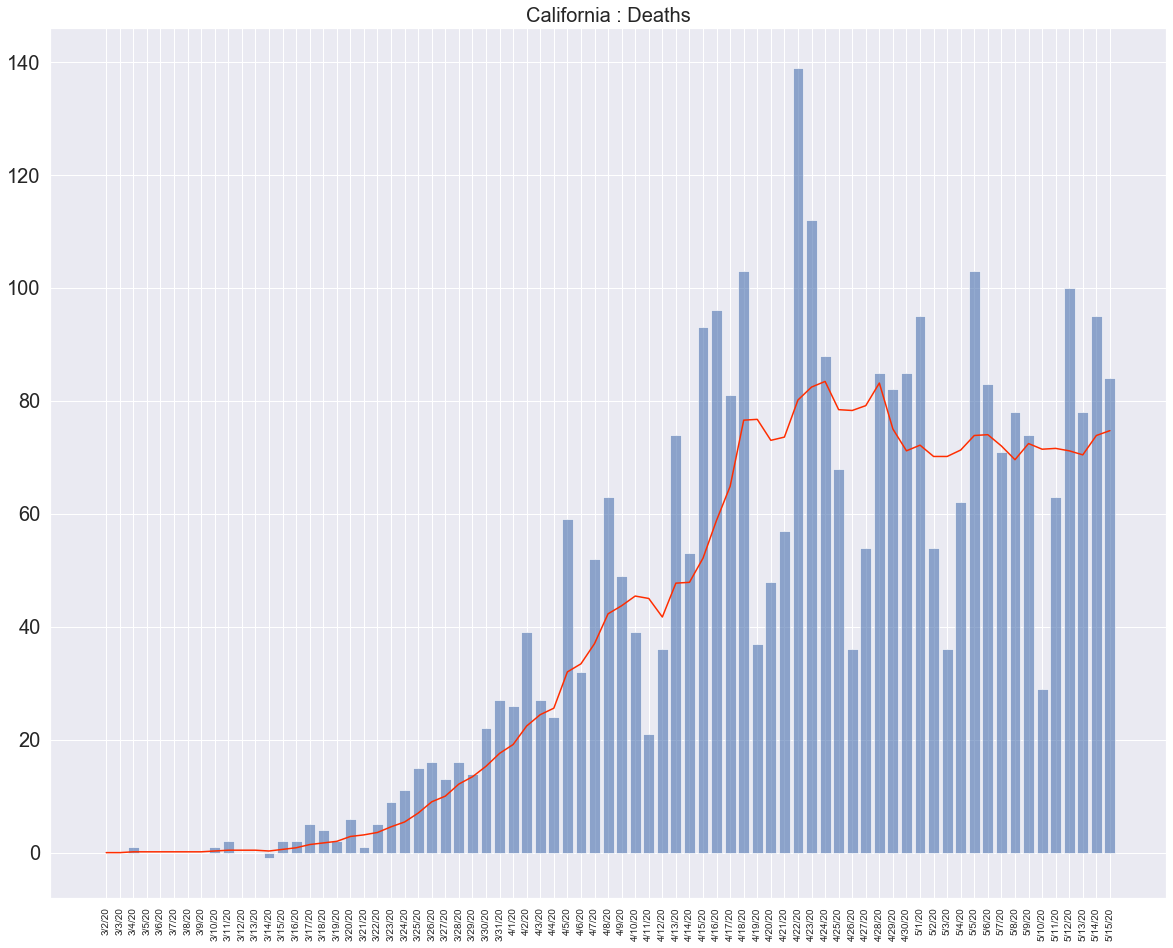

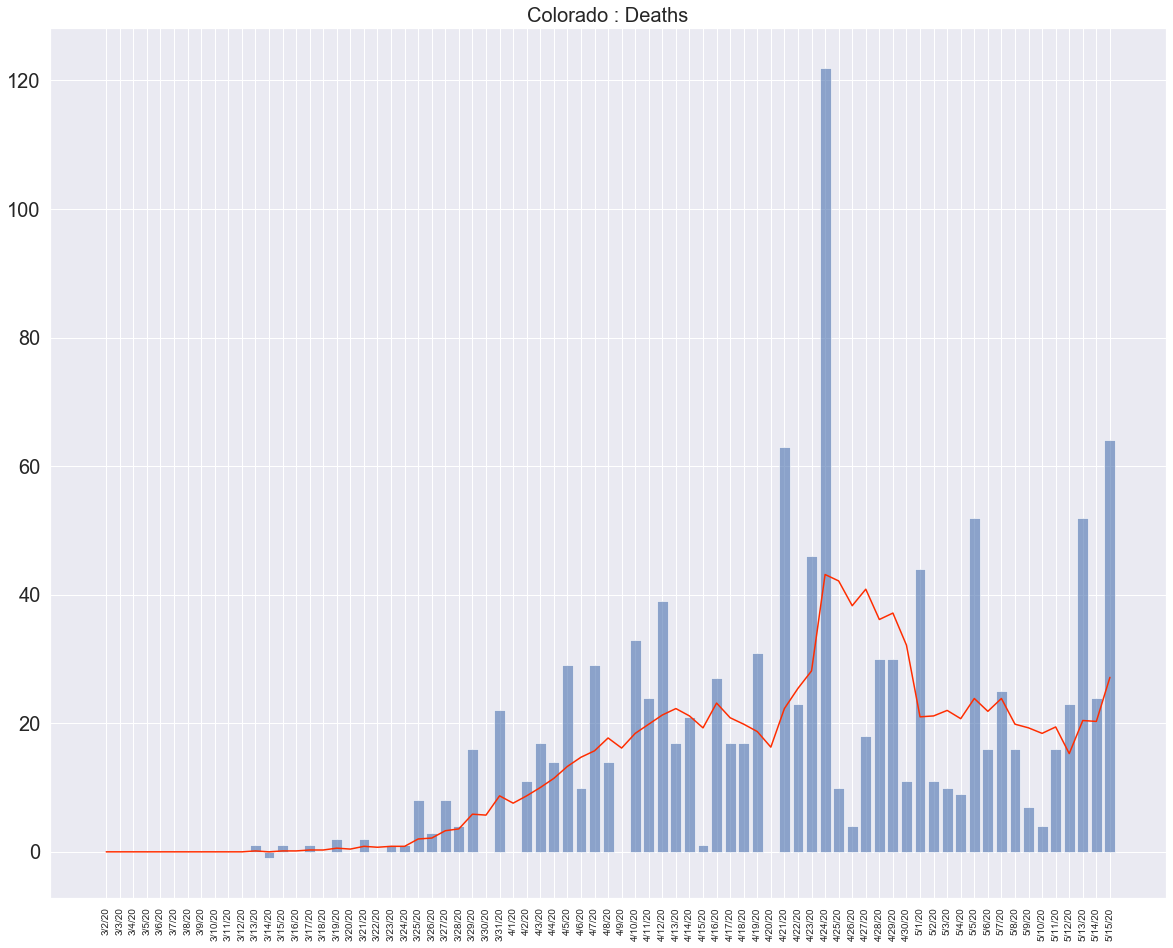

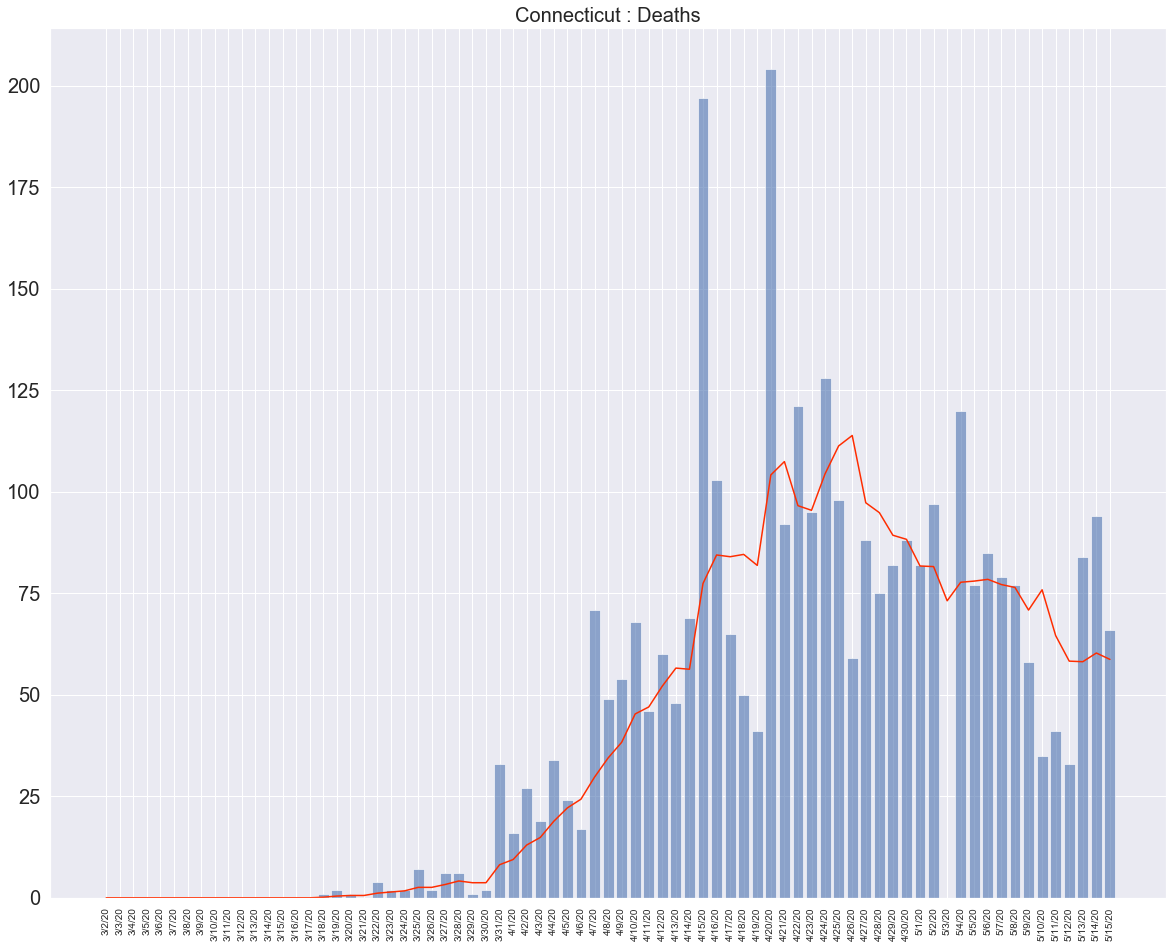

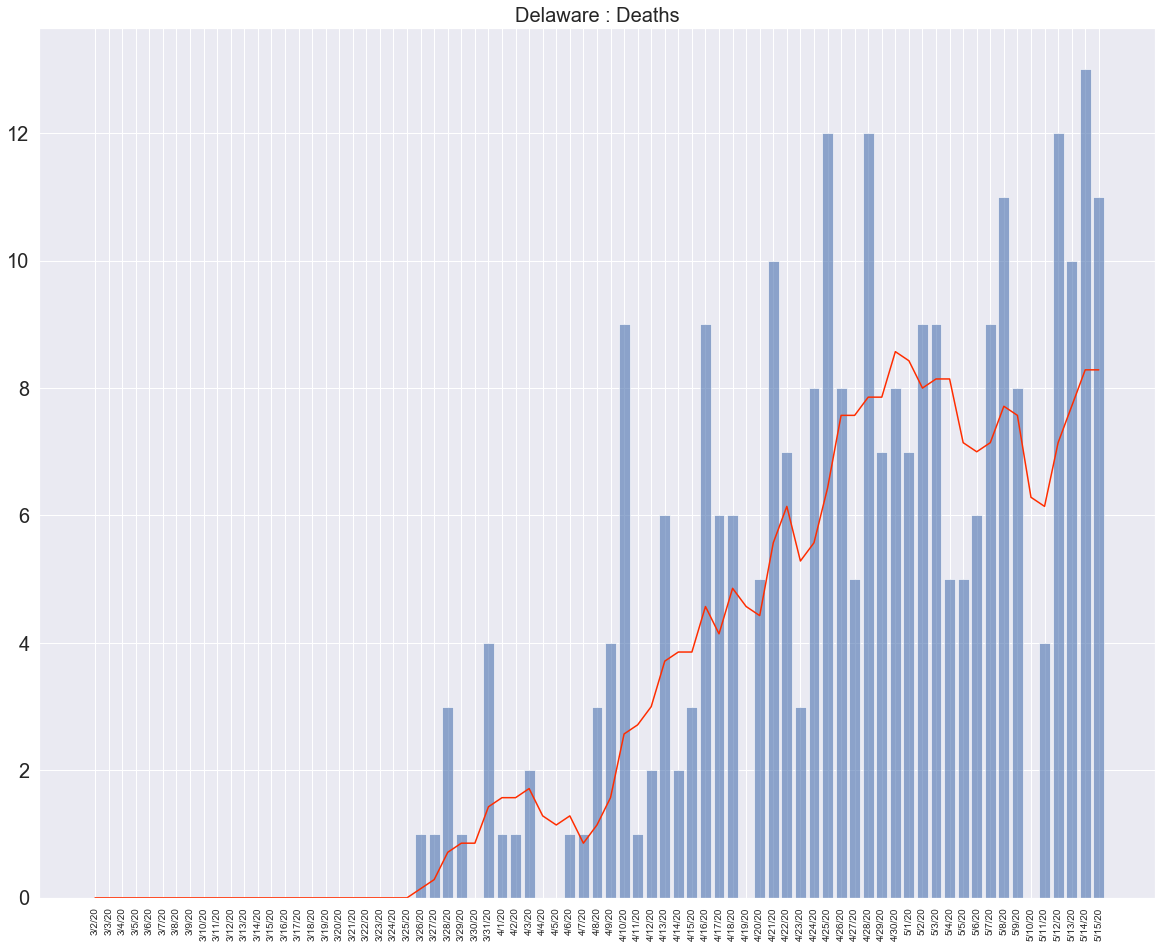

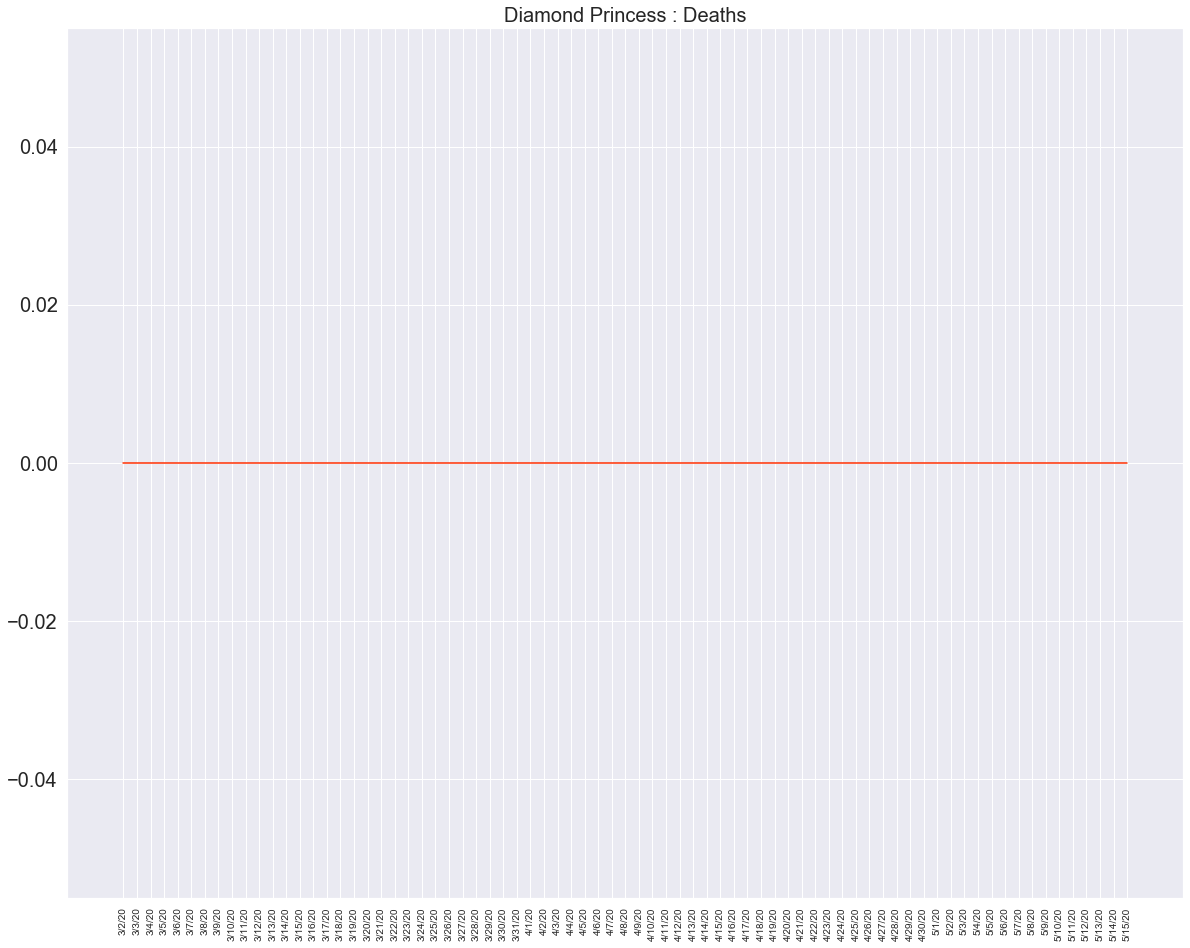

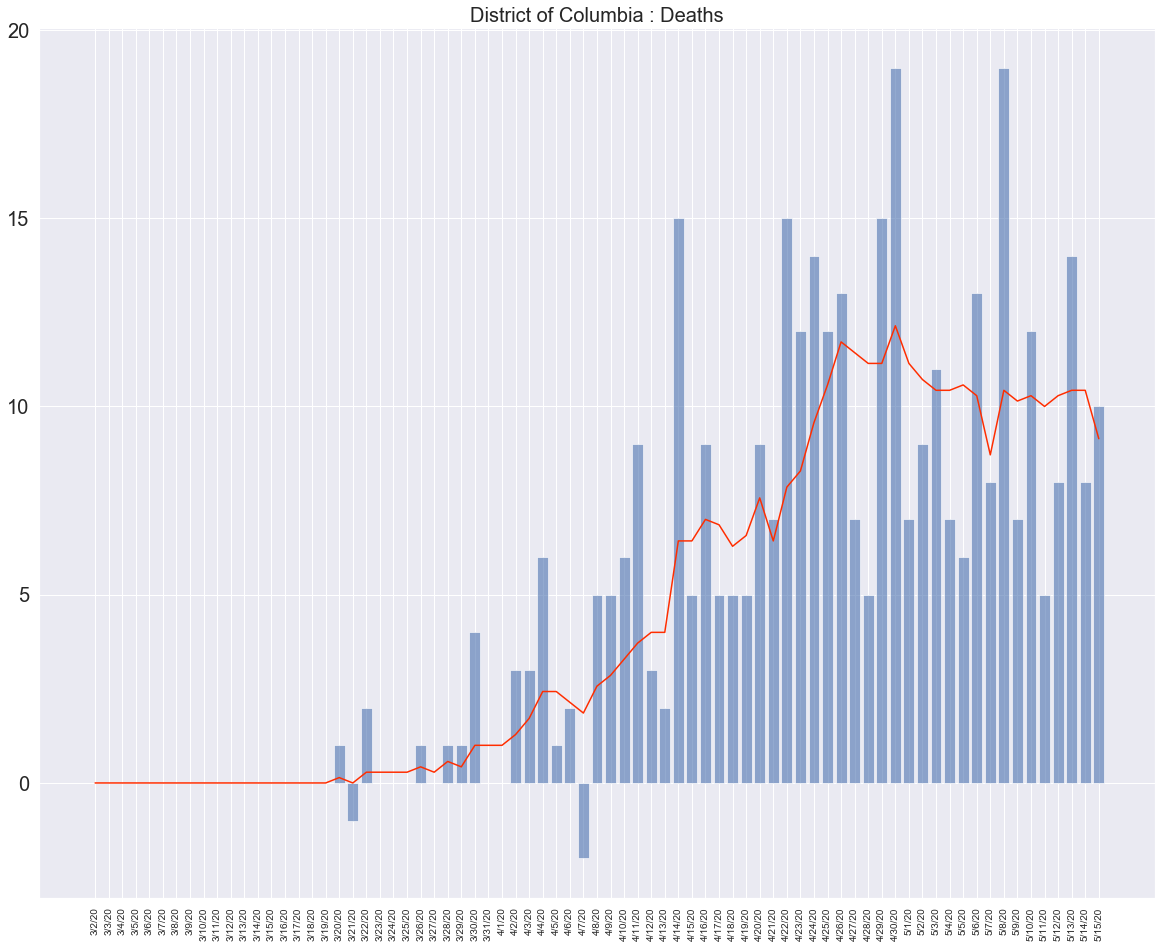

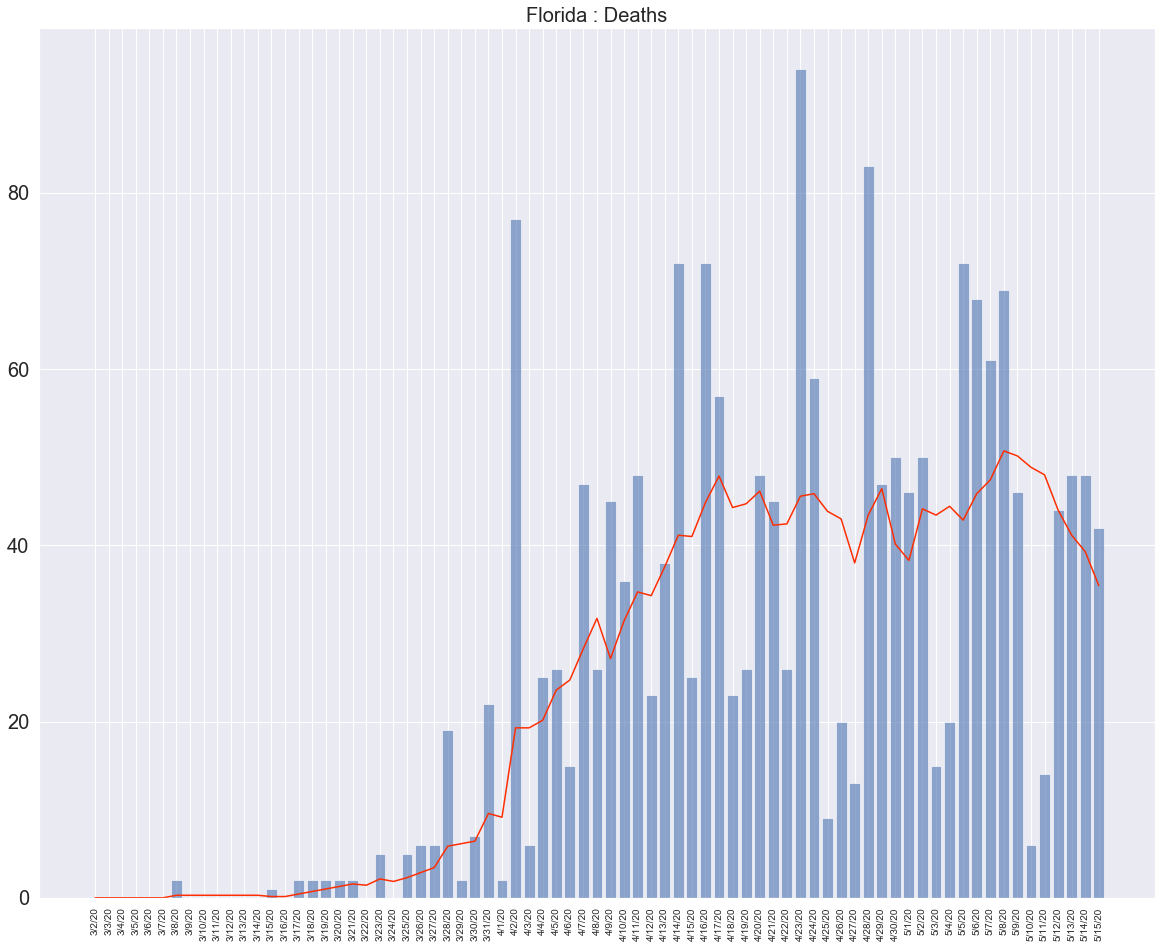

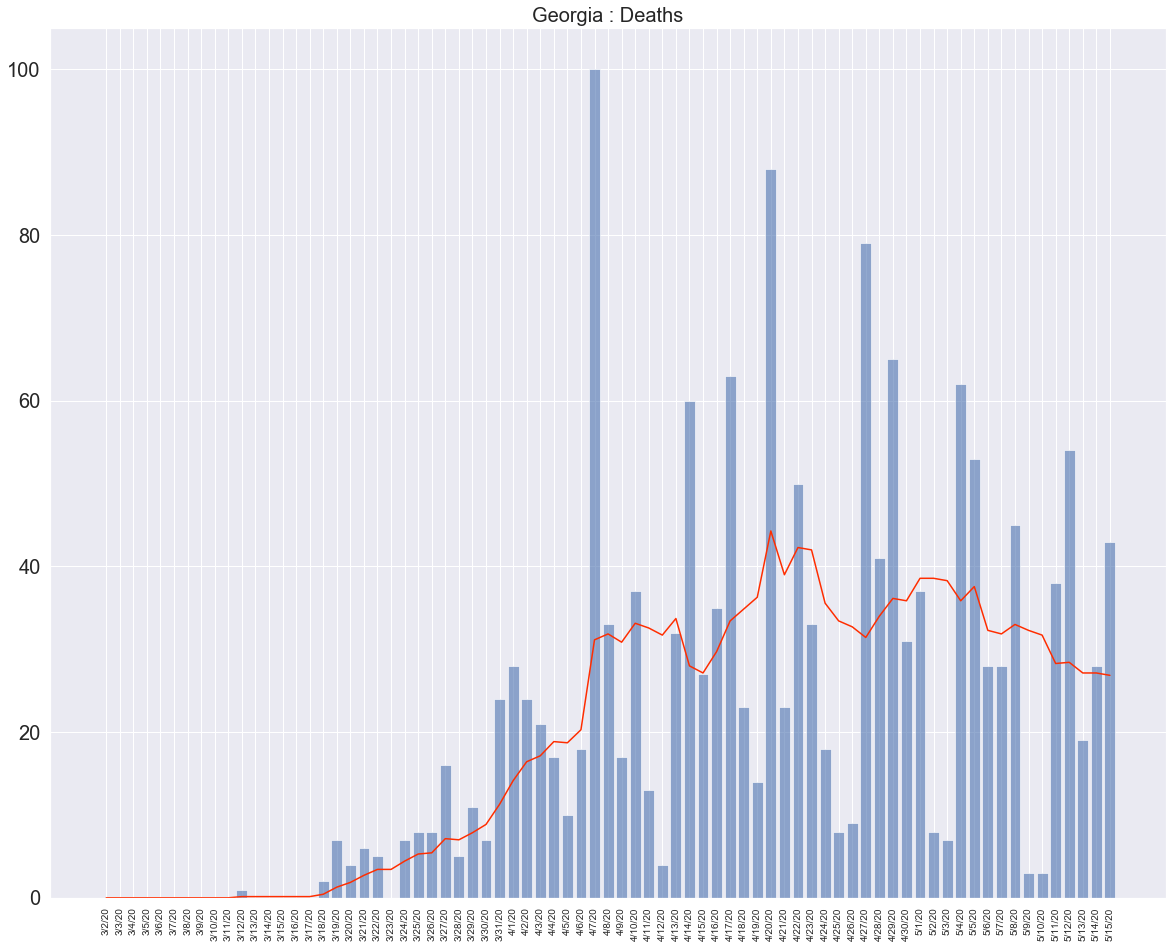

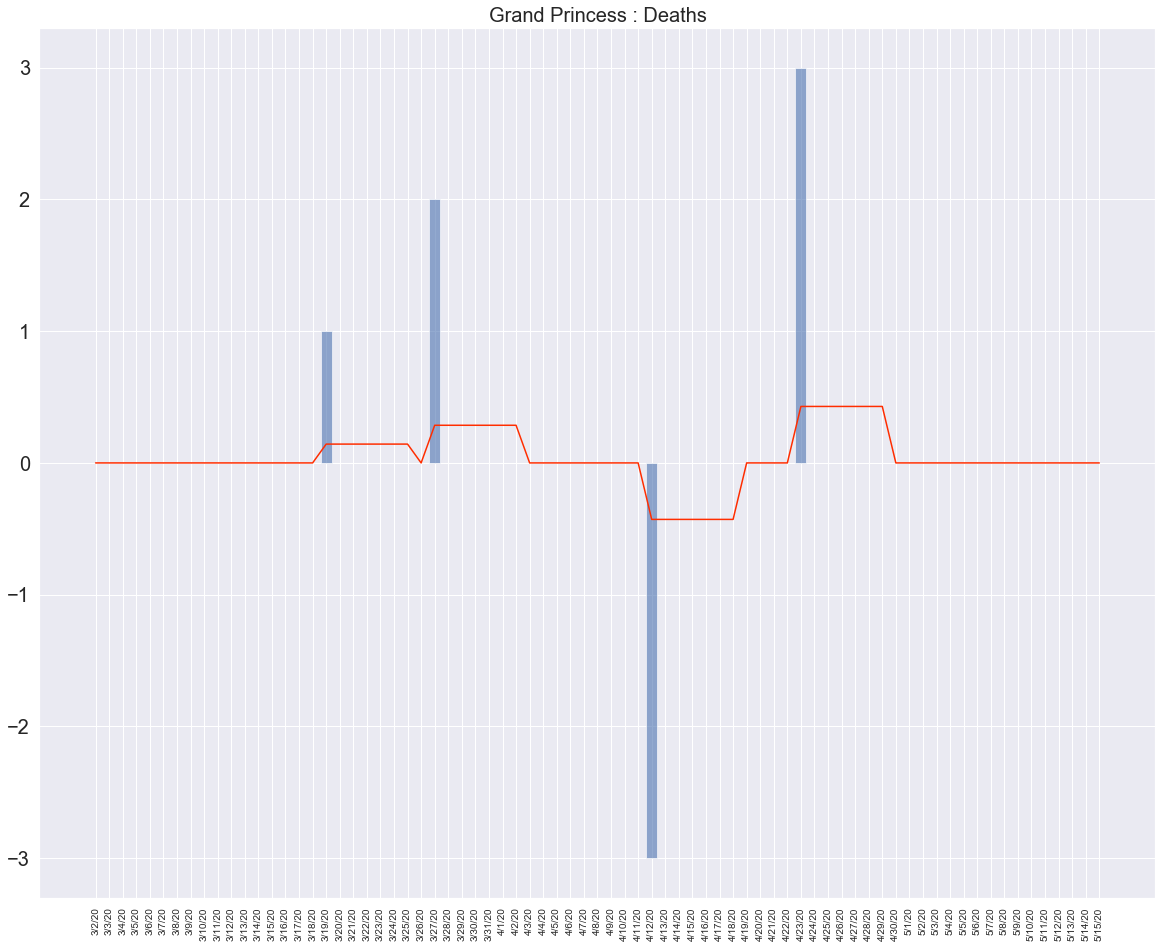

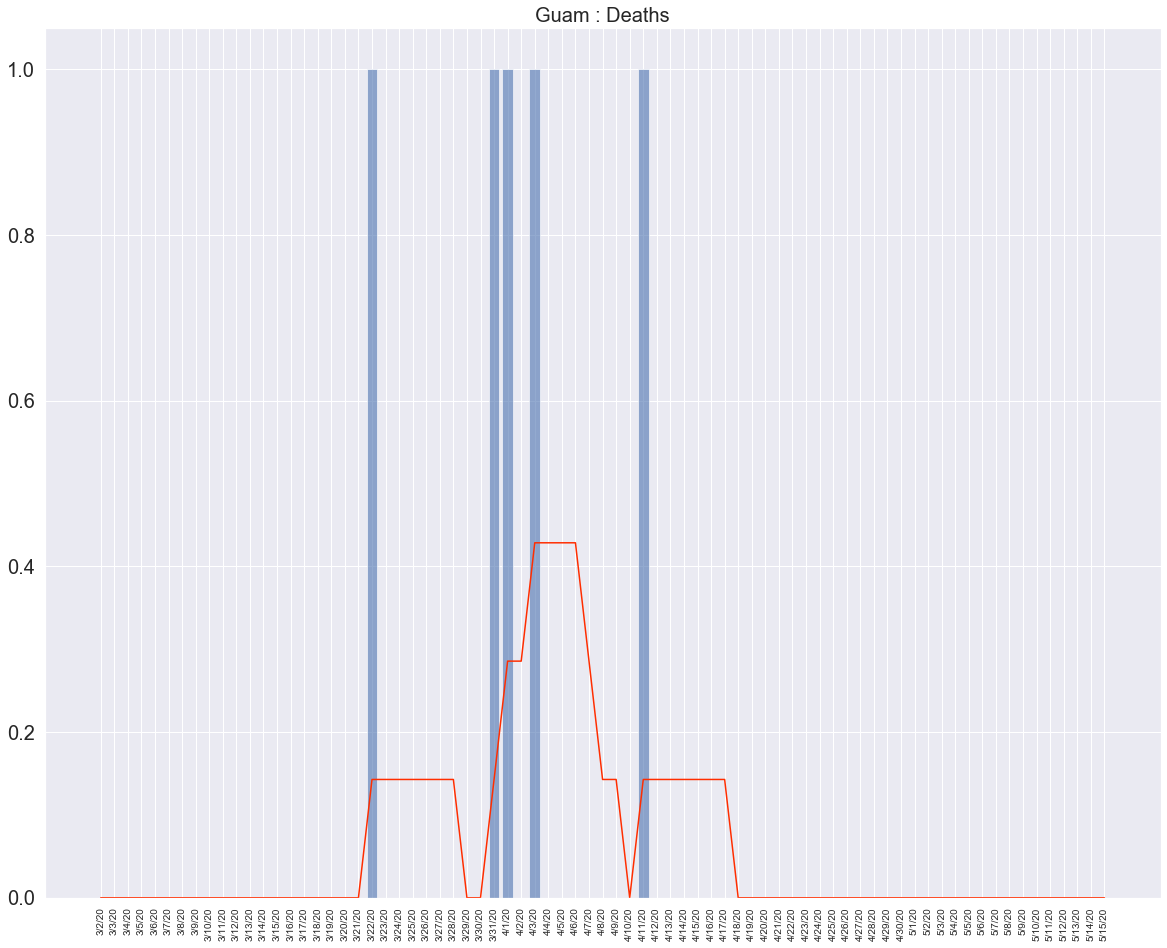

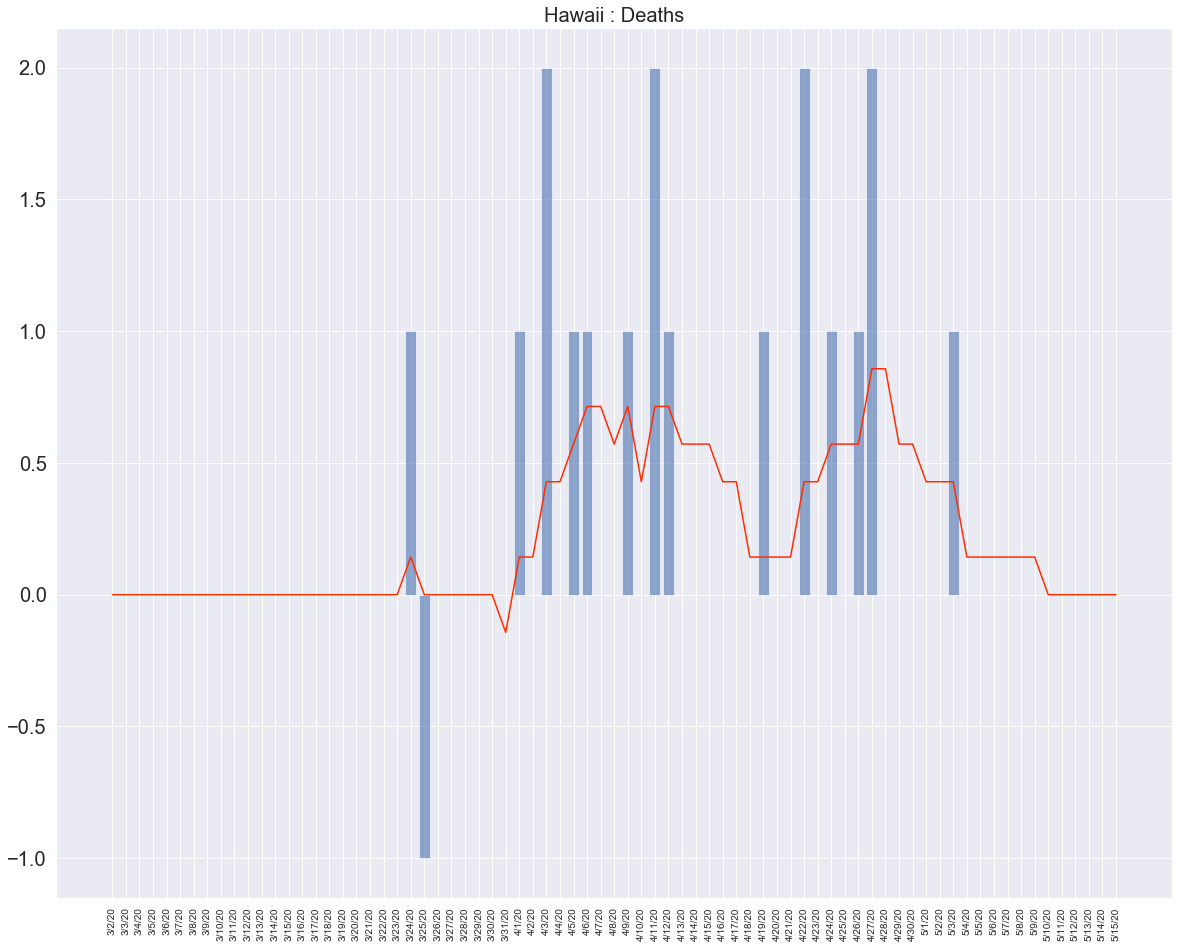

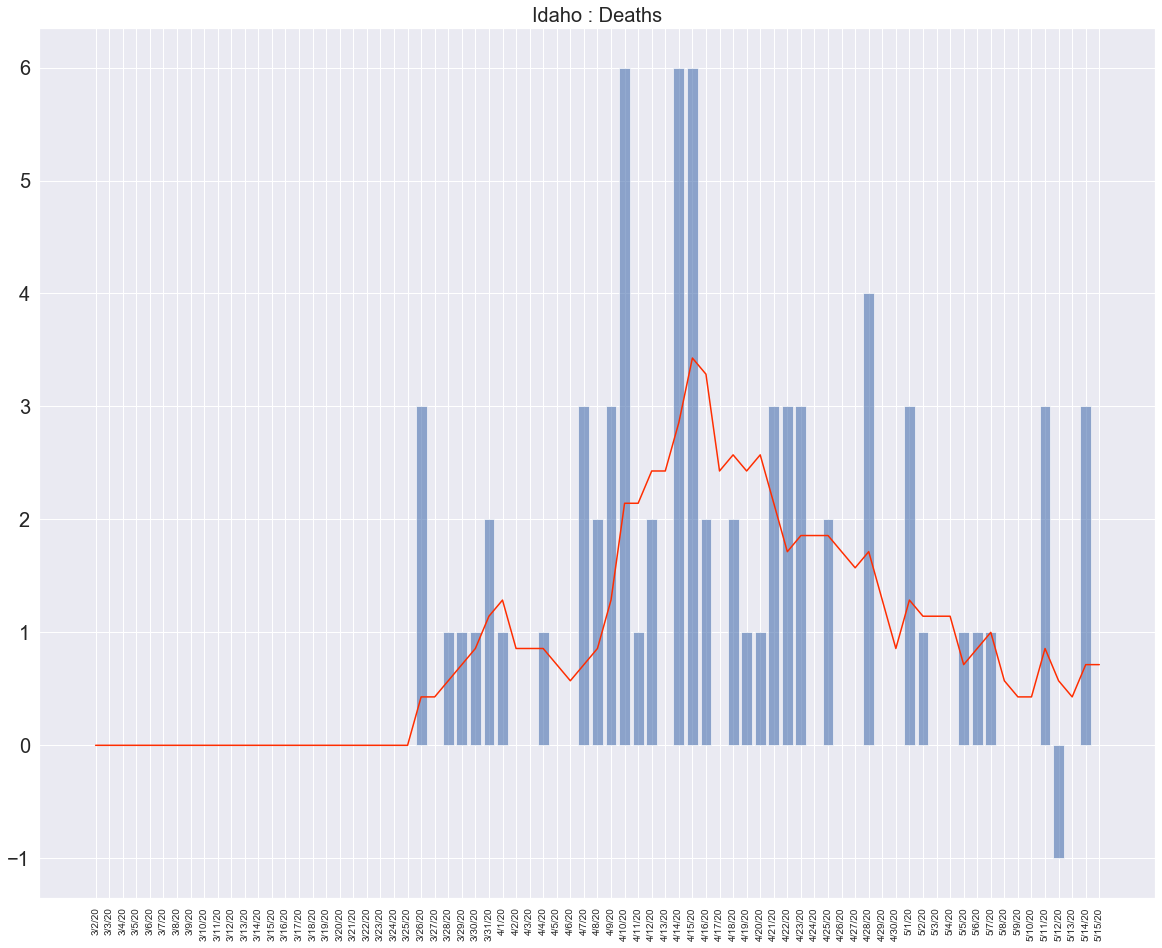

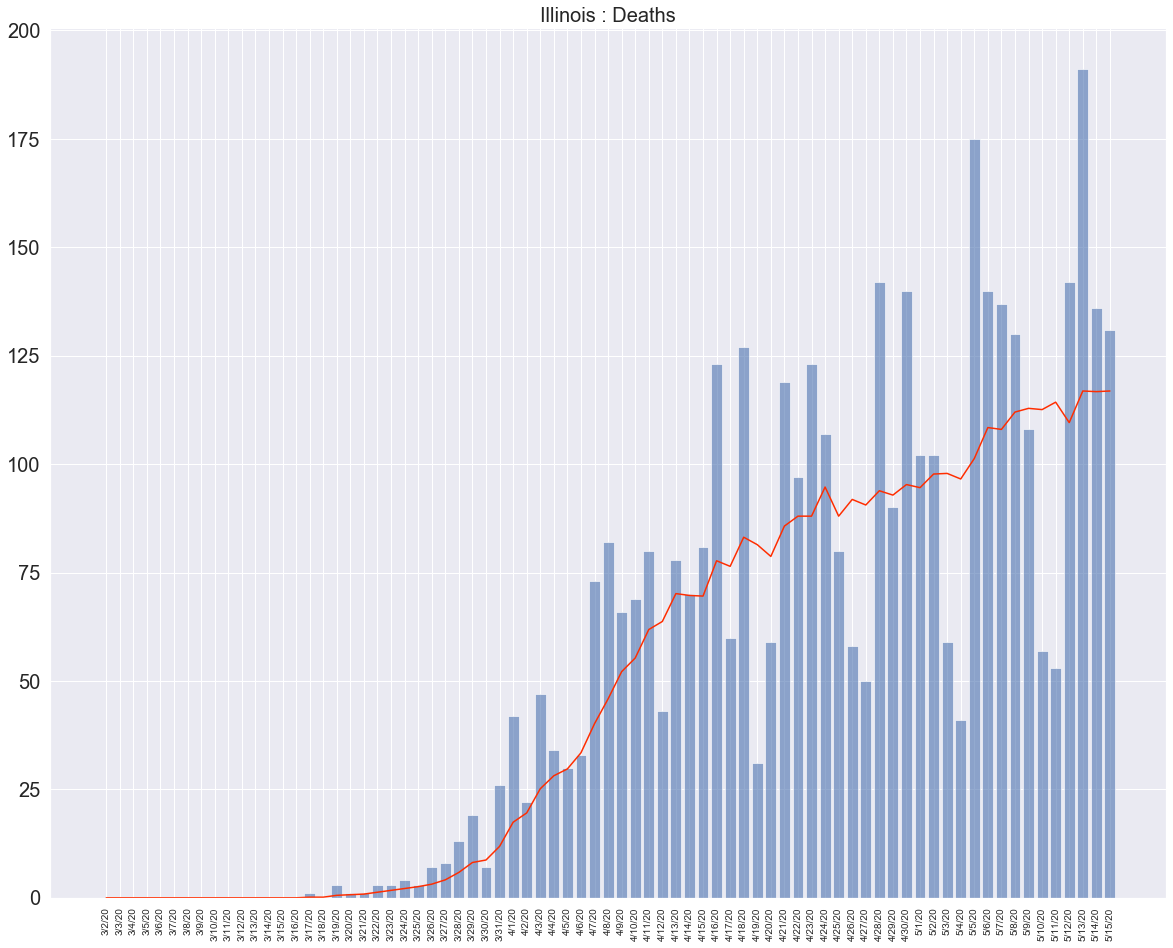

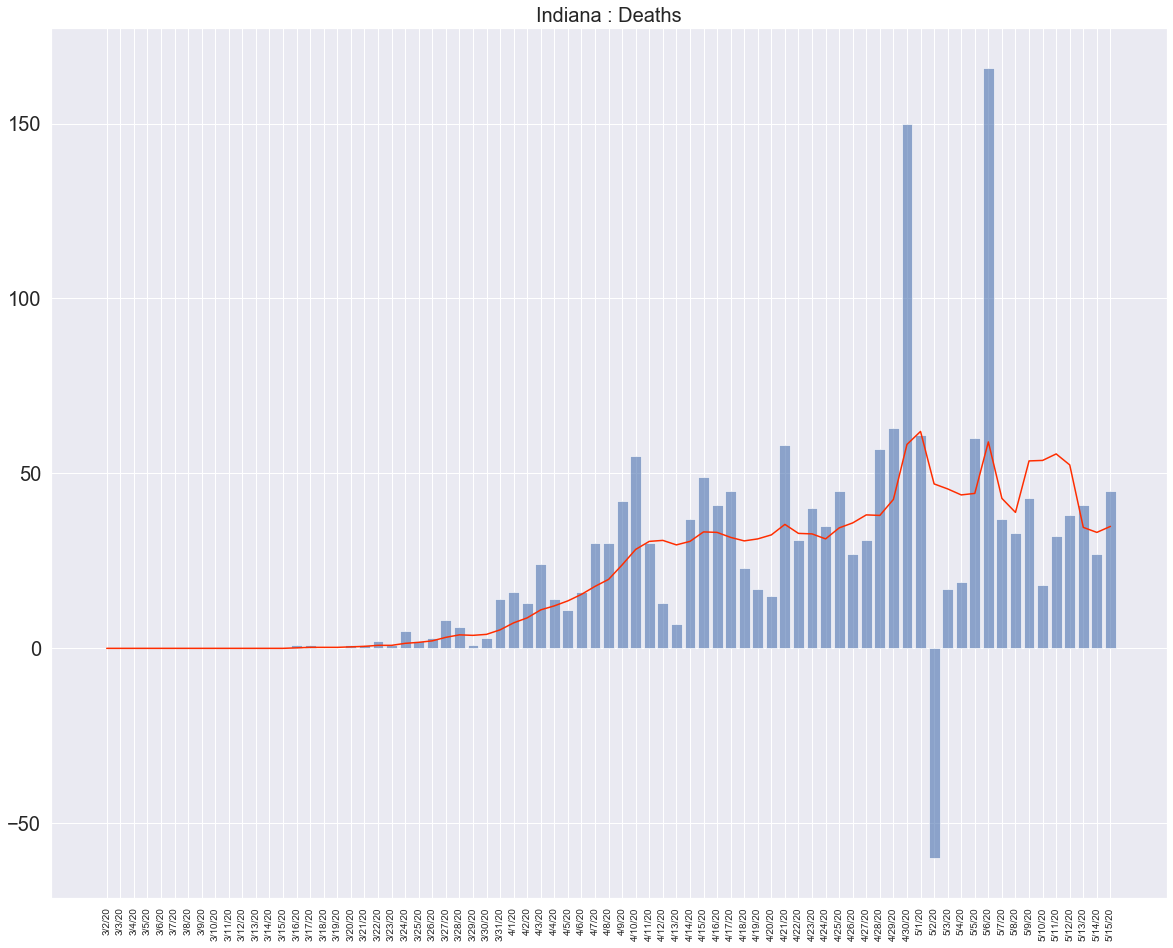

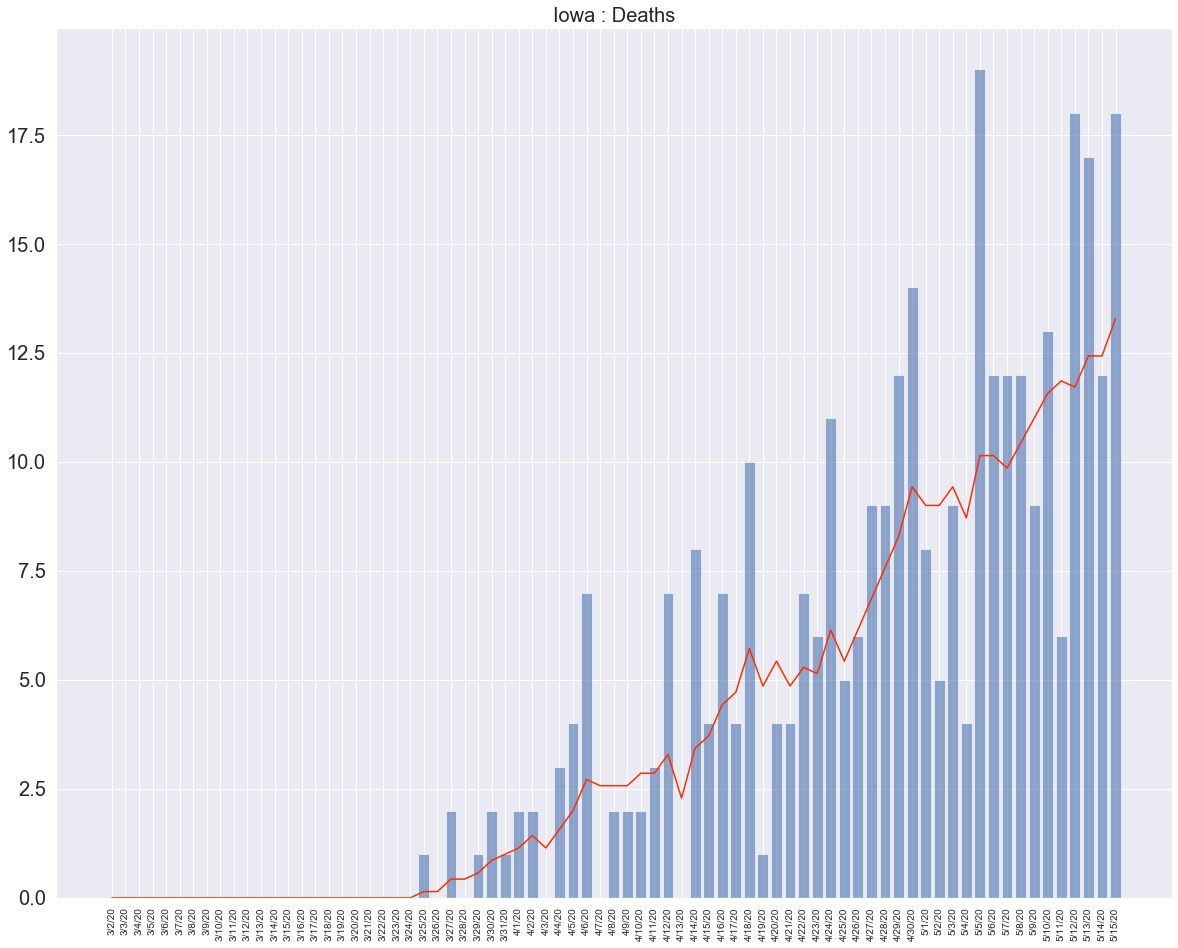

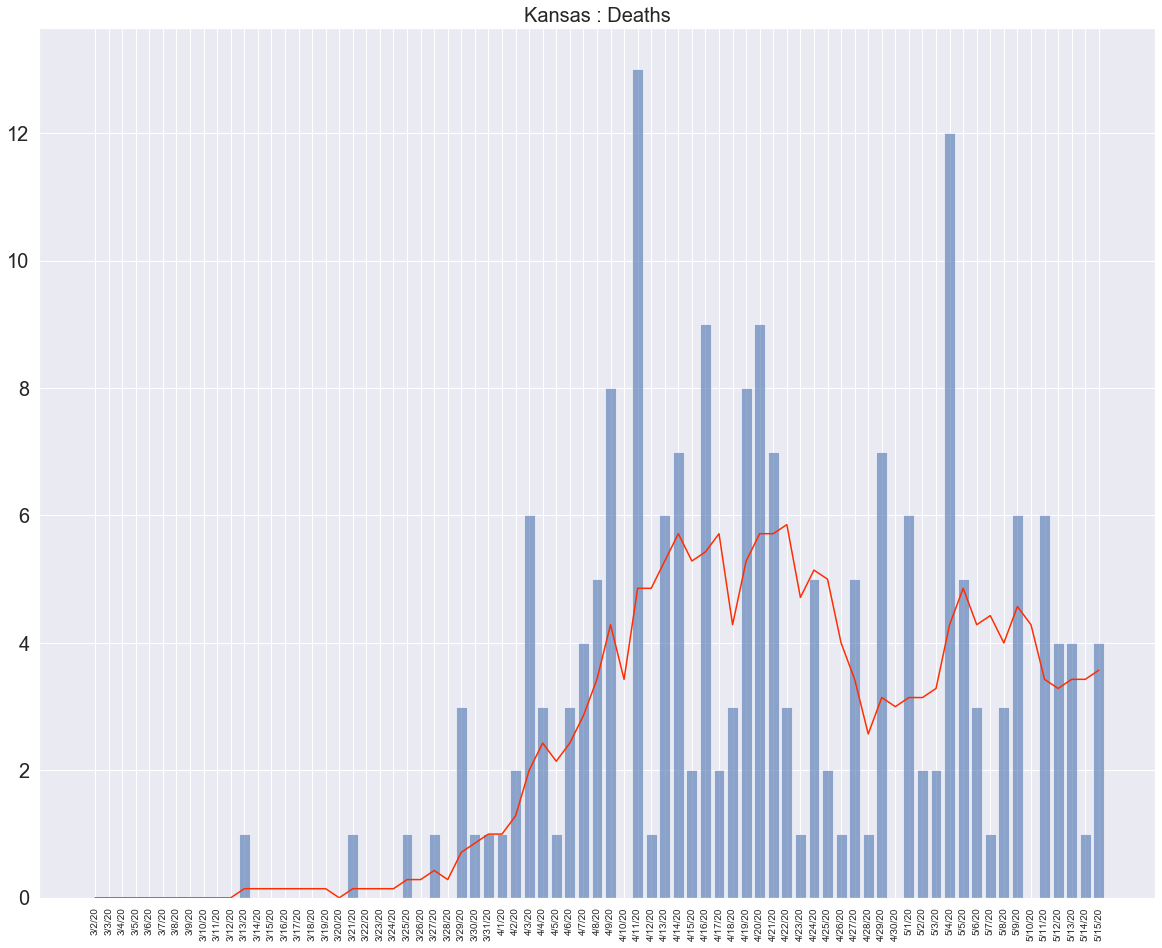

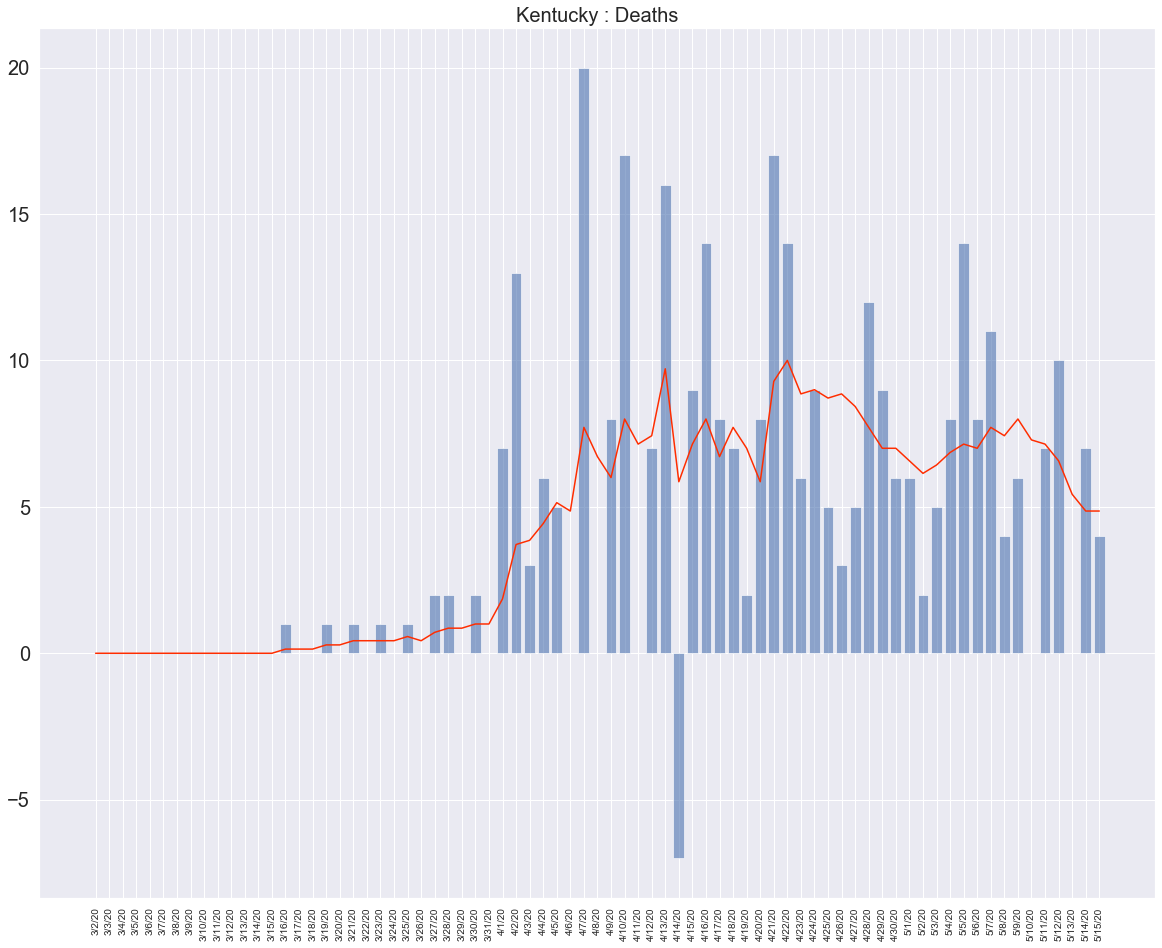

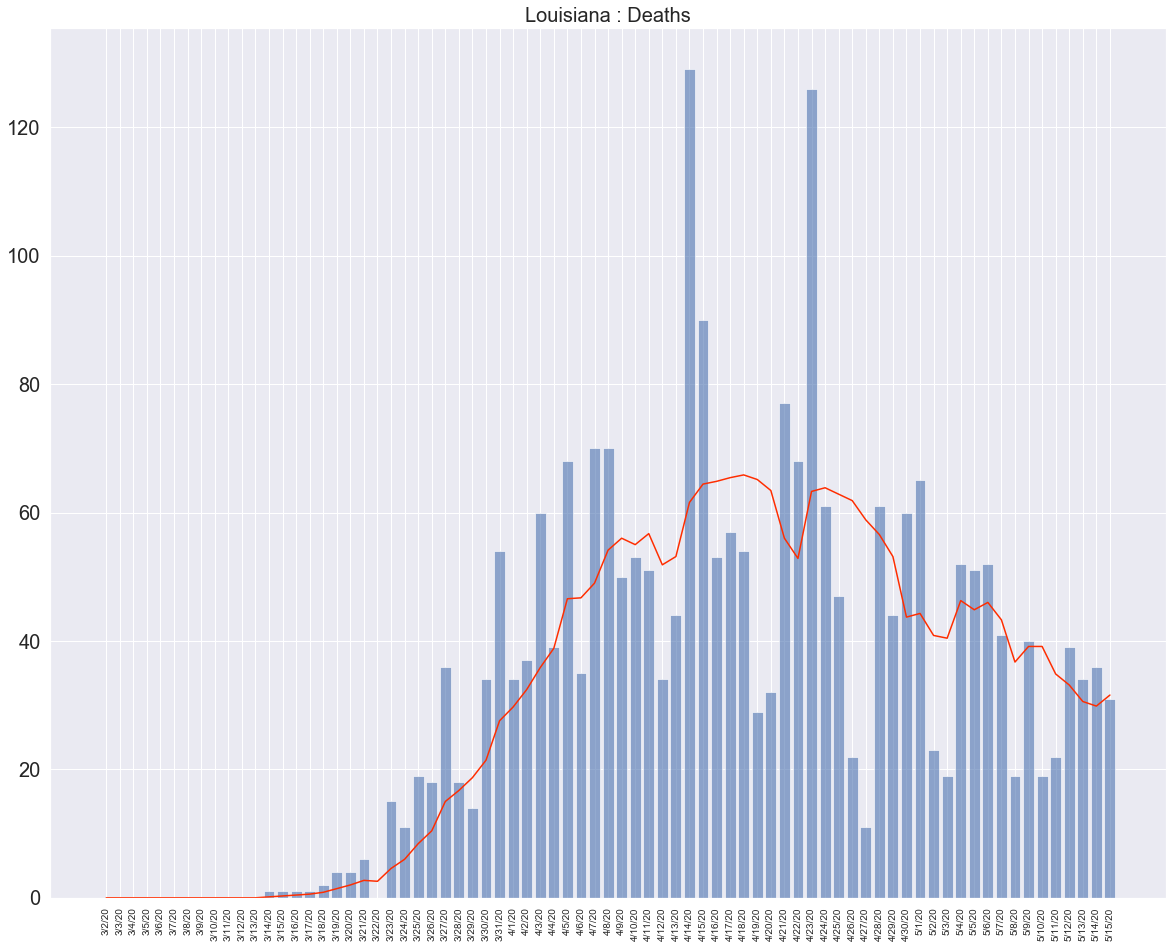

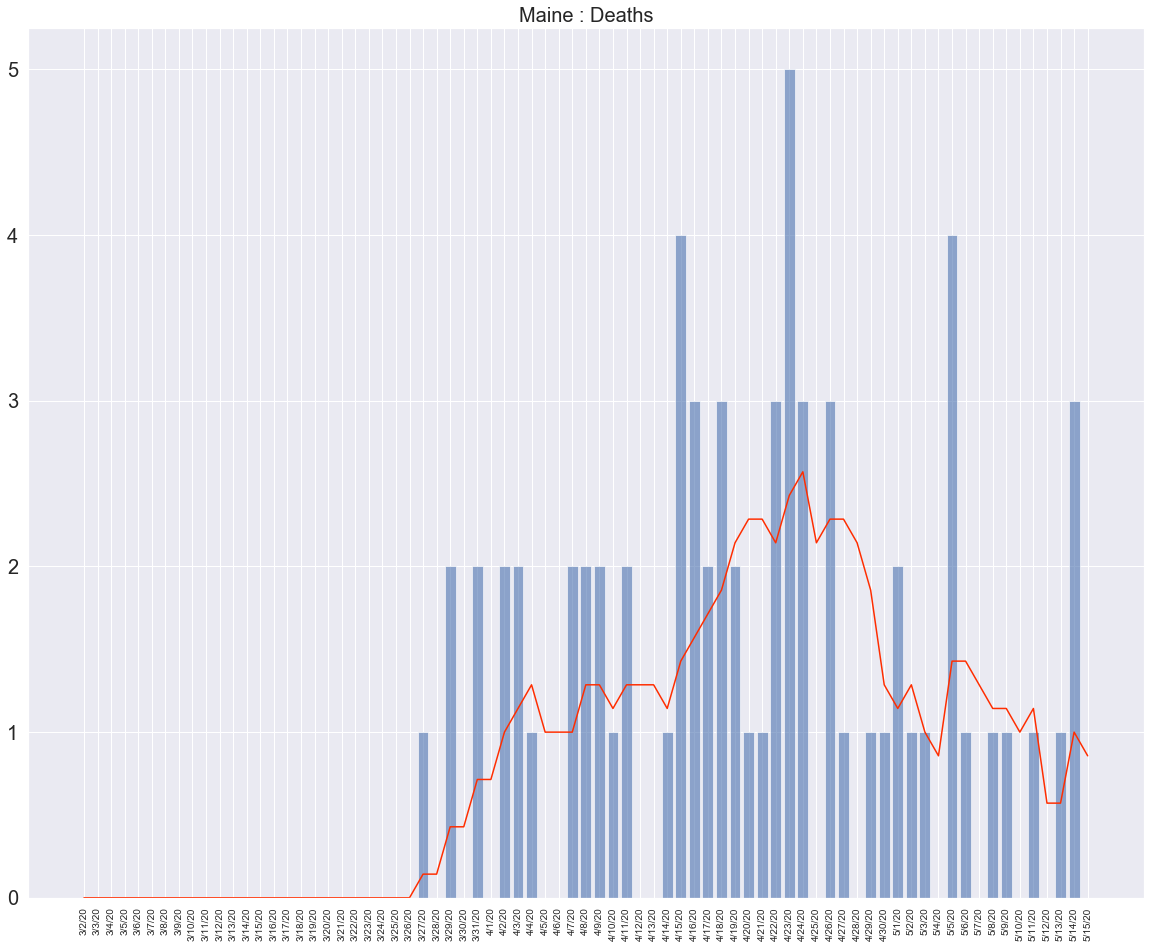

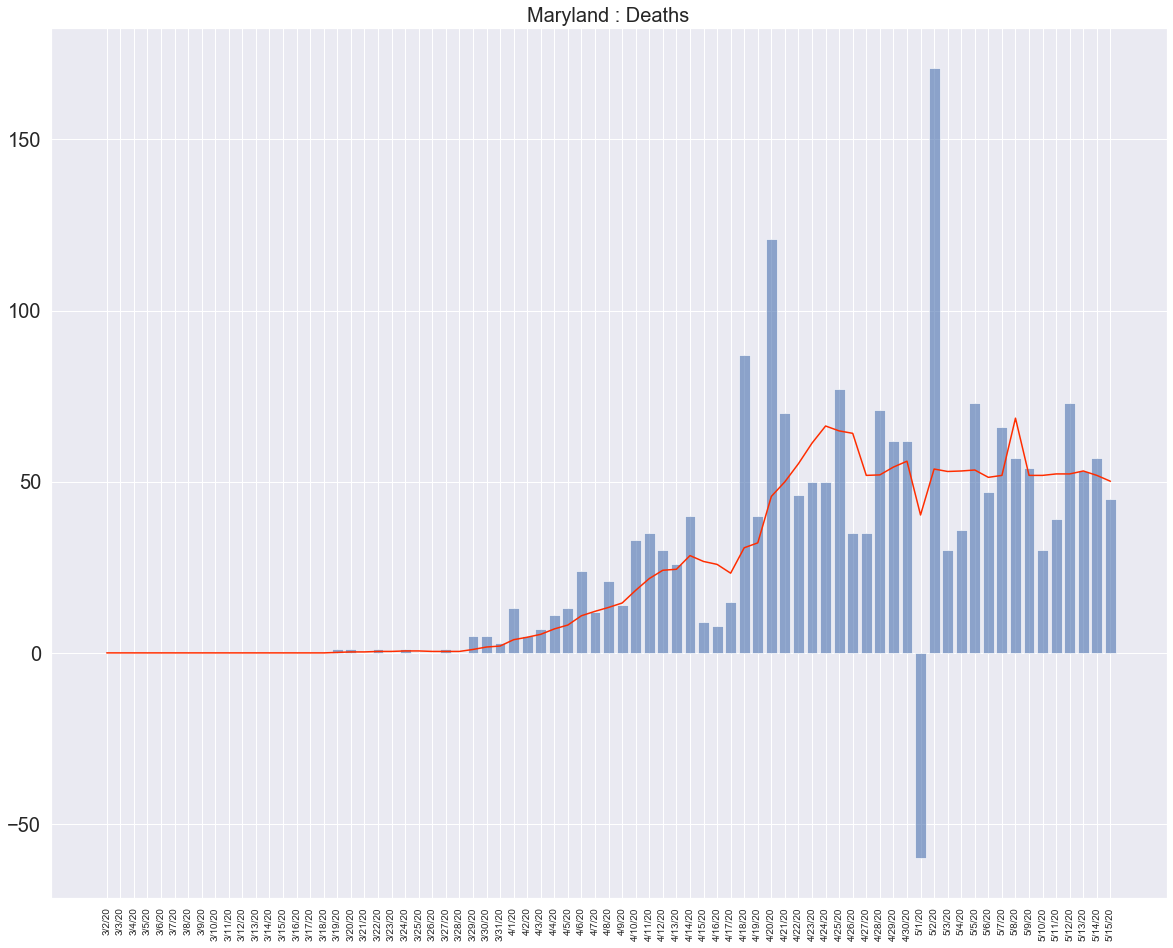

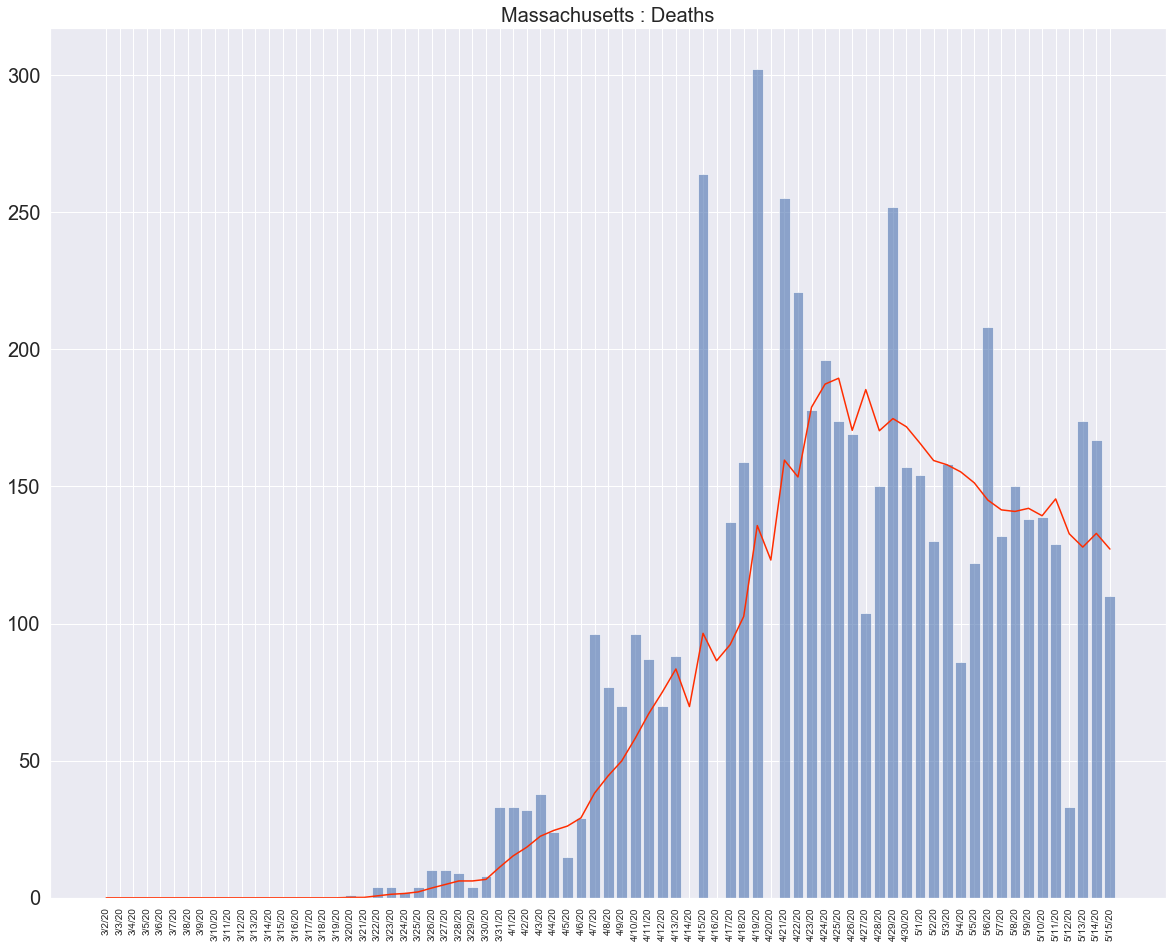

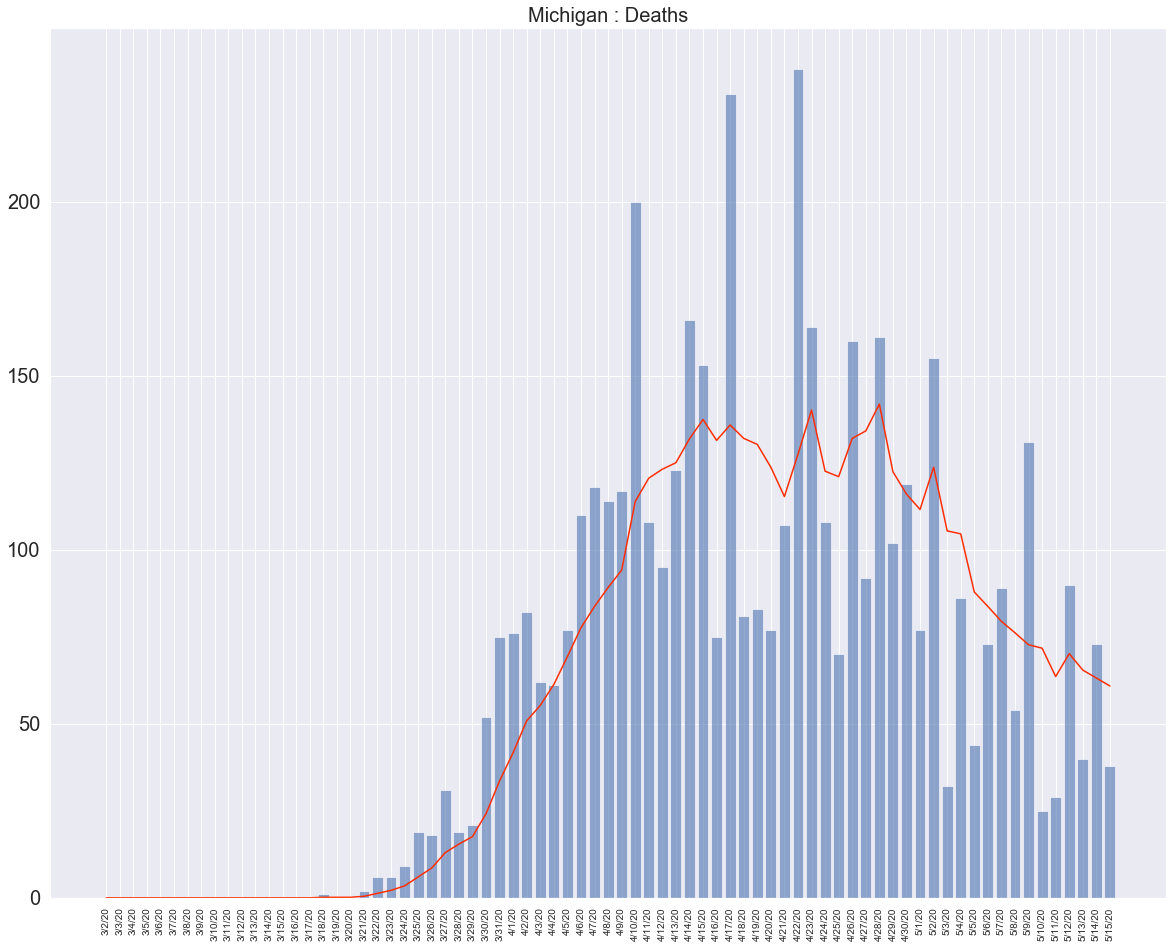

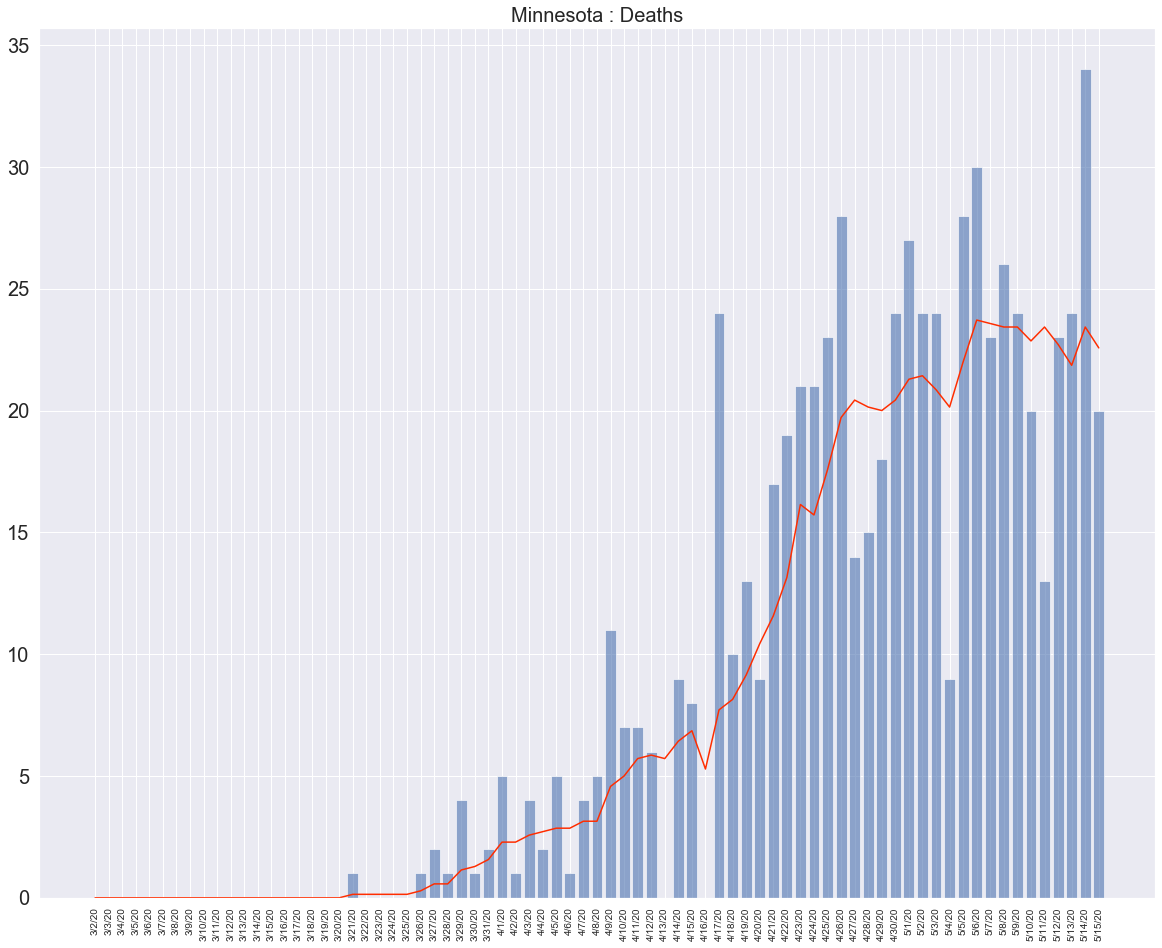

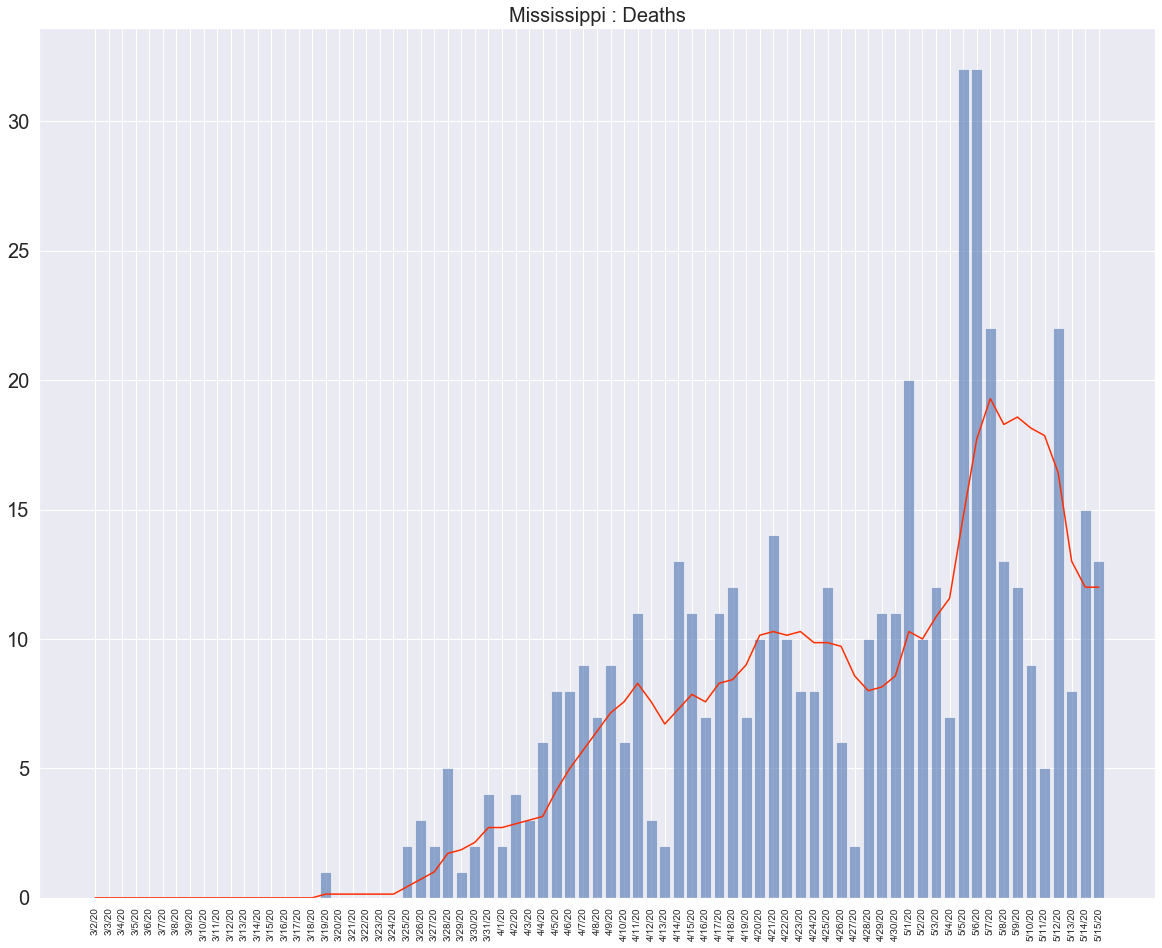

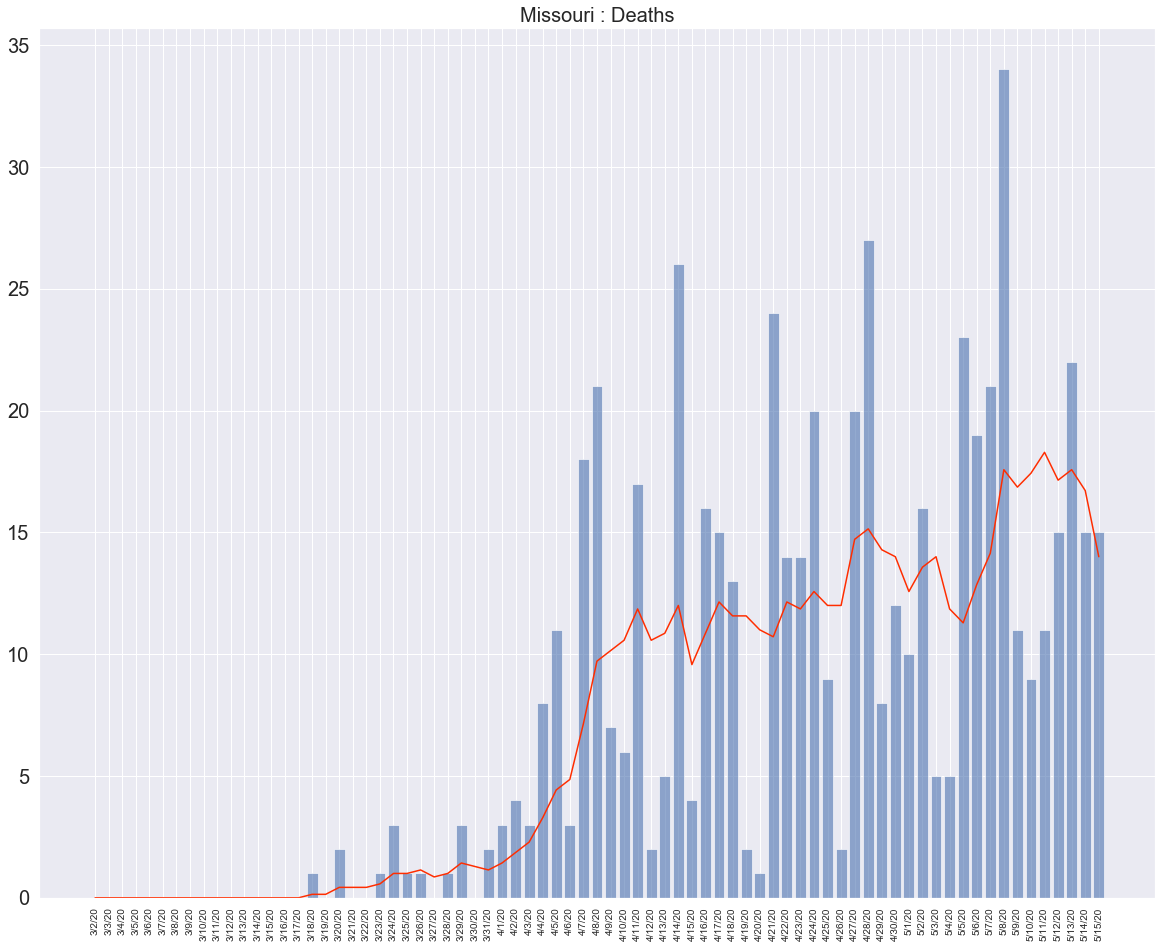

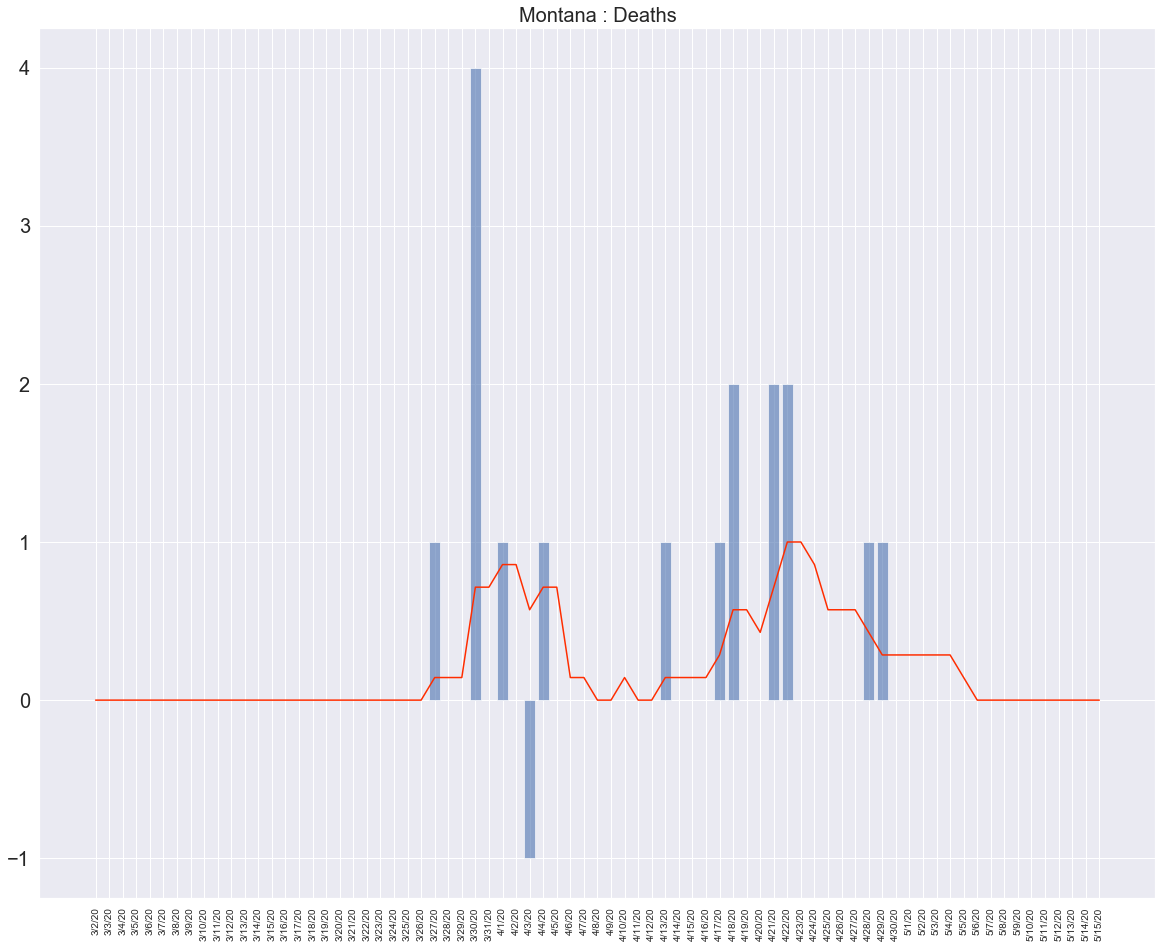

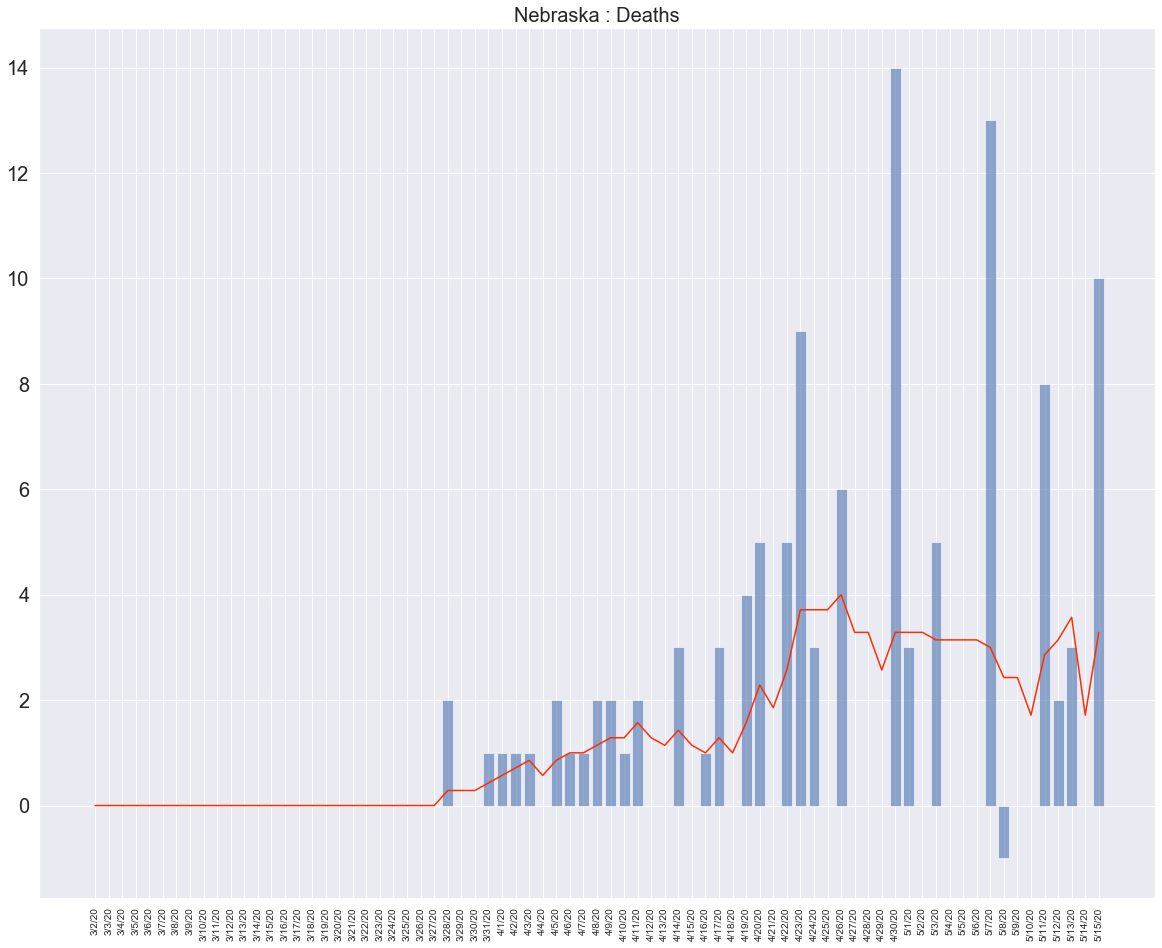

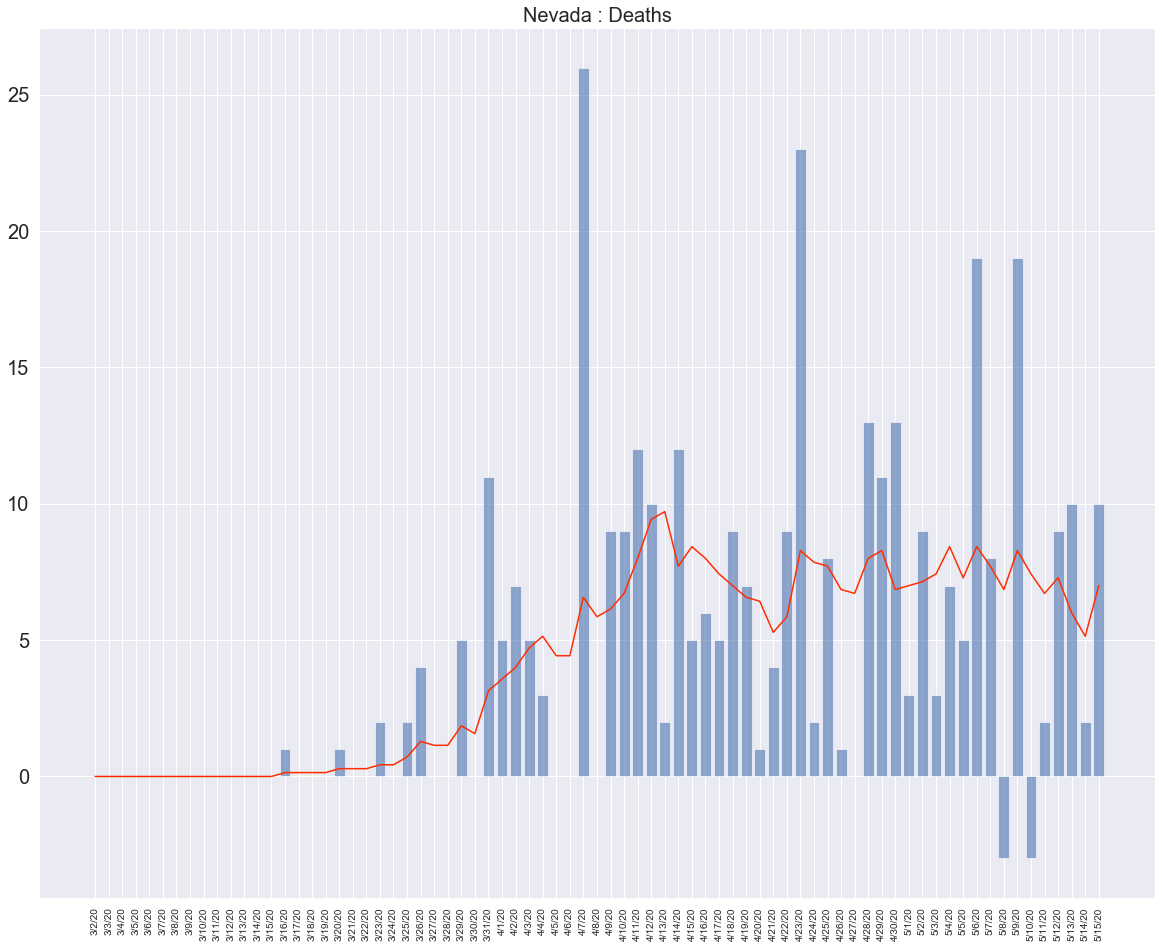

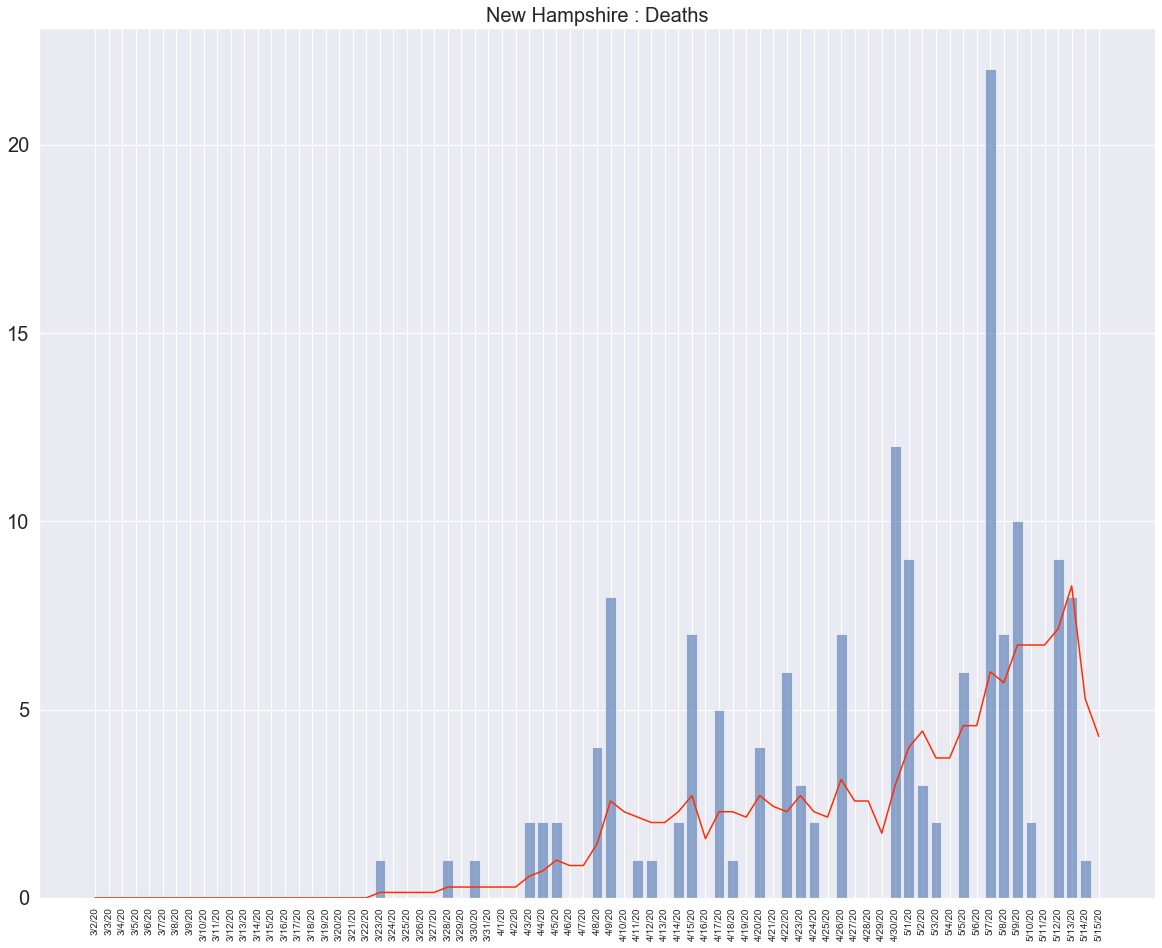

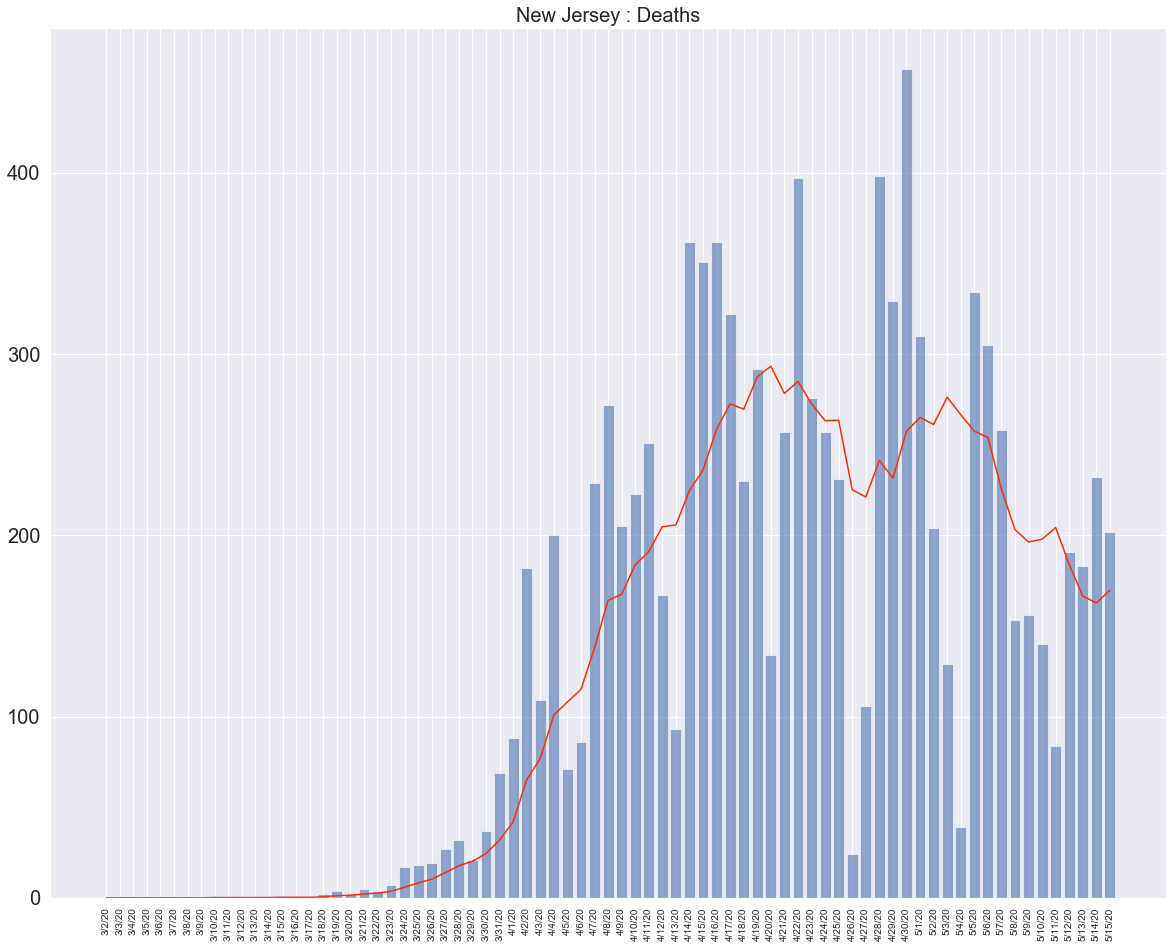

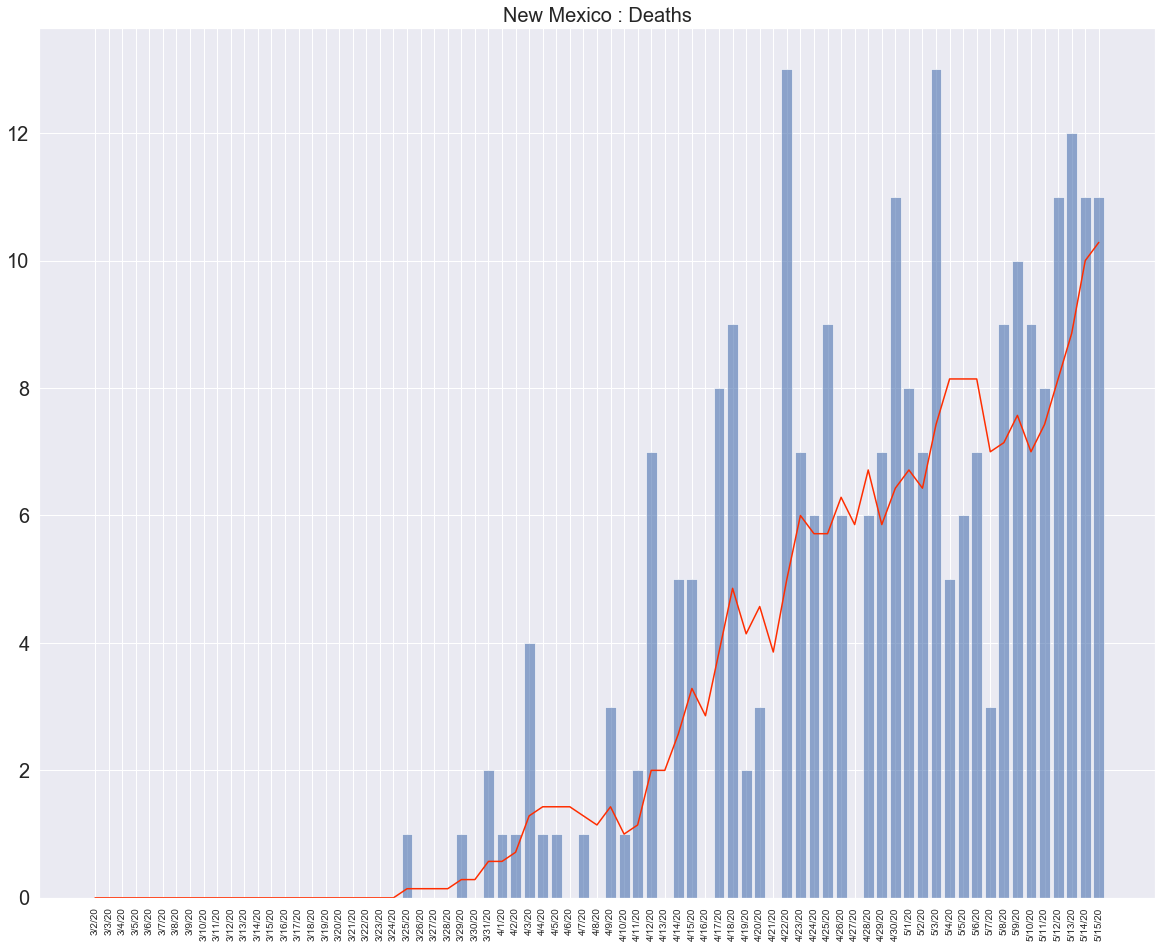

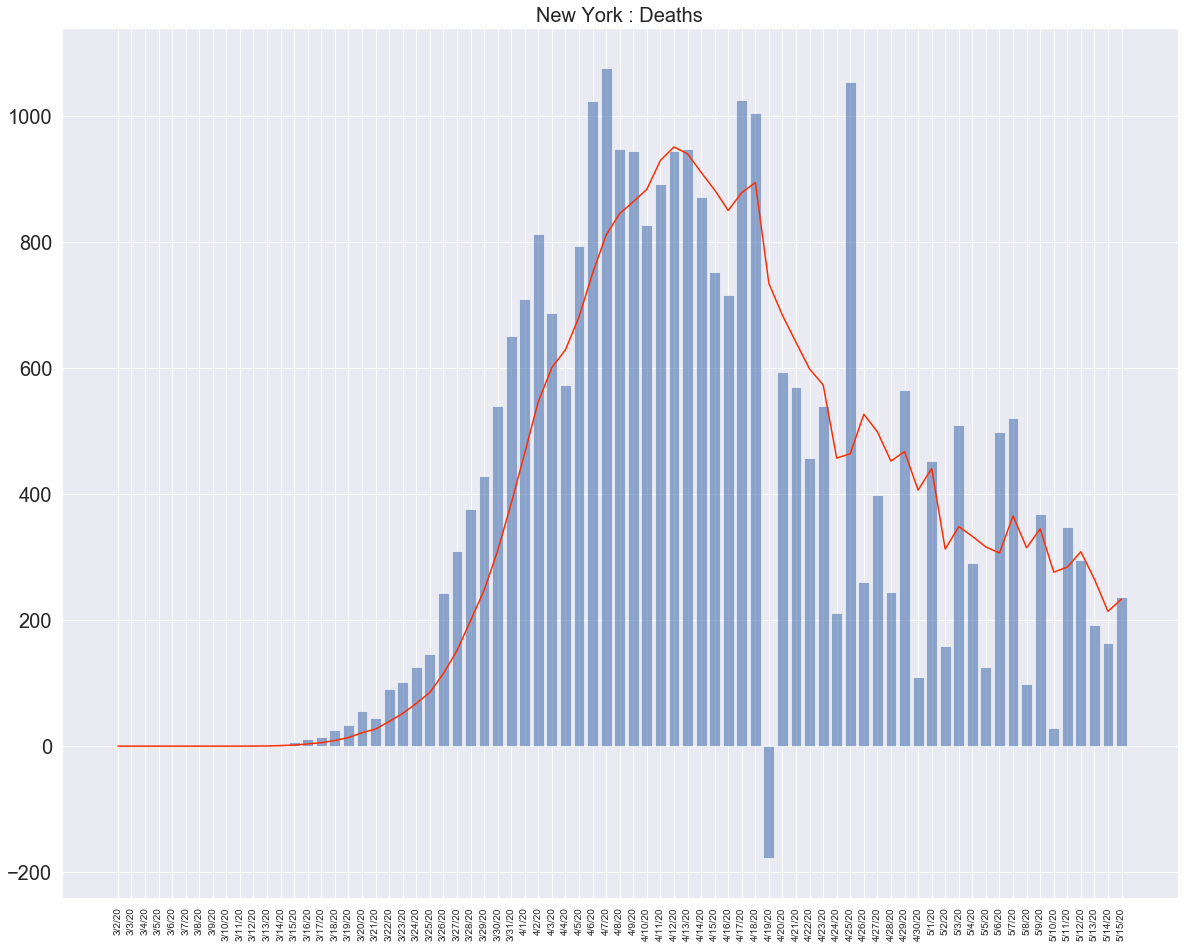

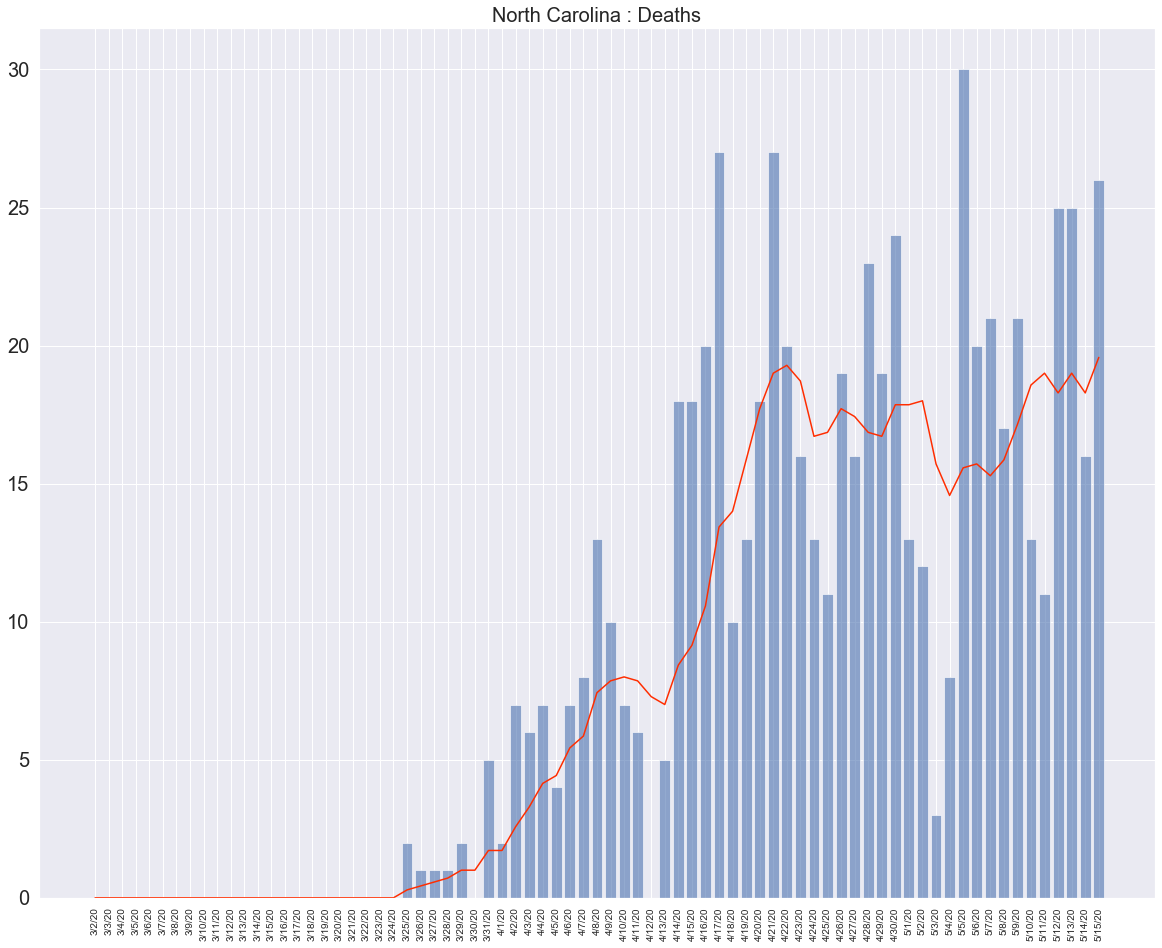

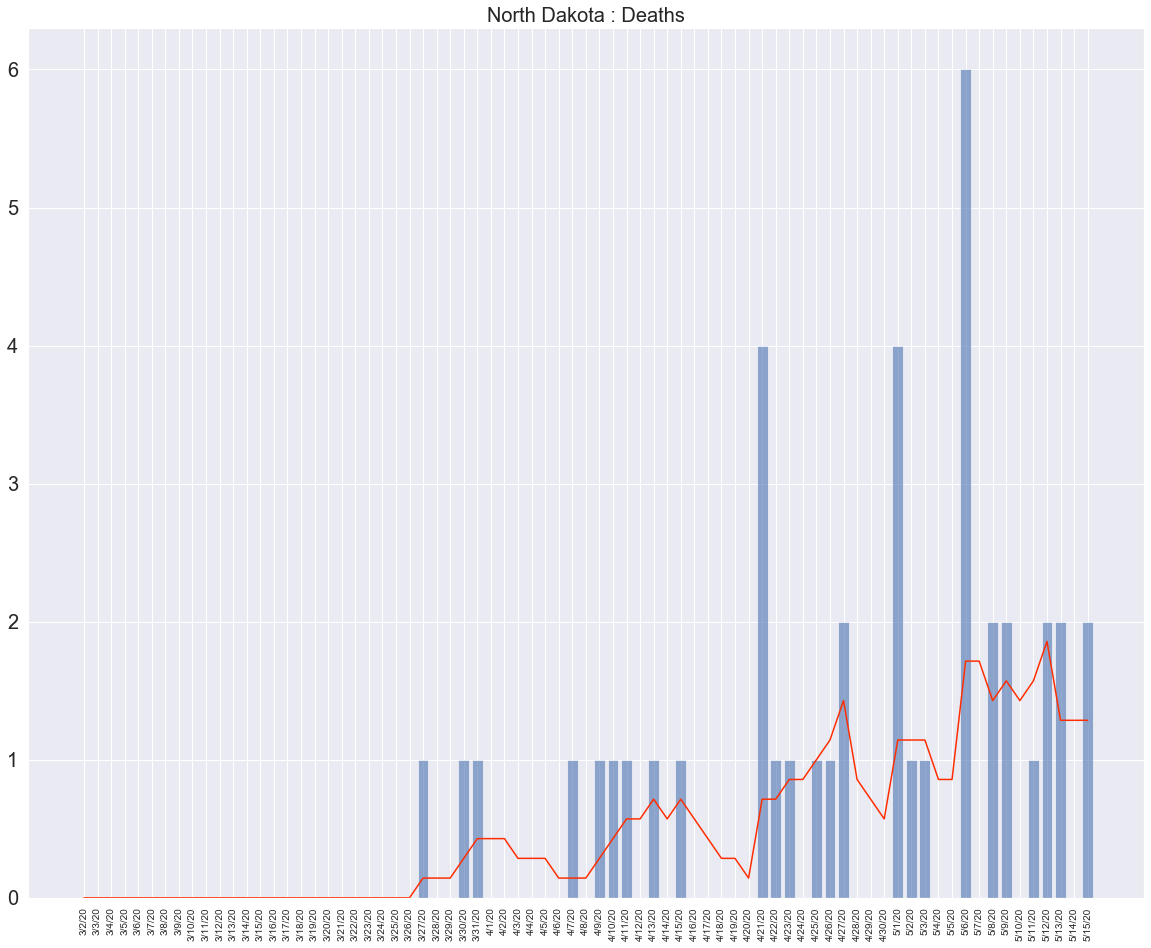

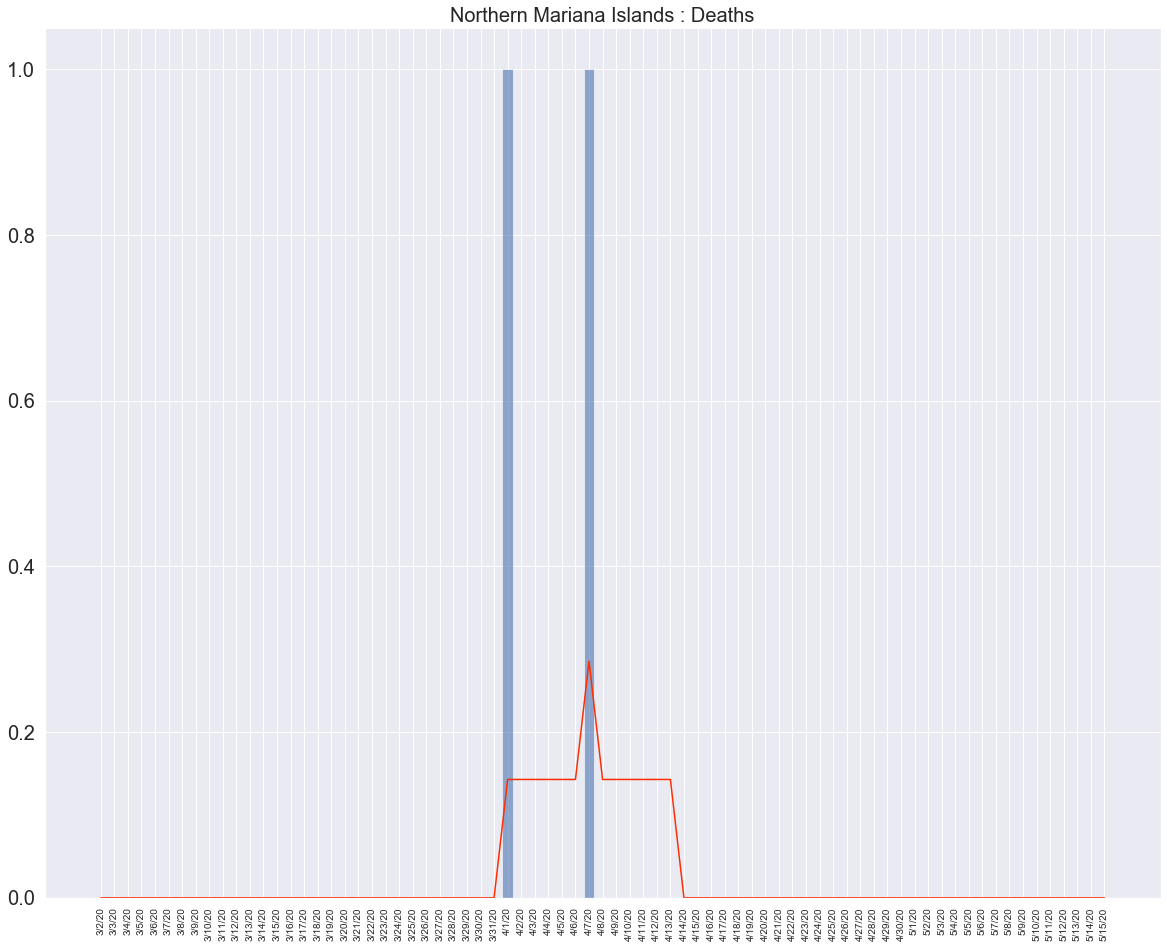

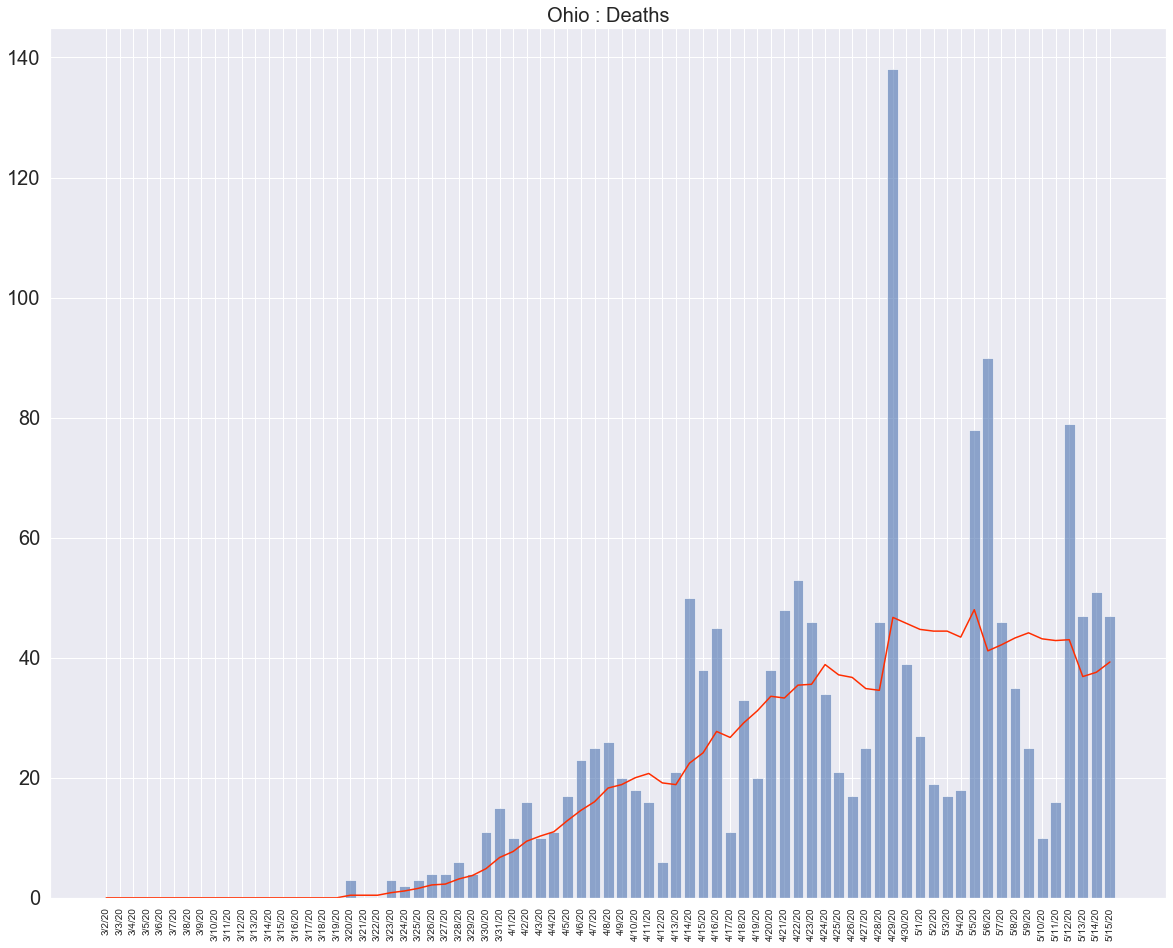

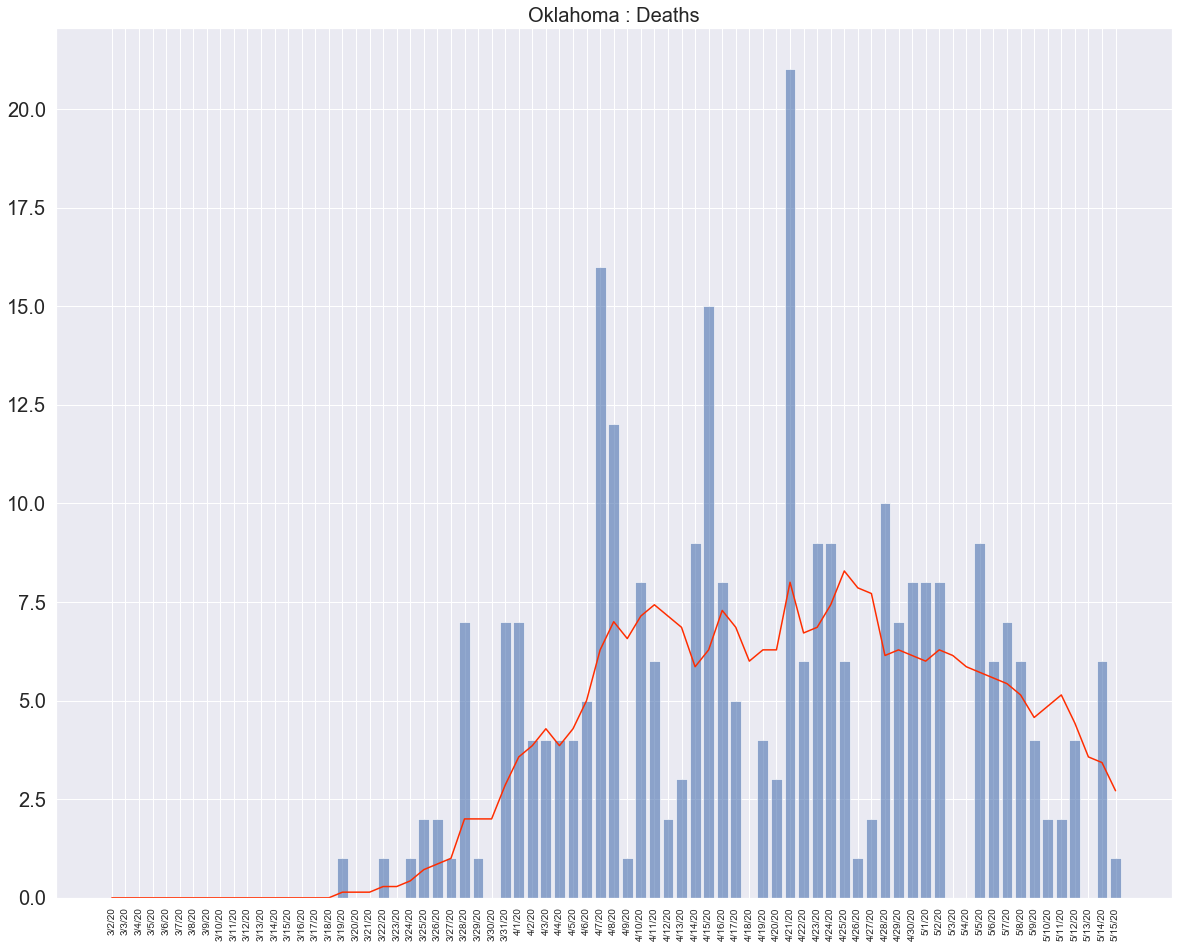

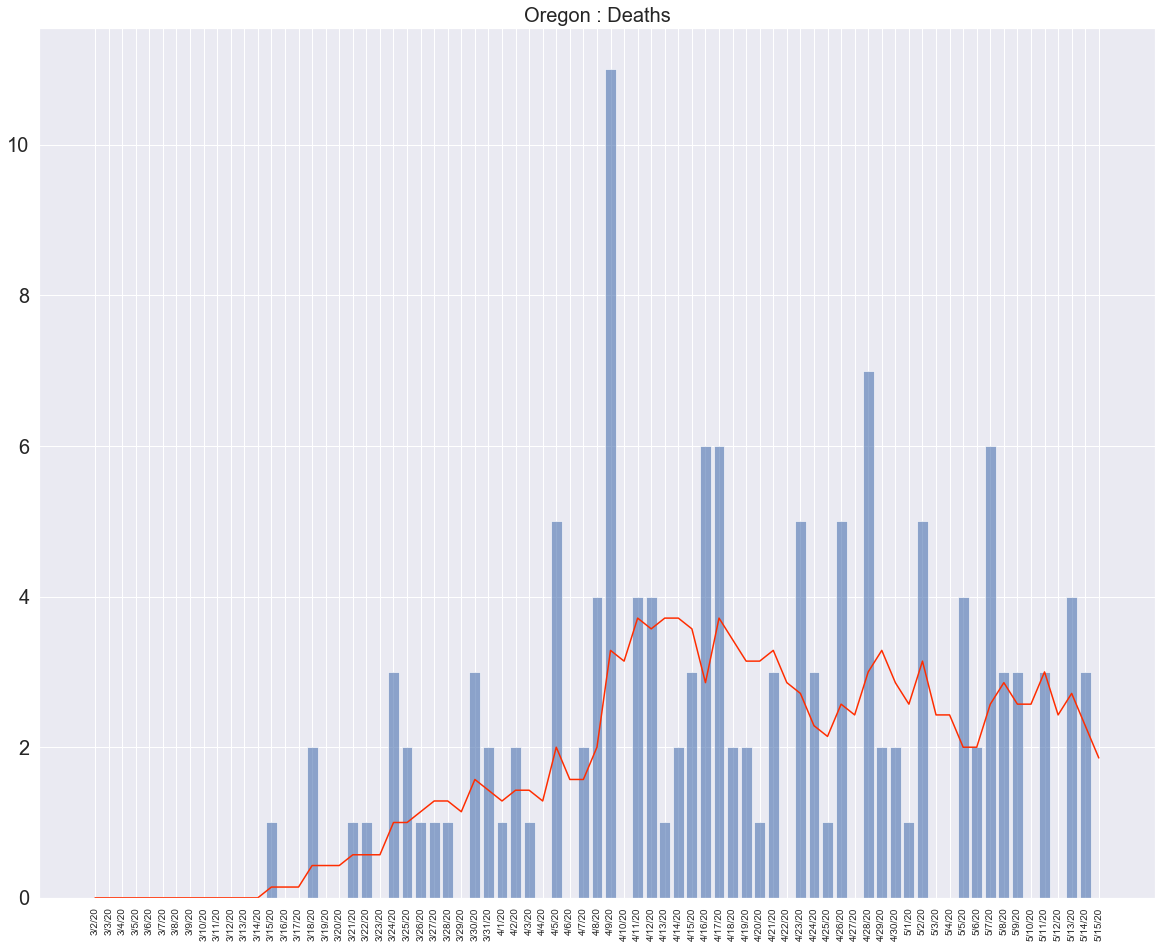

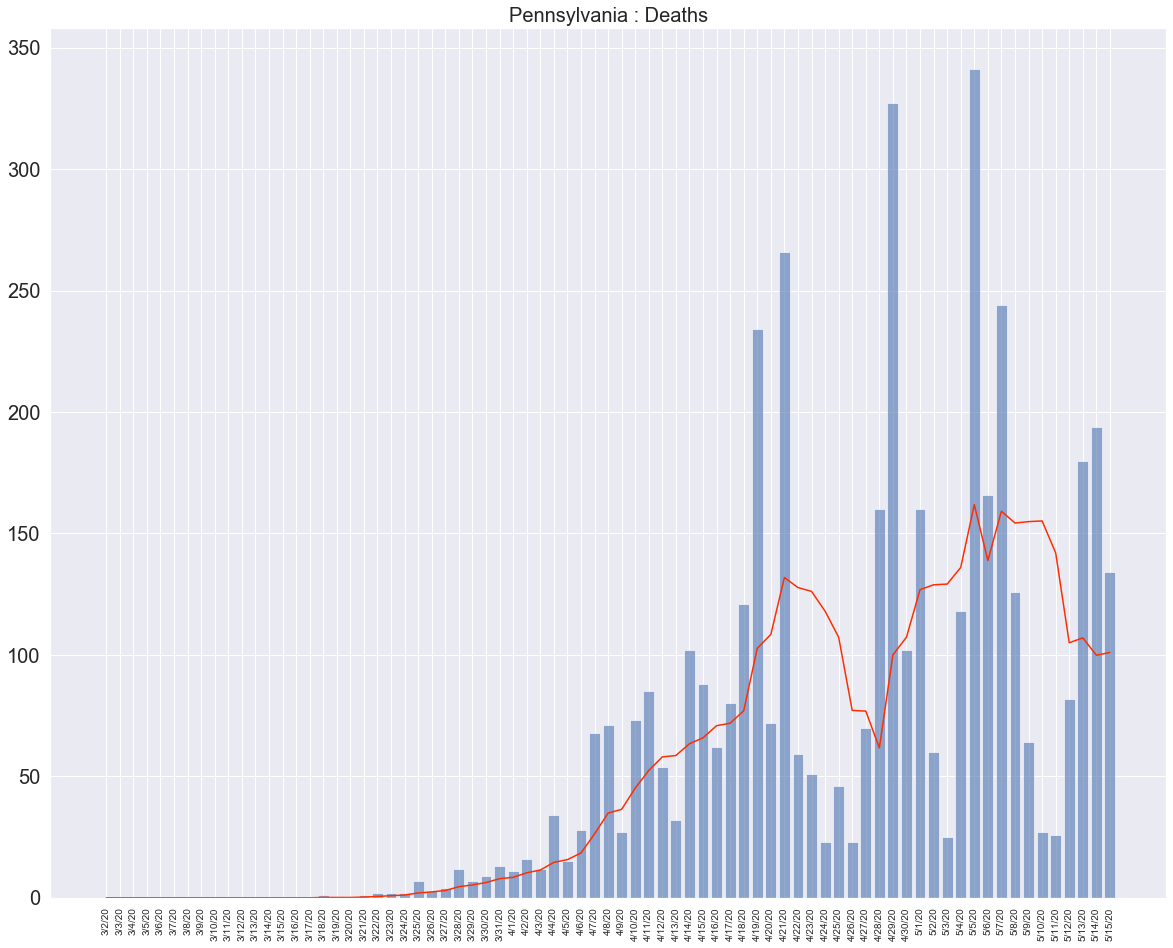

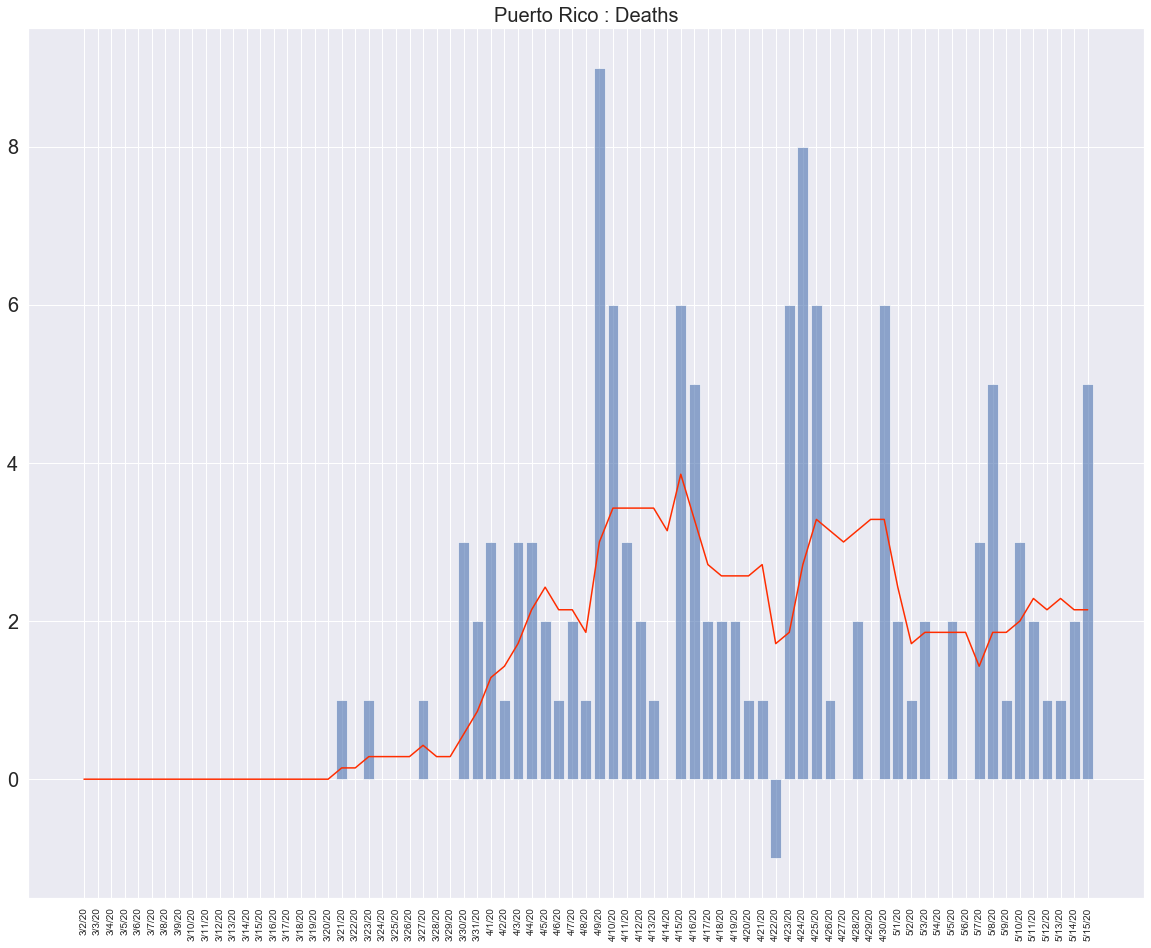

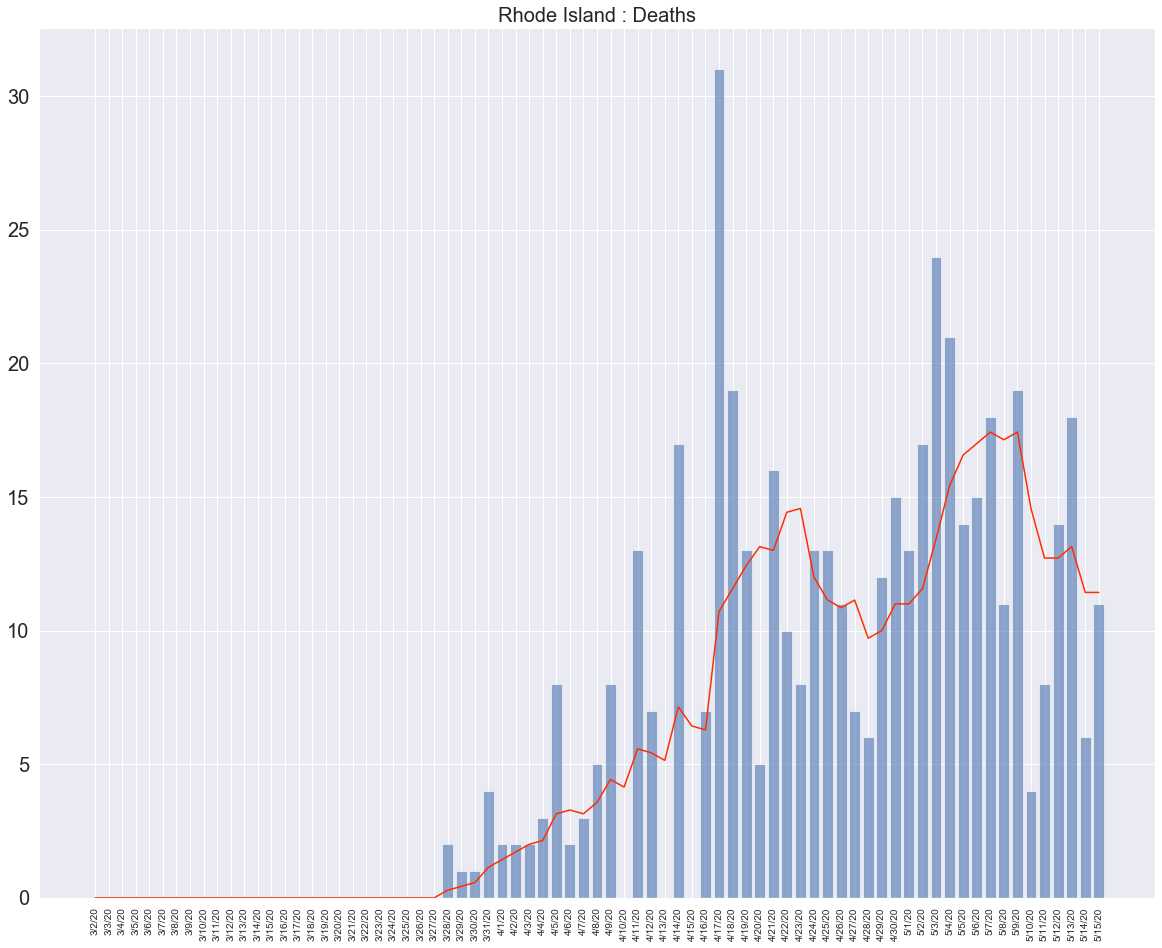

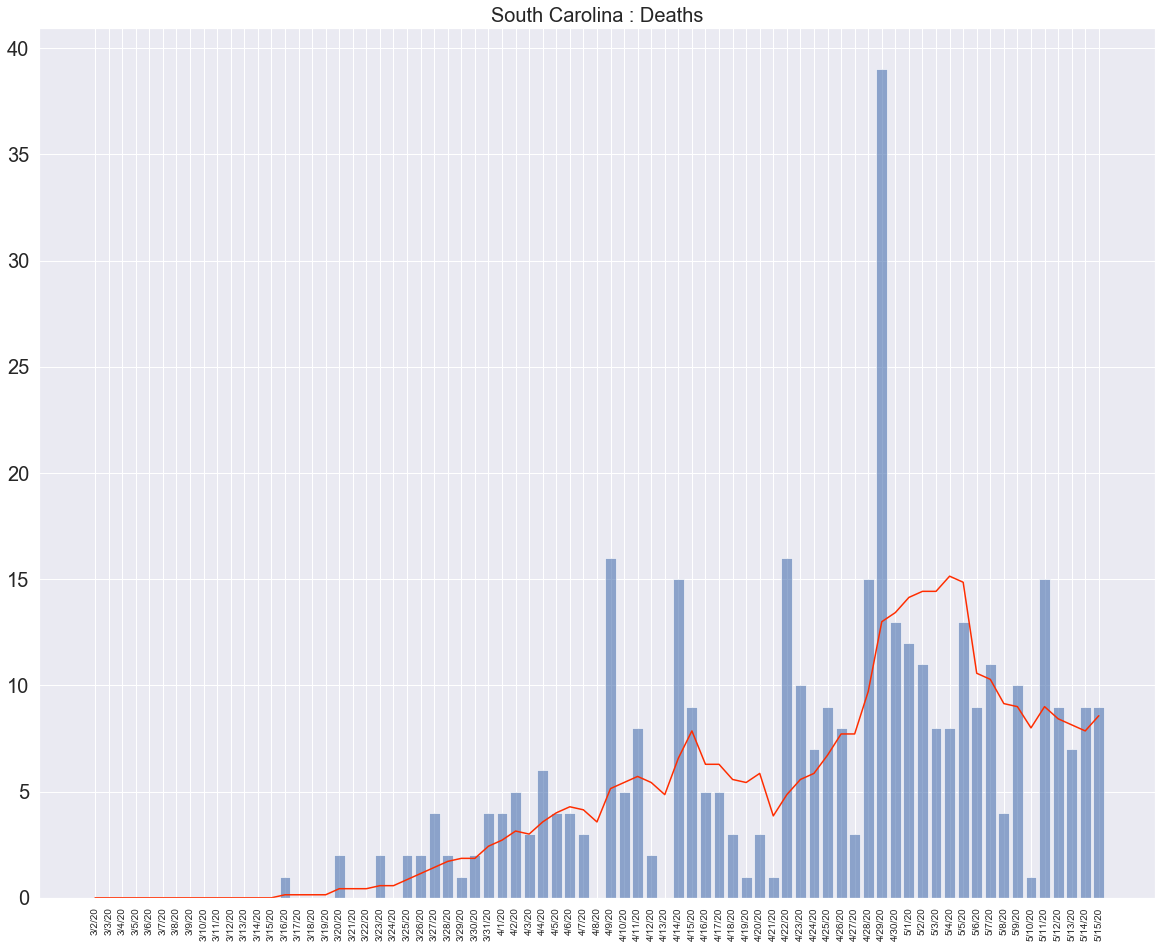

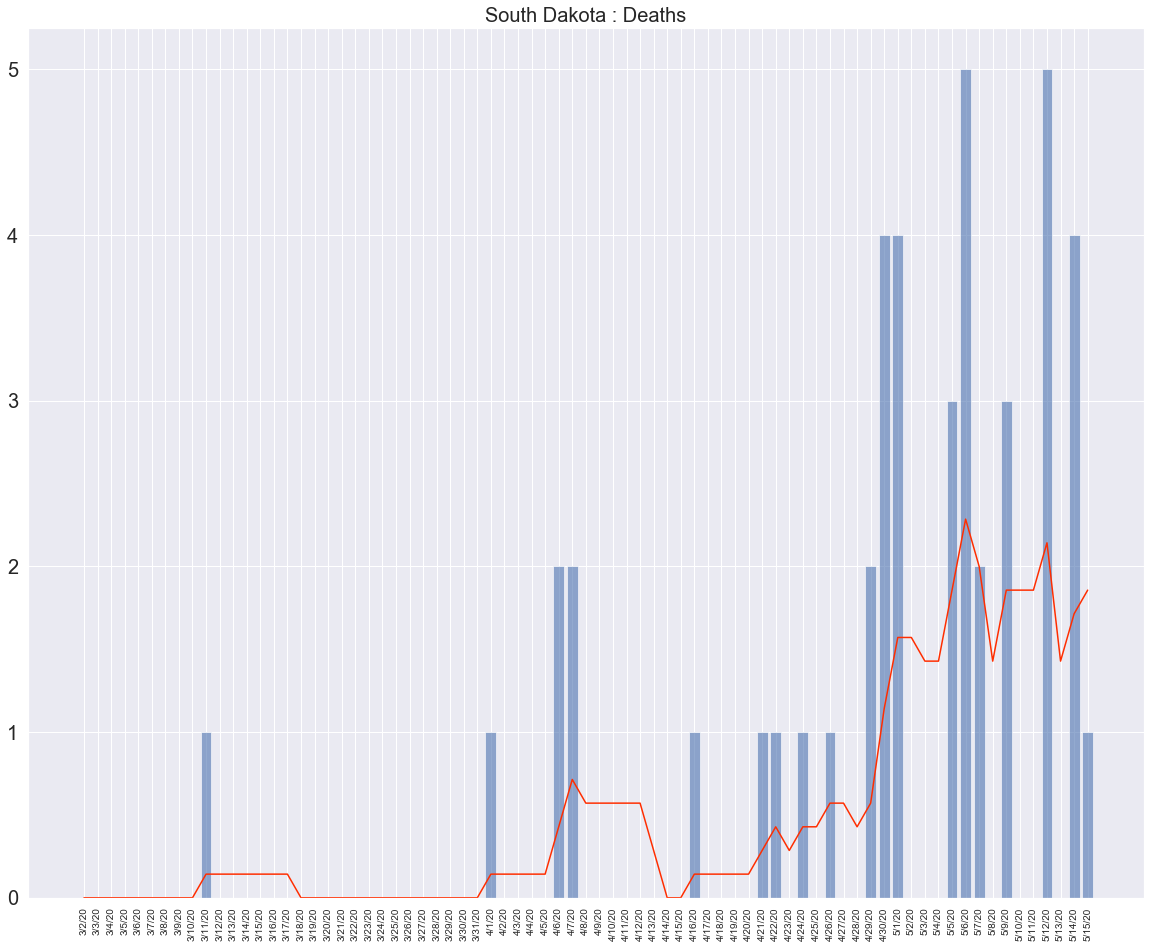

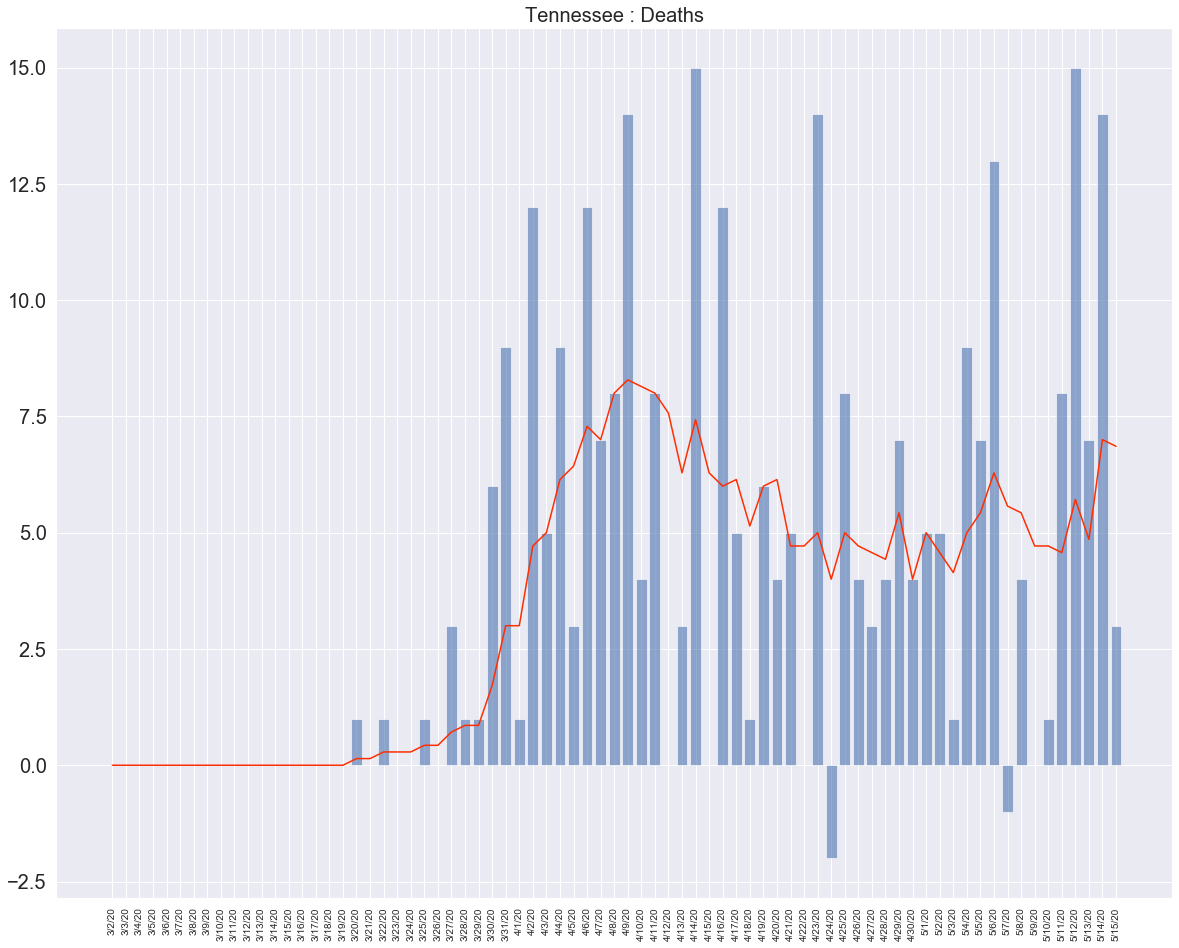

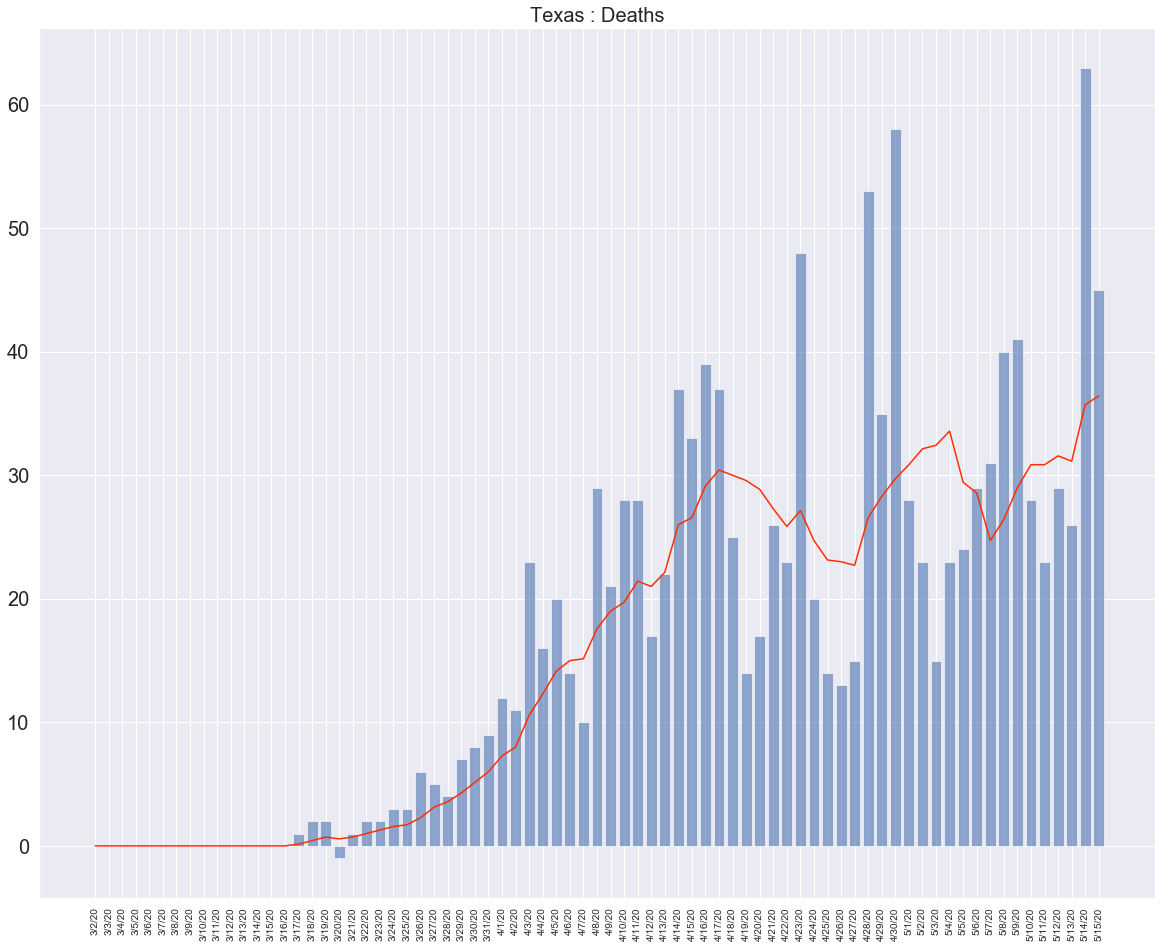

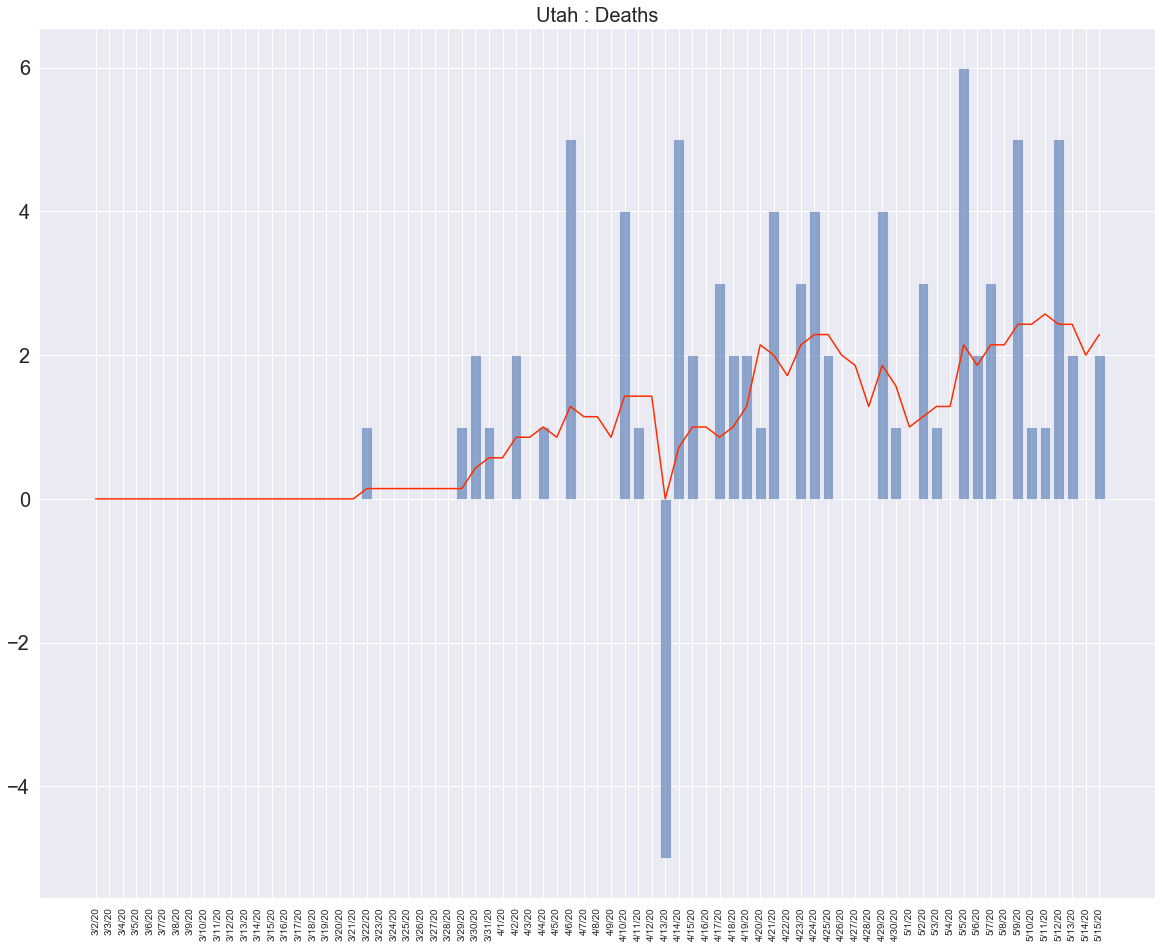

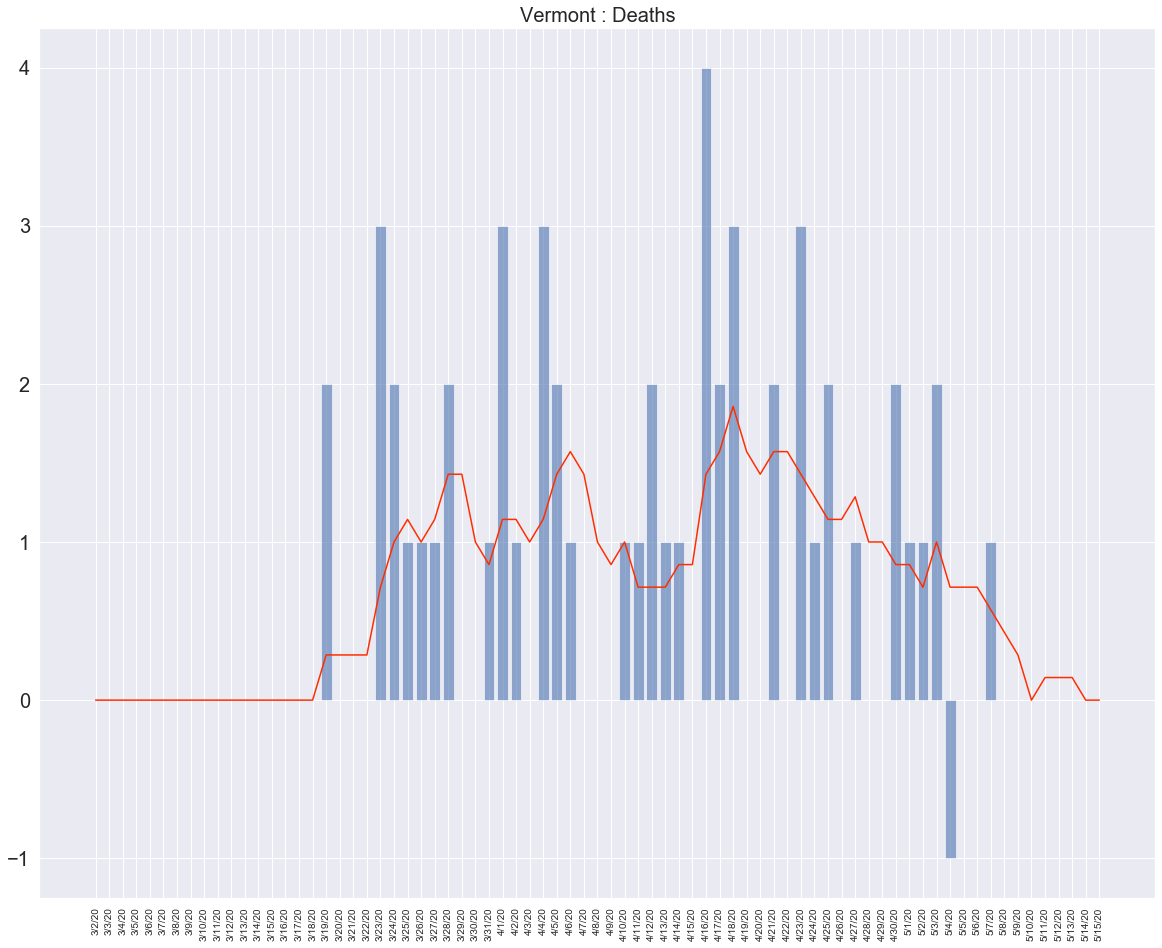

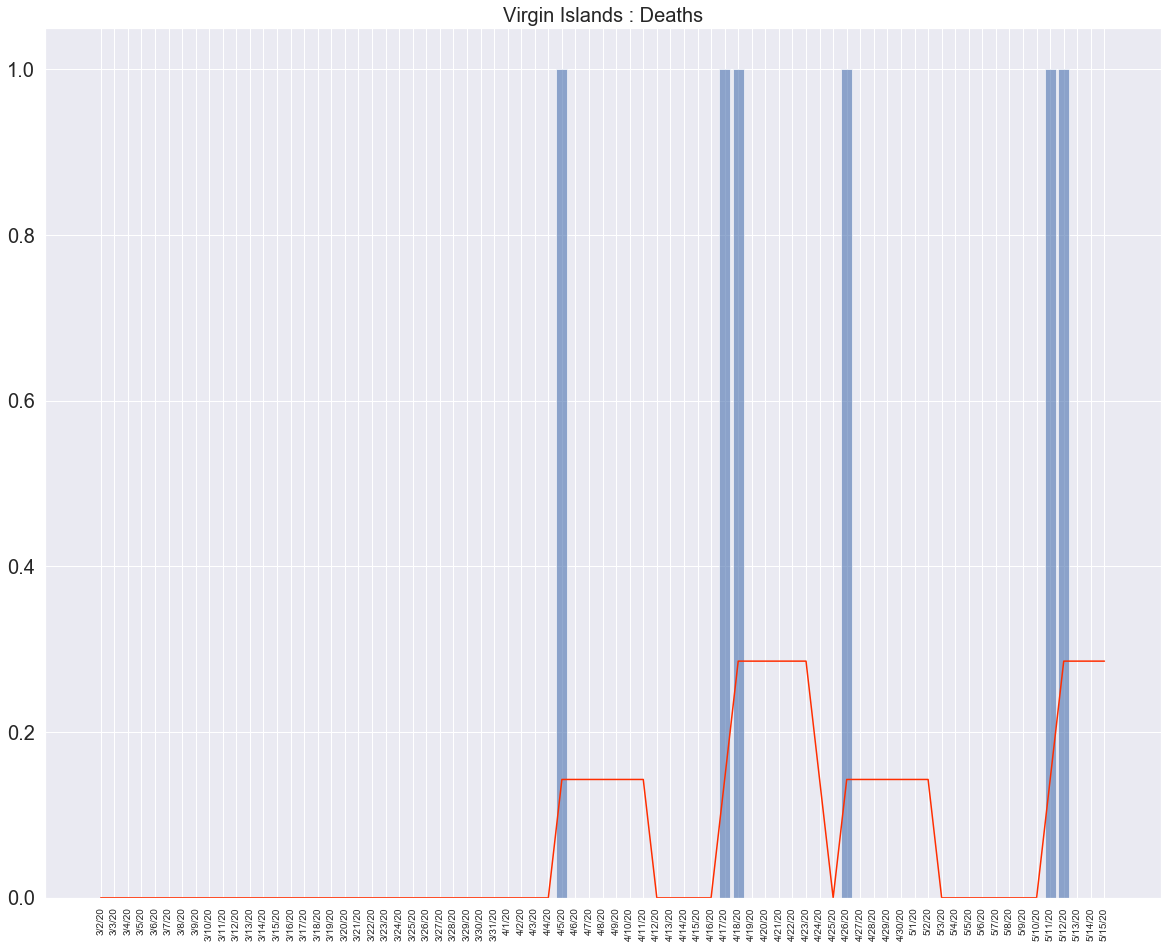

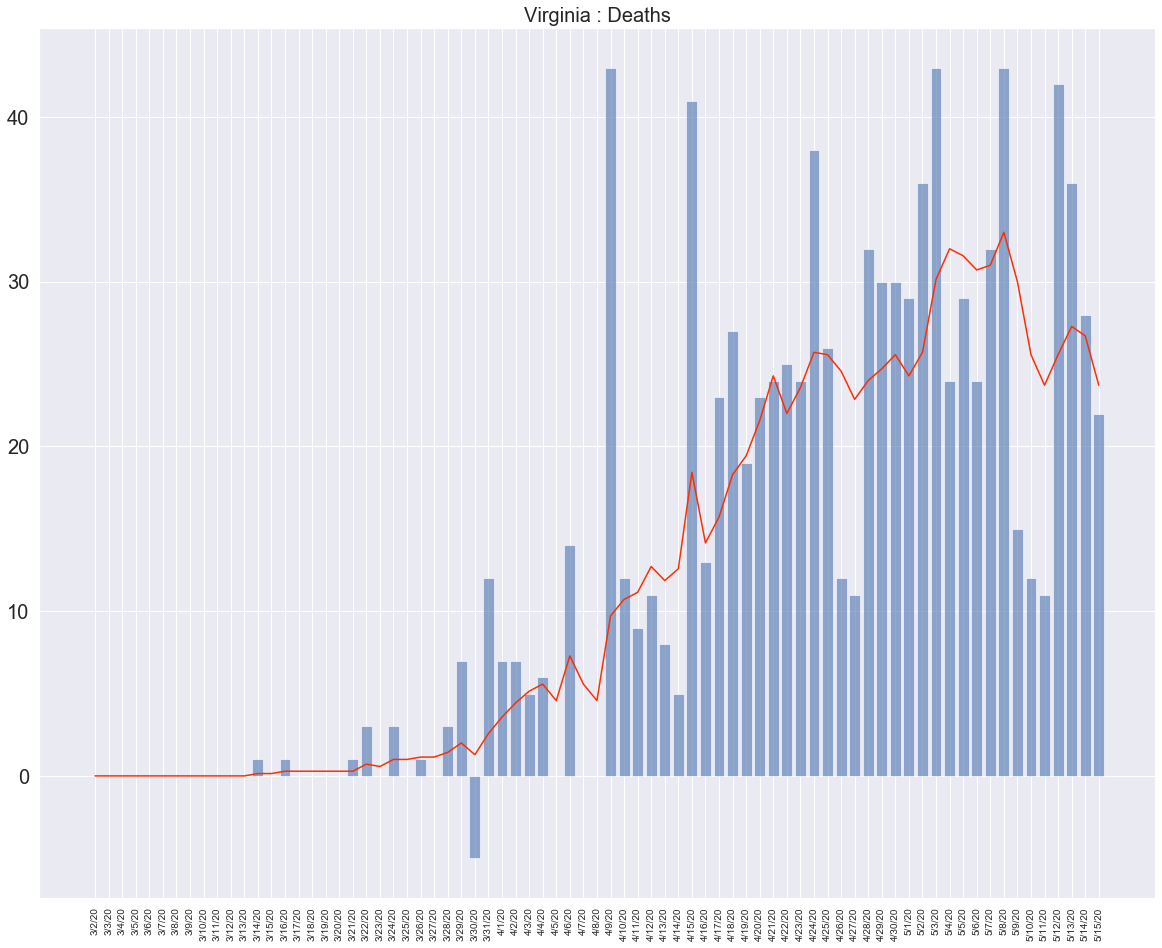

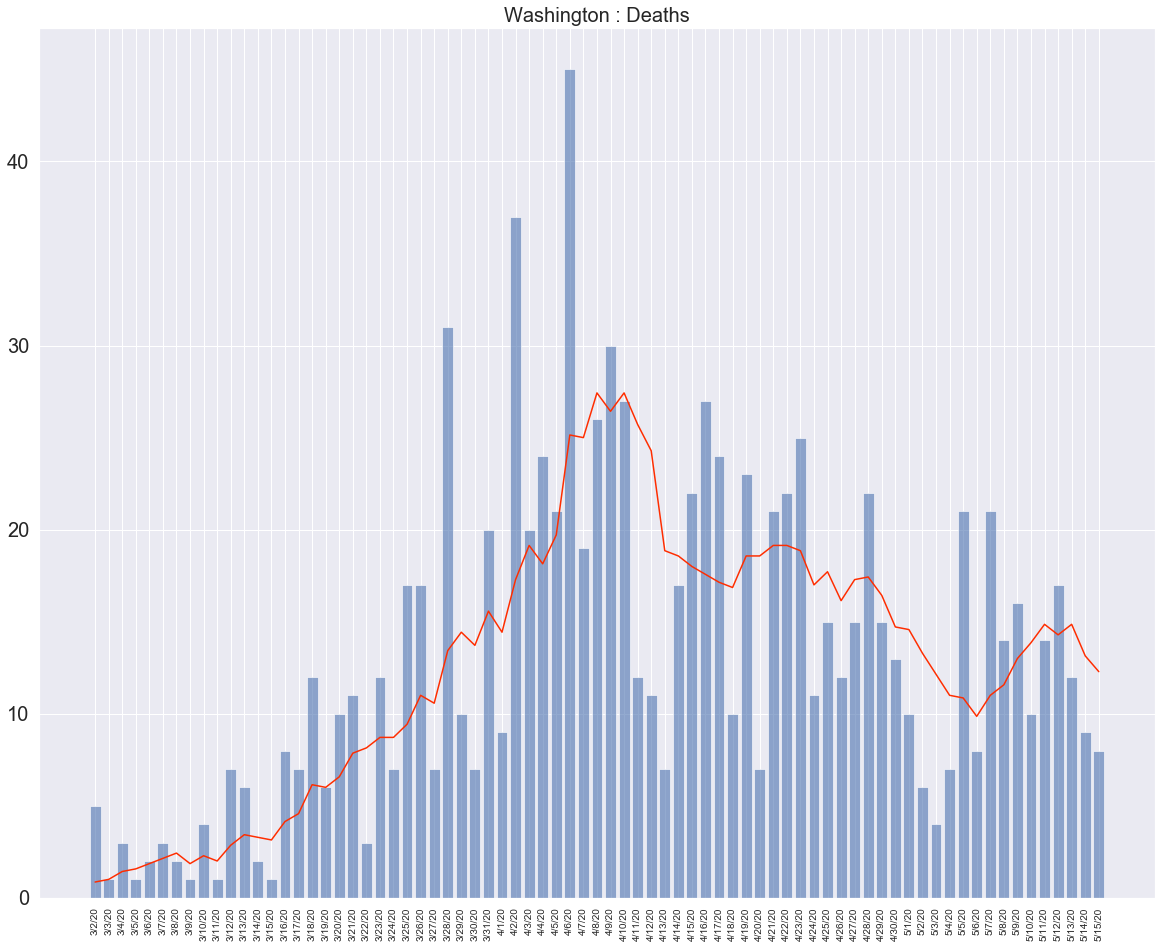

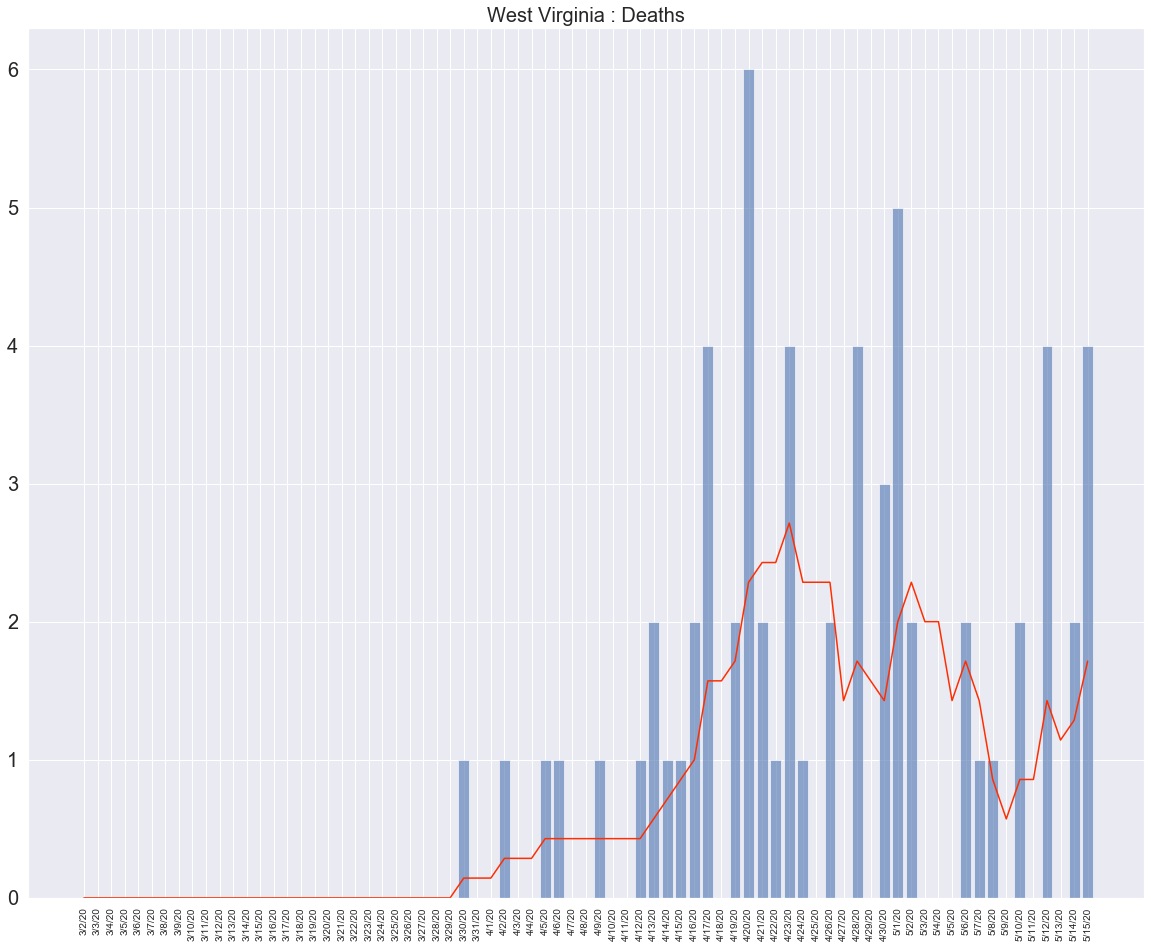

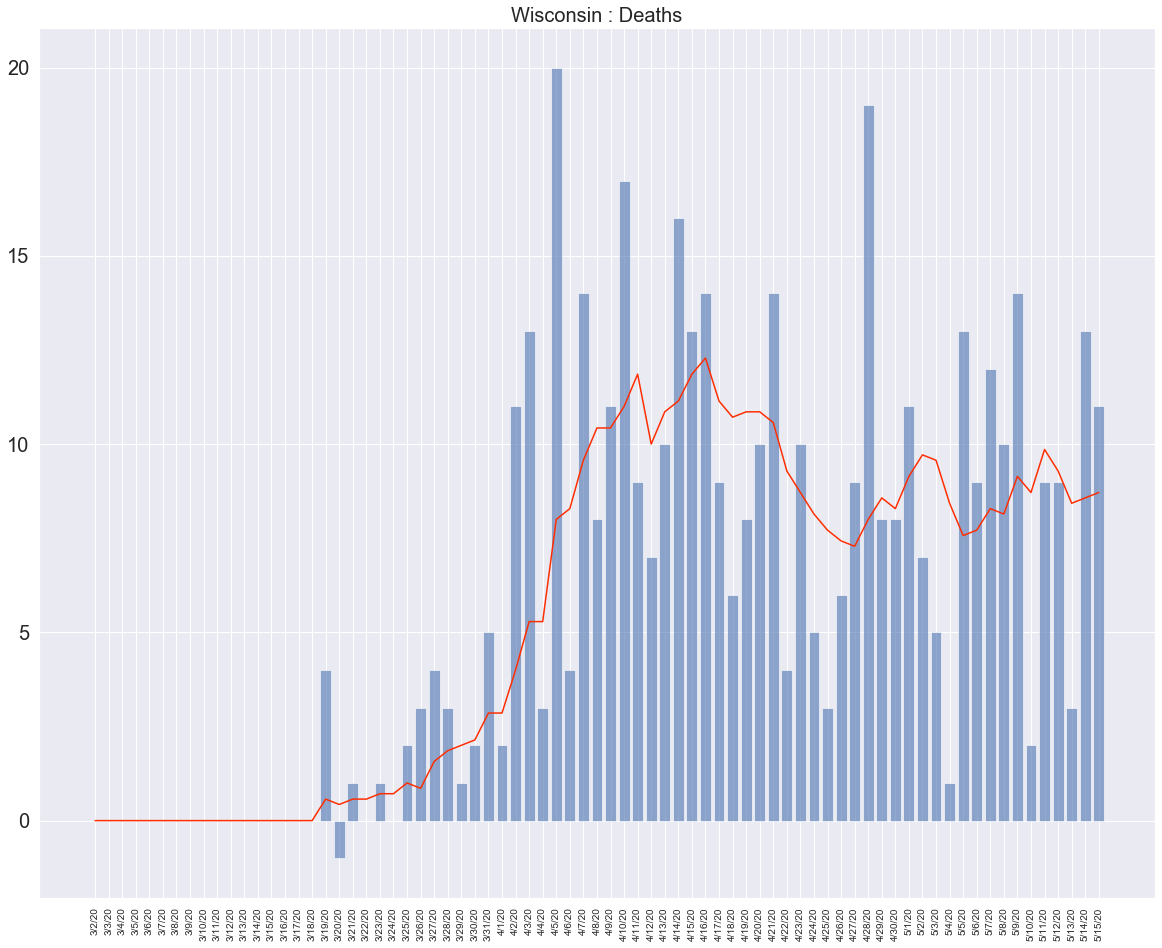

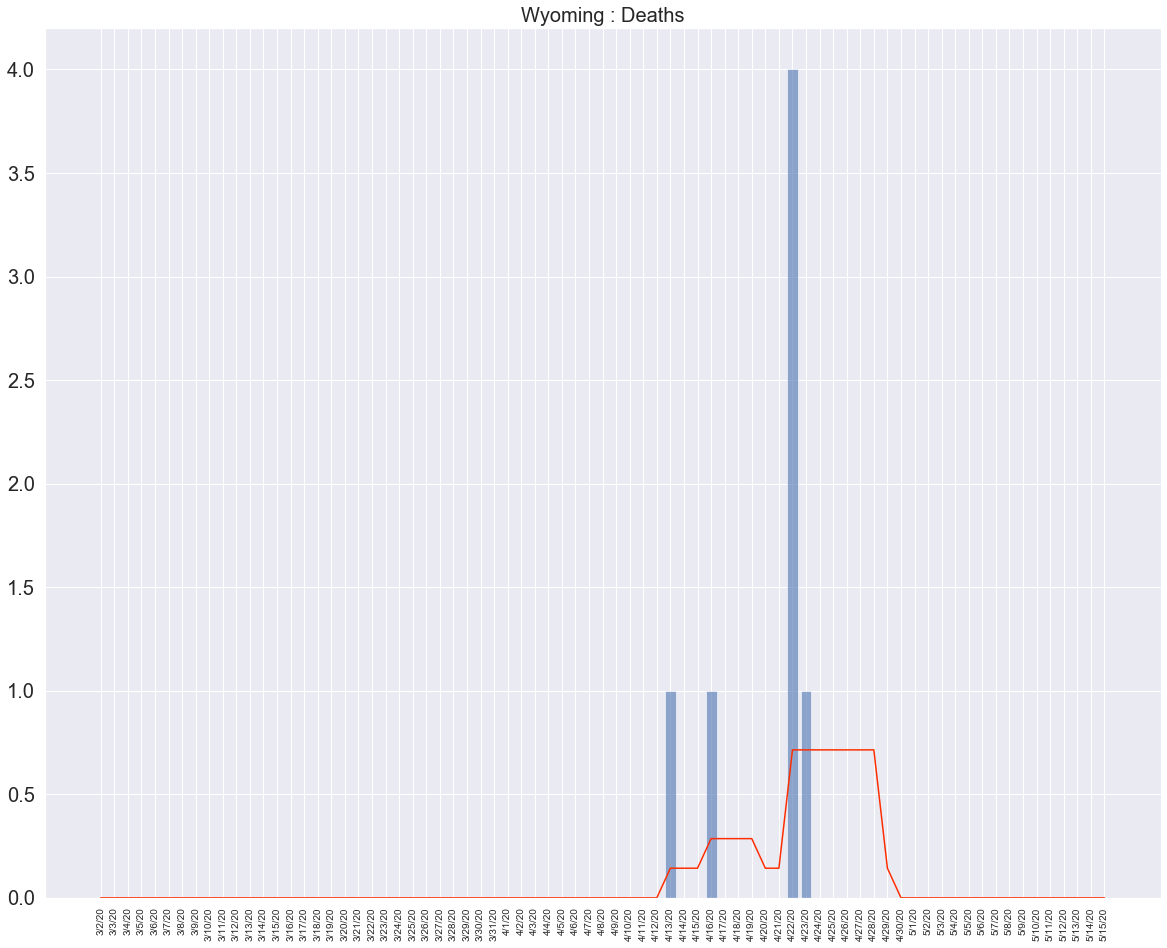

In [53]:
counts_chart(daily_counts_deaths, rolling_avg_deaths, dates[40:], 'Deaths')

In [54]:
# def count_curve(country):
#     sub_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == country]
#     sub_deaths_df = deaths_df[deaths_df['Country/Region'] == country]
#     dates = country_df.columns[4:]
#     confirmed_count = np.ravel(sub_confirmed_df.iloc[:, 4:])
#     death_count = np.ravel(sub_deaths_df.iloc[:, 4:])

#     plt.figure(figsize=(20,16))
#     plt.plot(dates, confirmed_count, label=country)
#     plt.plot(dates, death_count, label=country)
#     plt.xticks(rotation=90, fontsize=12)
#     plt.yticks(fontsize=20)


In [55]:
# count_curve('Japan')